In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esophageal-cancer-dataset/Esophageal_Dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/esophageal-cancer-dataset/Esophageal_Dataset.csv')

In [5]:
df.head()

Unnamed: 0 patient_barcode tissue_source_site patient_id  \
0           0    TCGA-2H-A9GF                 2H       A9GF   
1           1    TCGA-2H-A9GG                 2H       A9GG   
2           2    TCGA-2H-A9GH                 2H       A9GH   
3           3    TCGA-2H-A9GI                 2H       A9GI   
4           4    TCGA-2H-A9GJ                 2H       A9GJ   

                       bcr_patient_uuid informed_consent_verified  \
0  0500F1A6-A528-43F3-B035-12D3B7C99C0F                       YES   
1  70084008-697D-442D-8F74-C12F8F598570                       YES   
2  606DC5B8-7625-42A6-A936-504EF25623A4                       YES   
3  CEAF98F8-517E-457A-BF29-ACFE22893D49                       YES   
4  EE47CD59-C8D8-4B1E-96DB-91C679E4106F                       YES   

  icd_o_3_site icd_o_3_histology icd_10  \
0        C15.5            8140/3  C15.5   
1        C15.5            8140/3  C15.5   
2        C15.5            8140/3  C15.5   
3        C15.5            8140/3  C15.5   
4        C15.5            8140/3  C15.5   

  tissue_prospective_collection_indicator  ...  \
0                                      NO  ...   
1                                      NO  ...   
2                                      NO  ...   
3                                      NO  ...   
4                                      NO  ...   

  primary_pathology_lymph_node_examined_count  \
0                                         8.0   
1                                        19.0   
2                                        30.0   
3                                         8.0   
4                                        19.0   

   primary_pathology_number_of_lymphnodes_positive_by_he  \
0                                                7.0       
1                                                4.0       
2                                                1.0       
3                                                4.0       
4                                                0.0       

  primary_pathology_number_of_lymphnodes_positive_by_ihc  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

  primary_pathology_planned_surgery_status  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   primary_pathology_treatment_prior_to_surgery  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   primary_pathology_residual_tumor  \
0                                R1   
1                                R1   
2                                R0   
3                                R0   
4                                R0   

  primary_pathology_karnofsky_performance_score  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  primary_pathology_eastern_cancer_oncology_group  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  primary_pathology_radiation_therapy primary_pathology_postoperative_rx_tx  
0                                  NO                                    NO  
1                              

In [6]:
df.tail()

Unnamed: 0                       patient_barcode tissue_source_site  \
3980        3995  677b83fe-4dbd-410e-aea8-62d68a80f652                 Z6   
3981        3996  a4faa9ff-b9a1-4a4c-9929-bb0154030067                 Z6   
3982        3997  6bdc4fc8-8d76-4886-bf13-e282f4b1476b                 Z6   
3983        3998  d61e44e1-06ed-4849-85d7-3b360dd03721                 Z6   
3984        3999  20459cd1-73f5-4b54-8f86-406247c575f7                 ZR   

     patient_id                      bcr_patient_uuid  \
3980       A8JD  B997D486-8C71-4926-9DF1-D2AFDAF2785F   
3981       A8JE  1116DDAE-76B0-48D6-869C-BE65D8B09D35   
3982       A9VB  1C2837D4-BD2C-46F7-9E22-683B82A16350   
3983       AAPN  2659BB79-95F9-4476-A516-F3800536422D   
3984       A9CJ  FDCDF592-66F1-4027-962F-A64D49BE474F   

     informed_consent_verified icd_o_3_site icd_o_3_histology icd_10  \
3980                       YES        C15.9            8070/3  C15.9   
3981                       YES        C15.3            8070/3  C15.3   
3982                       YES        C15.5            8070/3  C15.5   
3983                       YES        C15.5            8070/3  C15.5   
3984                       YES        C15.5            8140/3  C15.5   

     tissue_prospective_collection_indicator  ...  \
3980                                     YES  ...   
3981                                     YES  ...   
3982                                     YES  ...   
3983                                     YES  ...   
3984                                      NO  ...   

     primary_pathology_lymph_node_examined_count  \
3980                                        19.0   
3981                                         9.0   
3982                                         NaN   
3983                                        11.0   
3984                                        24.0   

      primary_pathology_number_of_lymphnodes_positive_by_he  \
3980                                                0.0       
3981                                                1.0       
3982                                                NaN       
3983                                                0.0       
3984                                               12.0       

     primary_pathology_number_of_lymphnodes_positive_by_ihc  \
3980                                                0.0       
3981                                                0.0       
3982                                                NaN       
3983                                                NaN       
3984                                                0.0       

     primary_pathology_planned_surgery_status  \
3980                                      NaN   
3981                Surgery already performed   
3982                                      NaN   
3983                                      NaN   
3984                                      NaN   

      primary_pathology_treatment_prior_to_surgery  \
3980                                           NaN   
3981                                  No Treatment   
3982                                           NaN   
3983                                           NaN   
3984                                           NaN   

      primary_pathology_residual_tumor  \
3980                                R0   
3981                                RX   
3982                                R0   
3983                                R0   
3984                                R0   

     primary_pathology_karnofsky_performance_score  \
3980                                          90.0   
3981                                          80.0   
3982                                           NaN   
3983                                           NaN   
3984                                           NaN   

     primary_pathology_eastern_cancer_oncology_group  \
3980                                             2.0   
3981                                             2.0   
3982       

In [7]:
df.shape

(3985, 85)

In [8]:
df.columns

Index(['Unnamed: 0', 'patient_barcode', 'tissue_source_site', 'patient_id',
       'bcr_patient_uuid', 'informed_consent_verified', 'icd_o_3_site',
       'icd_o_3_histology', 'icd_10',
       'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator', 'days_to_birth',
       'country_of_birth', 'gender', 'height', 'weight',
       'country_of_procurement', 'state_province_of_procurement',
       'city_of_procurement', 'race_list', 'ethnicity', 'other_dx',
       'history_of_neoadjuvant_treatment', 'person_neoplasm_cancer_status',
       'vital_status', 'days_to_last_followup', 'days_to_death',
       'tobacco_smoking_history', 'age_began_smoking_in_years',
       'stopped_smoking_year', 'number_pack_years_smoked',
       'alcohol_history_documented', 'frequency_of_alcohol_consumption',
       'amount_of_alcohol_consumption_per_day', 'reflux_history',
       'antireflux_treatment_types', 'h_pylori_infection',
       'initial_diagnosis_by', 'barretts_e

In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

patient_barcode                                       0
tissue_source_site                                    0
patient_id                                            0
bcr_patient_uuid                                      0
informed_consent_verified                             0
                                                   ... 
primary_pathology_residual_tumor                    520
primary_pathology_karnofsky_performance_score      2625
primary_pathology_eastern_cancer_oncology_group    2628
primary_pathology_radiation_therapy                 638
primary_pathology_postoperative_rx_tx               658
Length: 84, dtype: int64

In [12]:
null_percentage = (df.isnull().sum() / df.shape[0]) * 100

In [13]:
high_null_features = null_percentage[null_percentage > 50]
high_null_features

ethnicity                                                  51.392723
days_to_death                                              69.962359
age_began_smoking_in_years                                 56.537014
stopped_smoking_year                                       59.648683
antireflux_treatment_types                                 74.981179
h_pylori_infection                                         60.928482
goblet_cells_present                                       89.485571
number_of_relatives_diagnosed                              78.946048
stage_event_clinical_stage                                 66.925972
stage_event_psa                                           100.000000
stage_event_gleason_grading                               100.000000
stage_event_ann_arbor                                     100.000000
stage_event_serum_markers                                 100.000000
stage_event_igcccg_stage                                  100.000000
stage_event_masaoka_stage         

In [14]:
features_to_drop = null_percentage[null_percentage > 50].index

In [15]:
df = df.drop(columns=features_to_drop)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 61 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   patient_barcode                                                3985 non-null   object 
 1   tissue_source_site                                             3985 non-null   object 
 2   patient_id                                                     3985 non-null   object 
 3   bcr_patient_uuid                                               3985 non-null   object 
 4   informed_consent_verified                                      3985 non-null   object 
 5   icd_o_3_site                                                   3985 non-null   object 
 6   icd_o_3_histology                                              3985 non-null   object 
 7   icd_10                                                      

In [17]:
df.describe()

days_to_birth       height       weight  days_to_last_followup  \
count    3985.000000  3766.000000  3945.000000            2788.000000   
mean   -23367.341782   172.128518    75.622560             306.201937   
std      4441.493885     9.080075    18.997044             506.175392   
min    -32972.000000   145.000000    41.000000              -4.000000   
25%    -27075.000000   166.000000    62.000000               3.000000   
50%    -22812.000000   173.000000    72.000000             105.000000   
75%    -19925.000000   178.000000    86.000000             408.000000   
max    -10143.000000   202.000000   198.000000            3714.000000   

       tobacco_smoking_history  number_pack_years_smoked  \
count              3605.000000               2169.000000   
mean                  2.362829                 35.392577   
std                   1.142633                 21.614376   
min                   1.000000                  1.000000   
25%                   1.000000                 19.000000   
50%                   2.000000                 31.000000   
75%                   3.000000                 50.000000   
max                   4.000000                102.000000   

       frequency_of_alcohol_consumption  \
count                       2469.000000   
mean                           3.523289   
std                            3.130464   
min                            0.000000   
25%                            0.000000   
50%                            3.000000   
75%                            7.000000   
max                            7.000000   

       amount_of_alcohol_consumption_per_day  day_of_form_completion  \
count                            2108.000000             3985.000000   
mean                                1.749051               16.468758   
std                                 2.227695                8.123982   
min                                 0.000000                1.000000   
25%                                 0.000000               11.000000   
50%                                 1.000000               16.000000   
75%                                 2.000000               25.000000   
max                                14.000000               30.000000   

       month_of_form_completion  year_of_form_completion  \
count               3985.000000              3985.000000   
mean                   4.812547              2013.545546   
std                    3.743568                 0.598690   
min                    1.000000              2012.000000   
25%                    2.000000              2013.000000   
50%                    3.000000              2014.000000   
75%                    8.000000              2014.000000   
max                   12.000000              2015.000000   

       primary_pathology_days_to_initial_pathologic_diagnosis  \
count                                             3985.0        
mean                                                 0.0        
std                                                  0.0        
min                                                  0.0        
25%                                                  0.0        
50%                                                  0.0        
75%                                                  0.0        
max                                                  0.0        

       primary_pathology_age_at_initial_pathologic_diagnosis  \
count                                        3985.000000       
mean                                           63.480050       
std                                            12.182604       
min                                            27.000000       
25%                                            54.000000       
50%                                            62.000000       
75%                                            74.000000       
max                                            90.000000       

       primary_pathology_year_of_initial_pathologic_diagnosis  \
co

In [18]:
df.nunique()

patient_barcode                                          3985
tissue_source_site                                         19
patient_id                                                185
bcr_patient_uuid                                          185
informed_consent_verified                                   1
                                                         ... 
primary_pathology_lymph_node_examined_count                39
primary_pathology_number_of_lymphnodes_positive_by_he      14
primary_pathology_residual_tumor                            4
primary_pathology_radiation_therapy                         2
primary_pathology_postoperative_rx_tx                       2
Length: 61, dtype: int64

In [19]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['patient_barcode', 'tissue_source_site', 'patient_id',
       'bcr_patient_uuid', 'informed_consent_verified', 'icd_o_3_site',
       'icd_o_3_histology', 'icd_10',
       'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator', 'country_of_birth',
       'gender', 'country_of_procurement', 'state_province_of_procurement',
       'city_of_procurement', 'race_list', 'other_dx',
       'history_of_neoadjuvant_treatment', 'person_neoplasm_cancer_status',
       'vital_status', 'alcohol_history_documented', 'reflux_history',
       'initial_diagnosis_by', 'barretts_esophagus',
       'history_of_esophageal_cancer', 'has_new_tumor_events_information',
       'has_follow_ups_information', 'has_drugs_information',
       'has_radiations_information', 'project', 'stage_event_system_version',
       'stage_event_pathologic_stage', 'stage_event_tnm_categories',
       'primary_pathology_tumor_tissue_site',
       'primary_patholog

In [20]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [21]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [22]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['informed_consent_verified', 'icd_o_3_site', 'icd_o_3_histology', 'icd_10', 'tissue_prospective_collection_indicator', 'tissue_retrospective_collection_indicator', 'country_of_birth', 'gender', 'race_list', 'other_dx', 'history_of_neoadjuvant_treatment', 'person_neoplasm_cancer_status', 'vital_status', 'alcohol_history_documented', 'reflux_history', 'initial_diagnosis_by', 'barretts_esophagus', 'history_of_esophageal_cancer', 'has_new_tumor_events_information', 'has_follow_ups_information', 'has_drugs_information', 'has_radiations_information', 'project', 'stage_event_system_version', 'primary_pathology_tumor_tissue_site', 'primary_pathology_esophageal_tumor_cental_location', 'primary_pathology_esophageal_tumor_involvement_sites', 'primary_pathology_histological_type', 'primary_pathology_columnar_metaplasia_present', 'primary_pathology_neoplasm_histologic_grade', 'primary_pathology_initial_pathologic_diagnosis_method', 'primary_pathology_lymph_node_metastasis_rad

In [23]:
df[categorical] = df[categorical].fillna("Not Available")
df[non_categorical] = df[non_categorical].fillna("Not Available")

for feature in discrete:
    mode_value = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode_value)

for feature in continuous:
    mean_value = df[feature].mean()
    df[feature] = df[feature].fillna(mean_value)

In [24]:
df.isnull().sum()

patient_barcode                                          0
tissue_source_site                                       0
patient_id                                               0
bcr_patient_uuid                                         0
informed_consent_verified                                0
                                                        ..
primary_pathology_lymph_node_examined_count              0
primary_pathology_number_of_lymphnodes_positive_by_he    0
primary_pathology_residual_tumor                         0
primary_pathology_radiation_therapy                      0
primary_pathology_postoperative_rx_tx                    0
Length: 61, dtype: int64

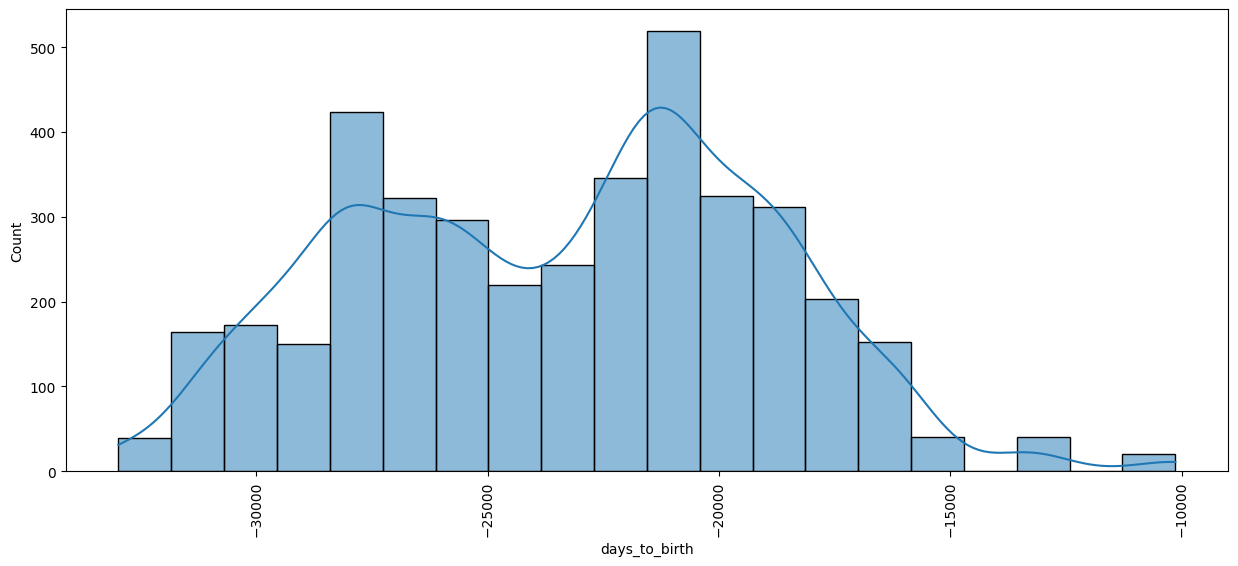

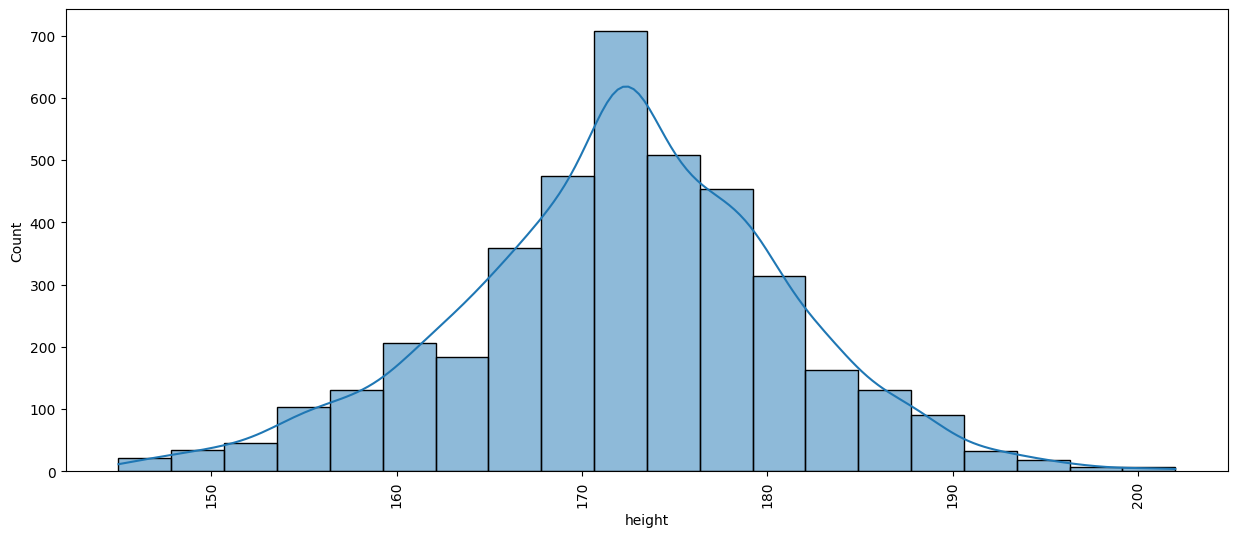

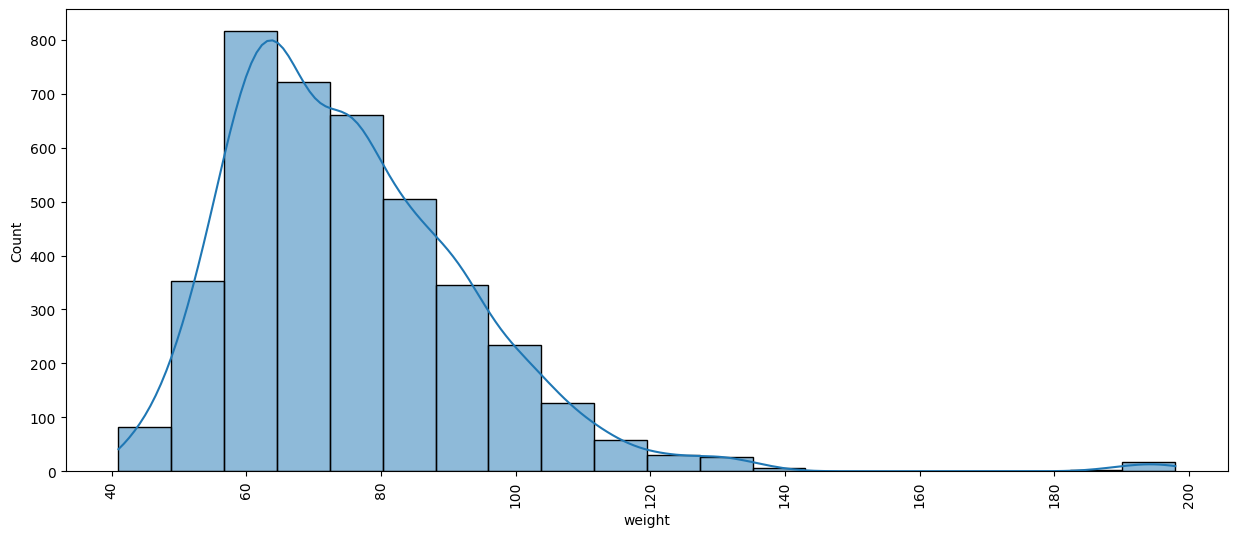

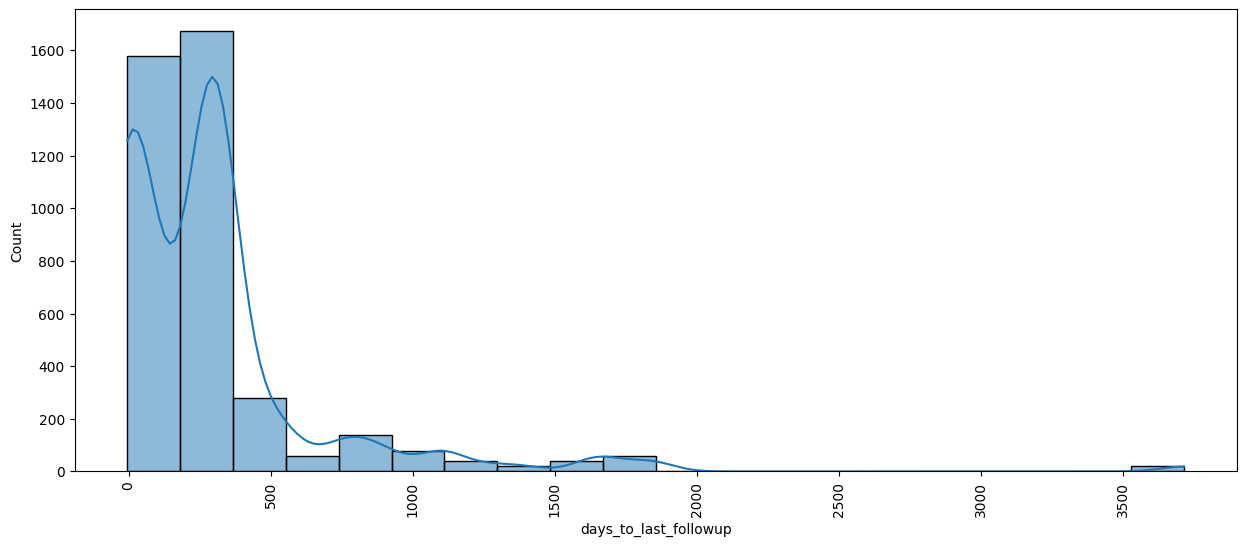

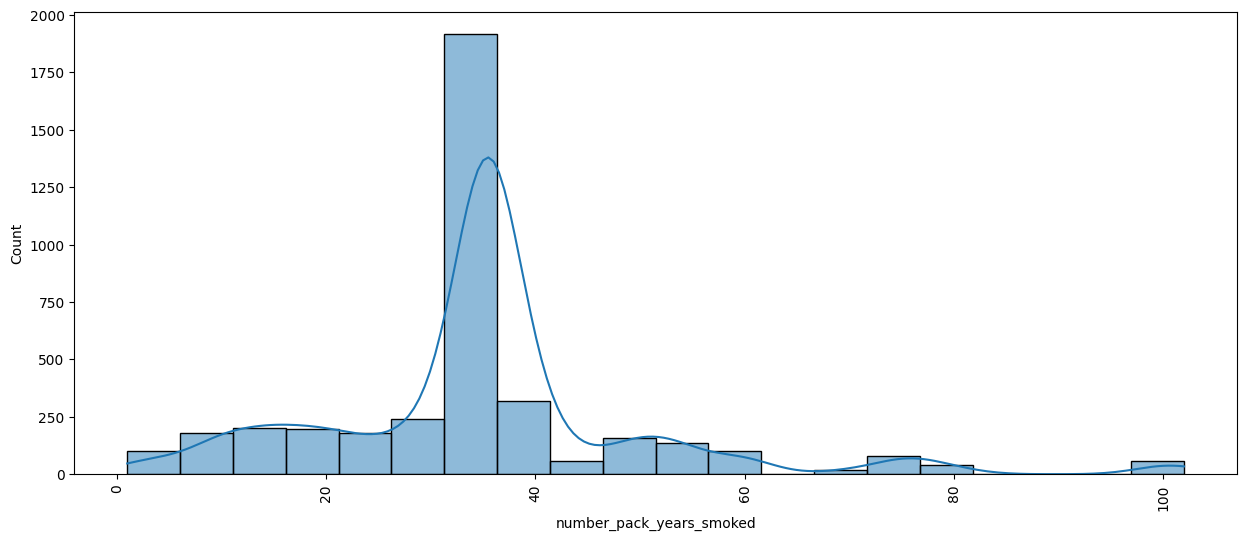

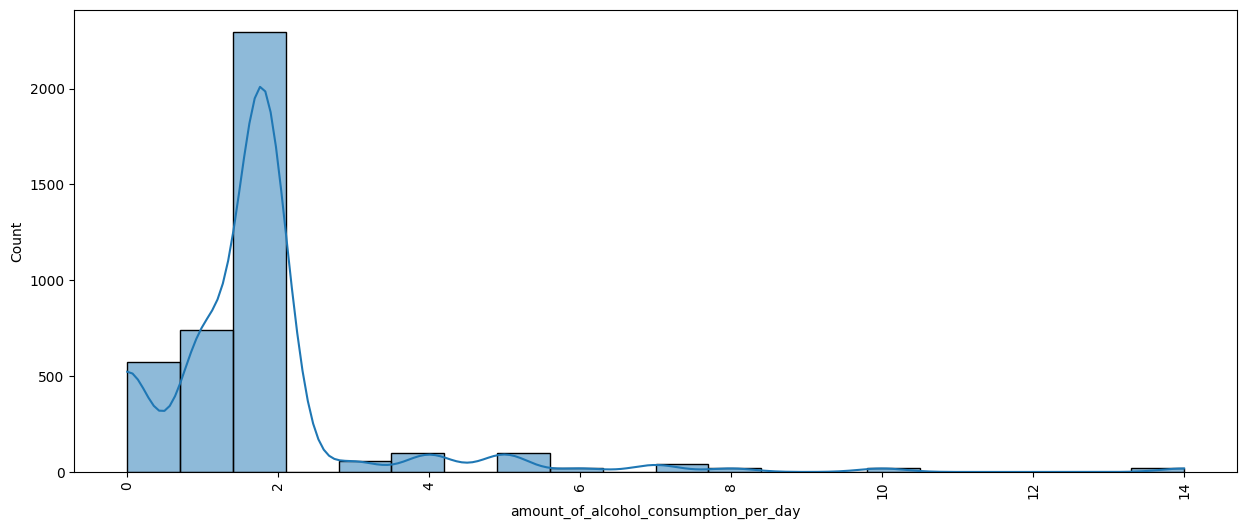

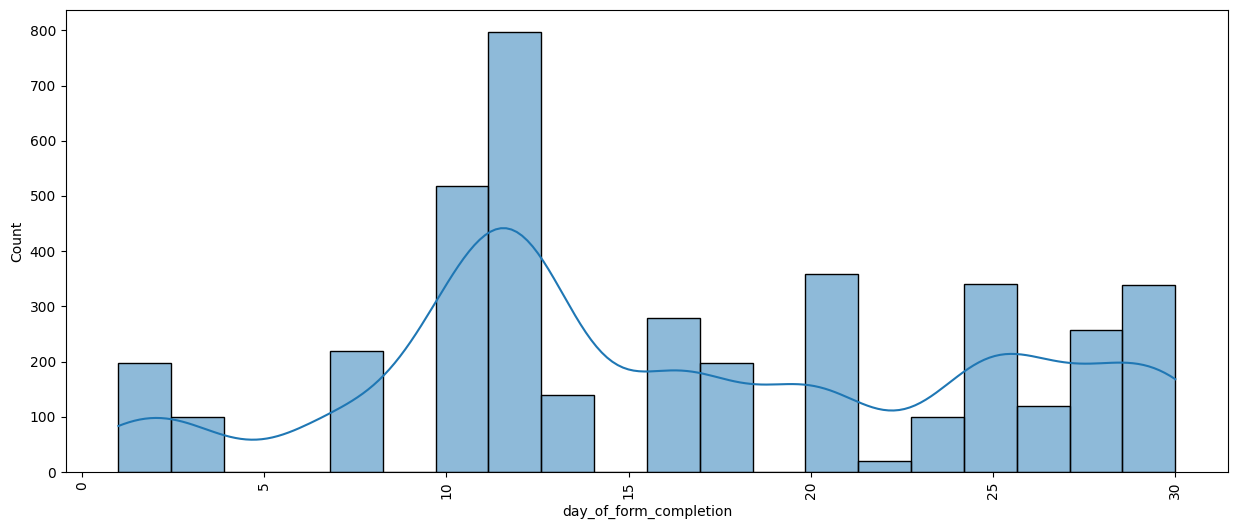

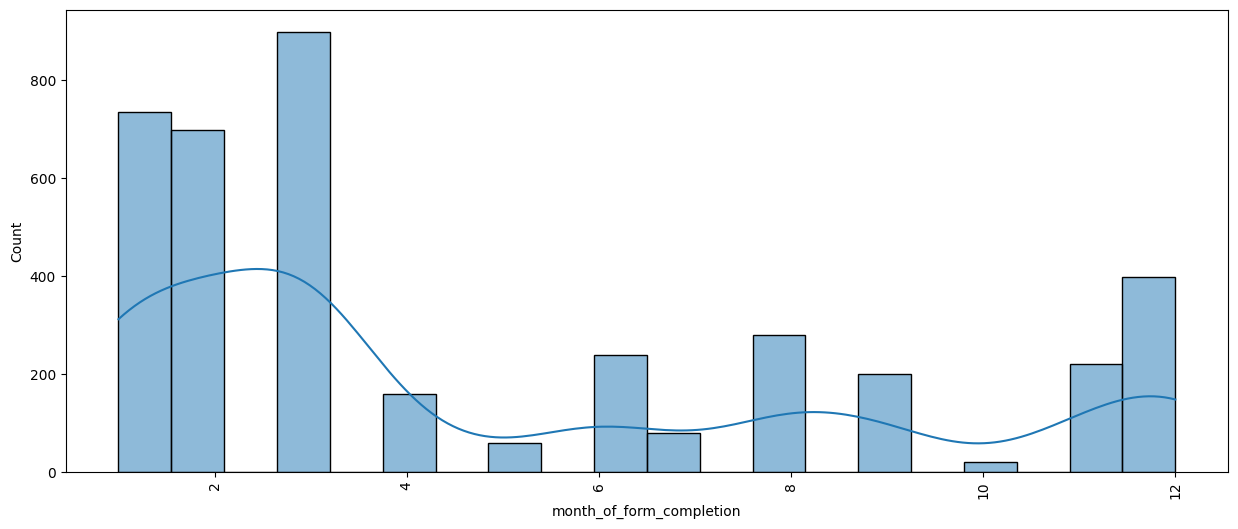

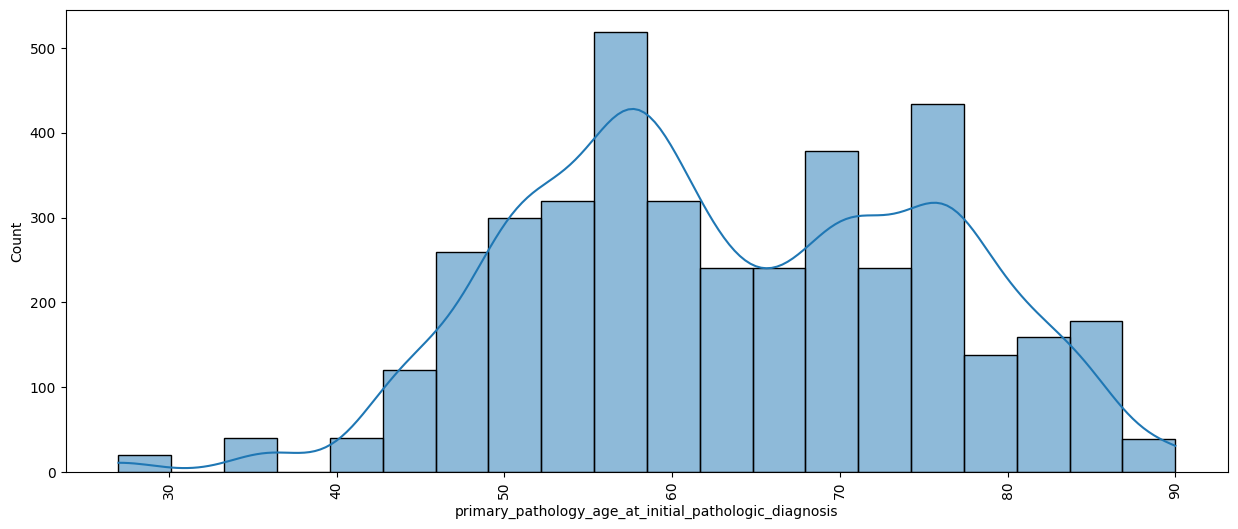

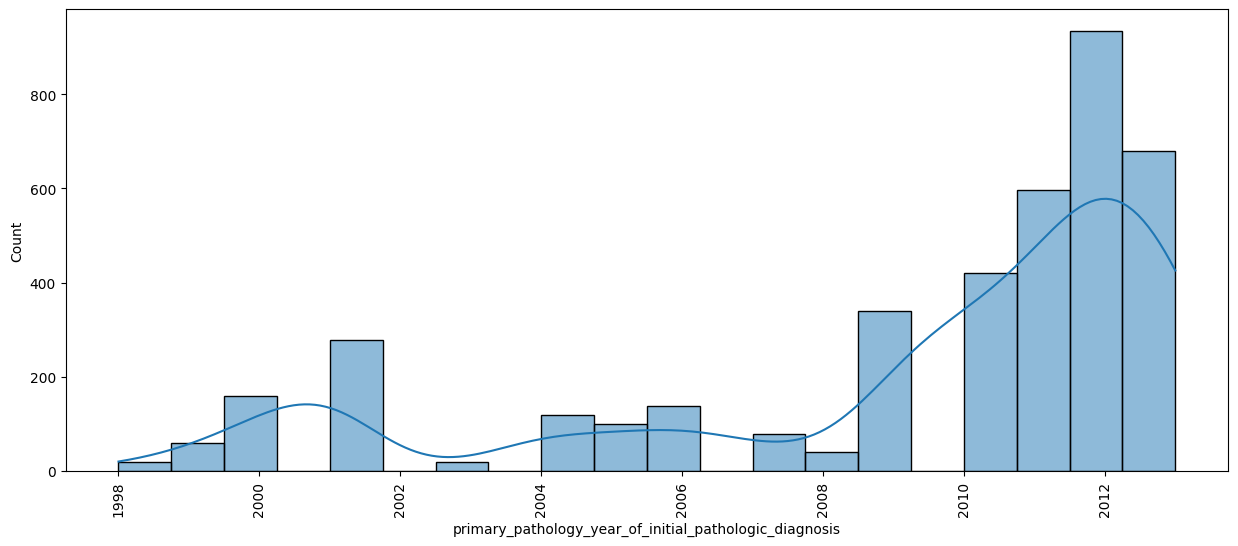

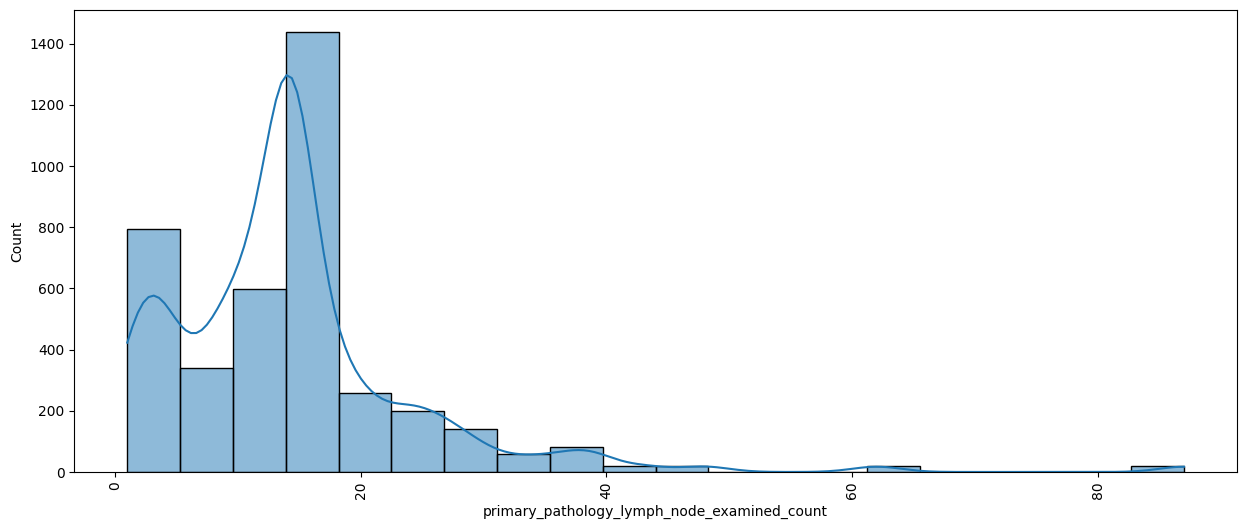

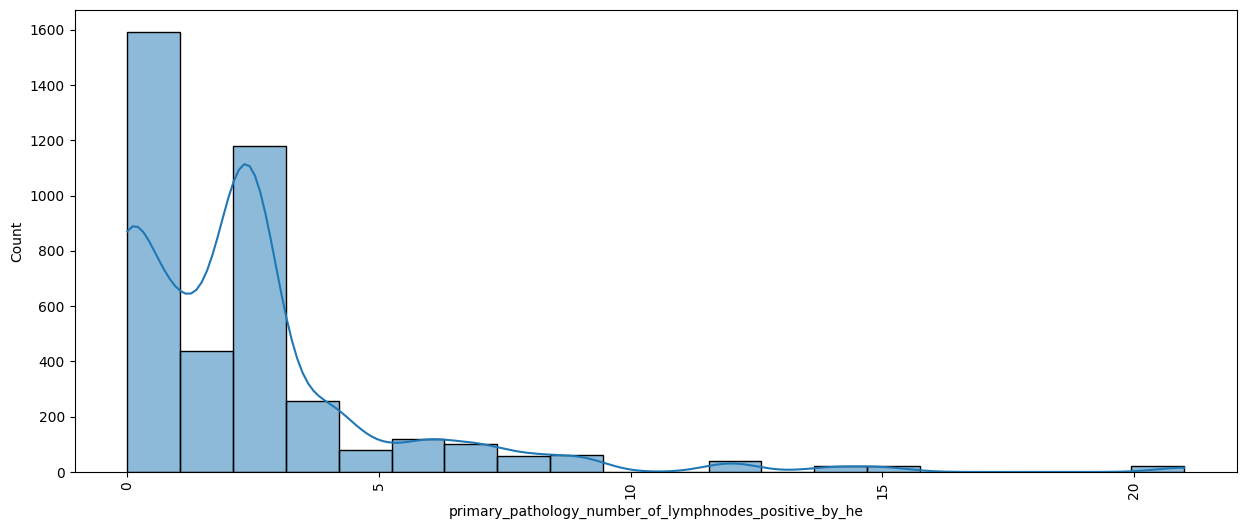

In [25]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

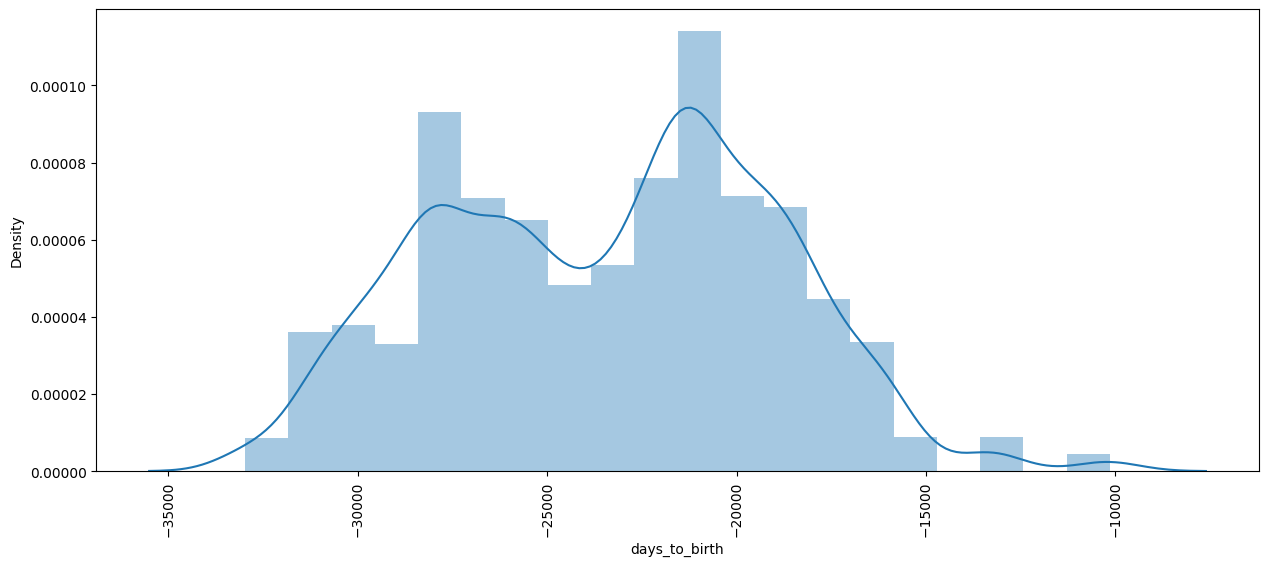

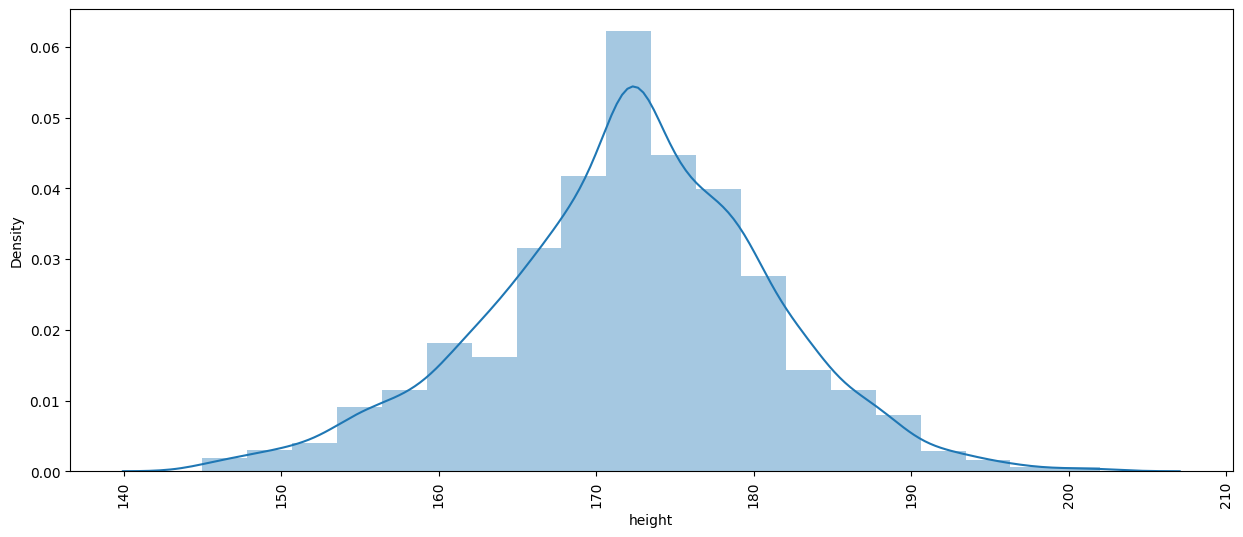

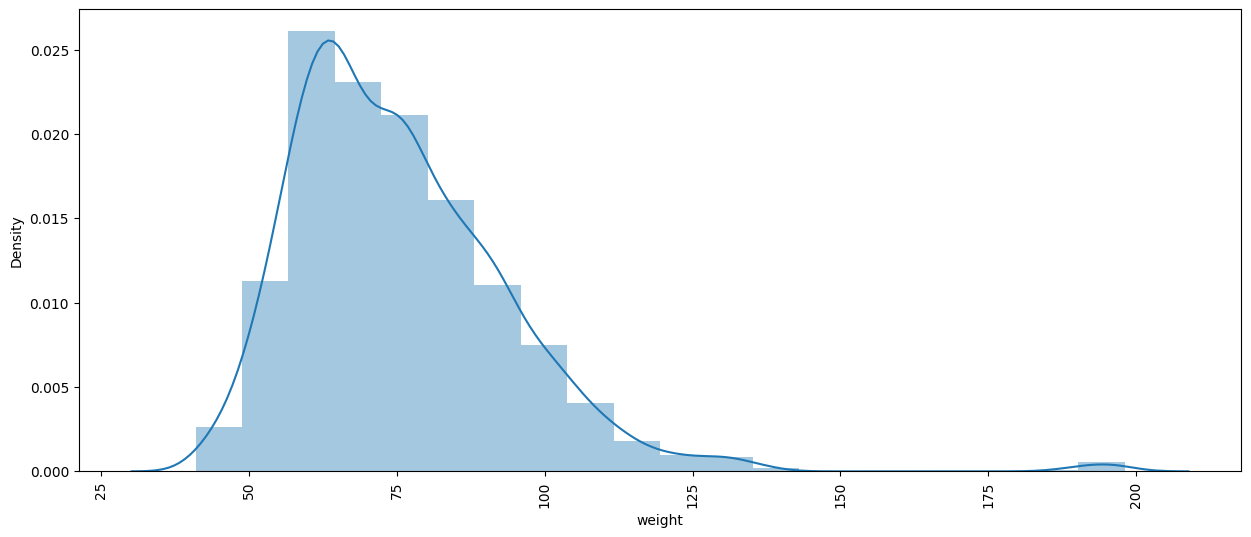

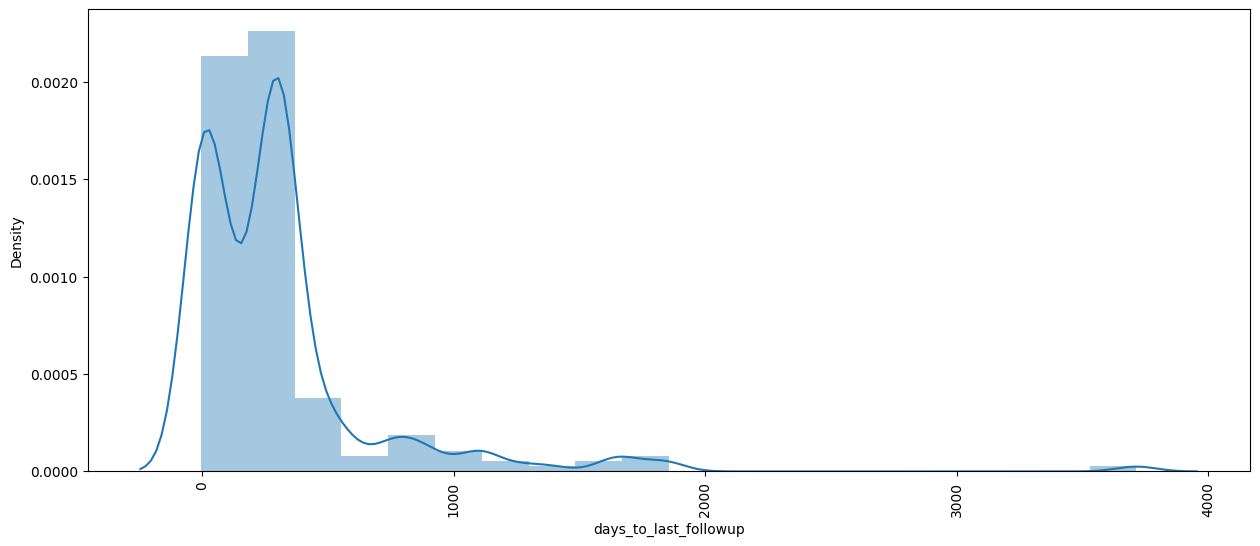

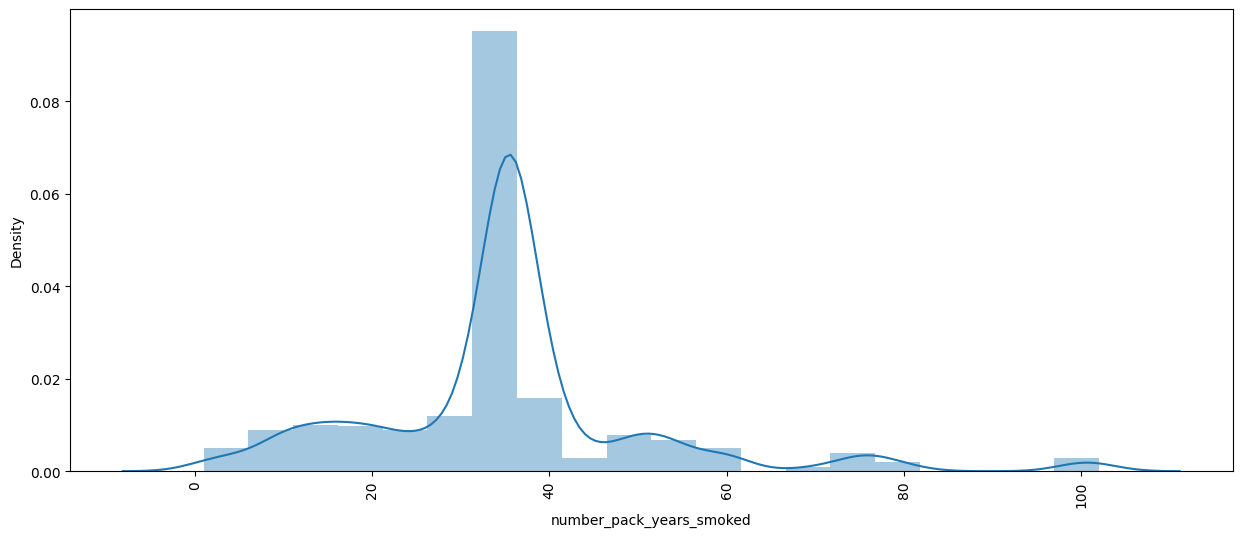

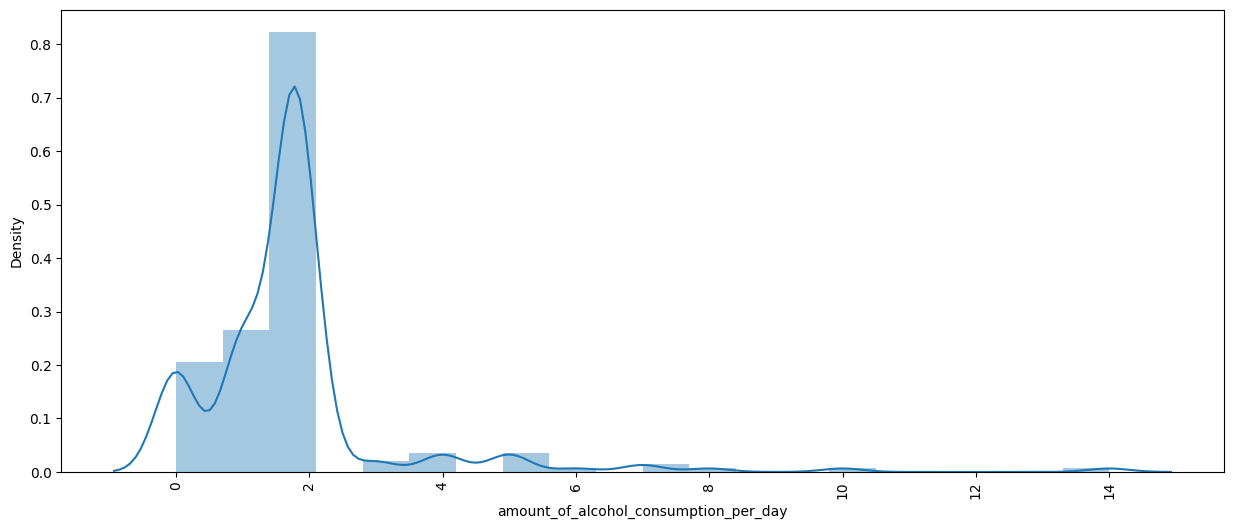

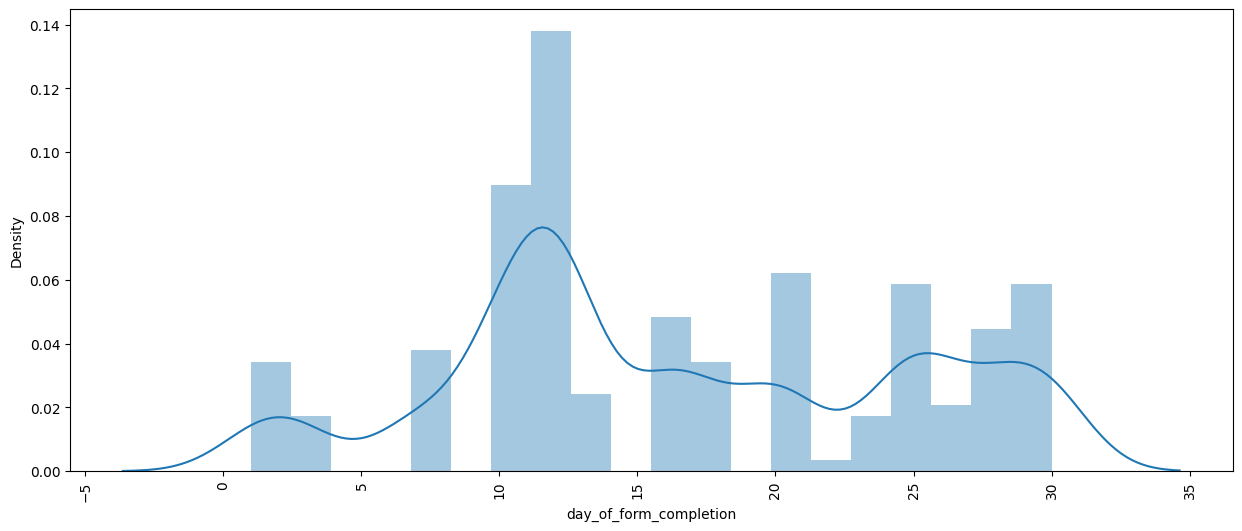

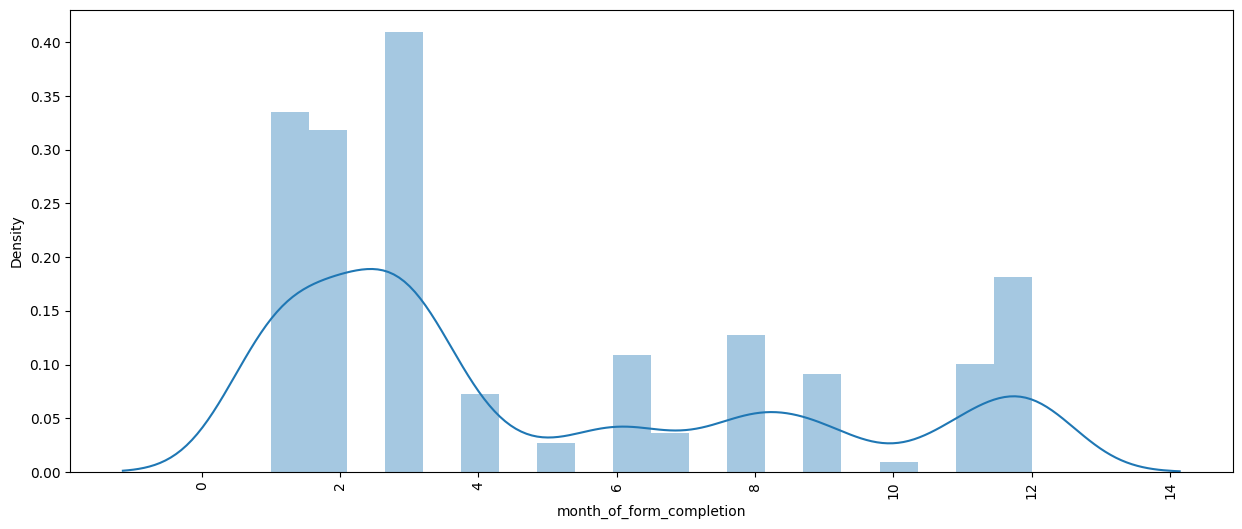

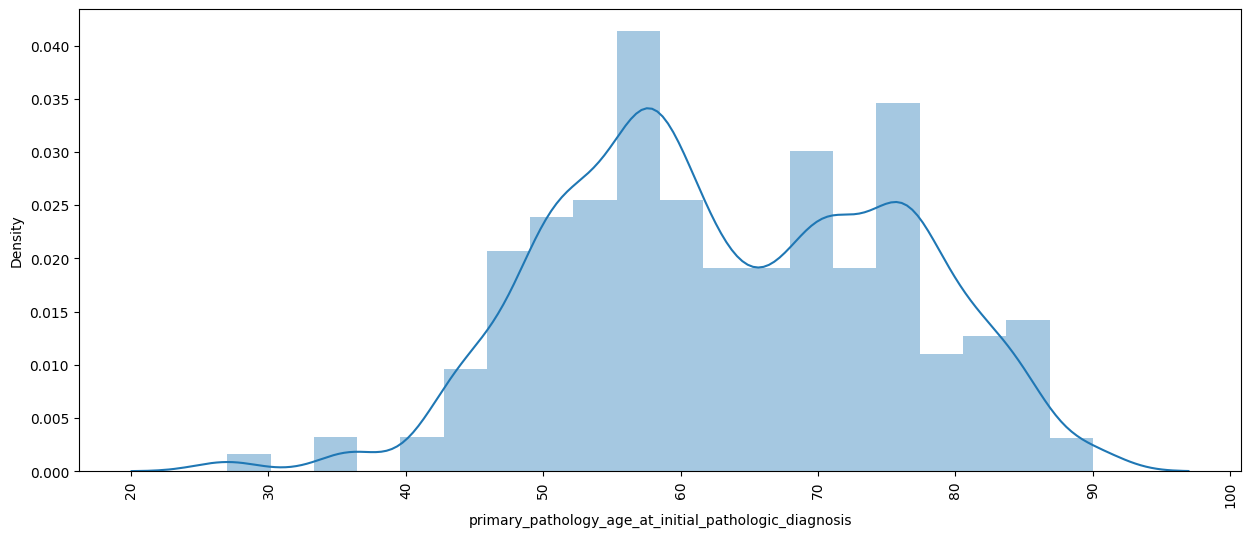

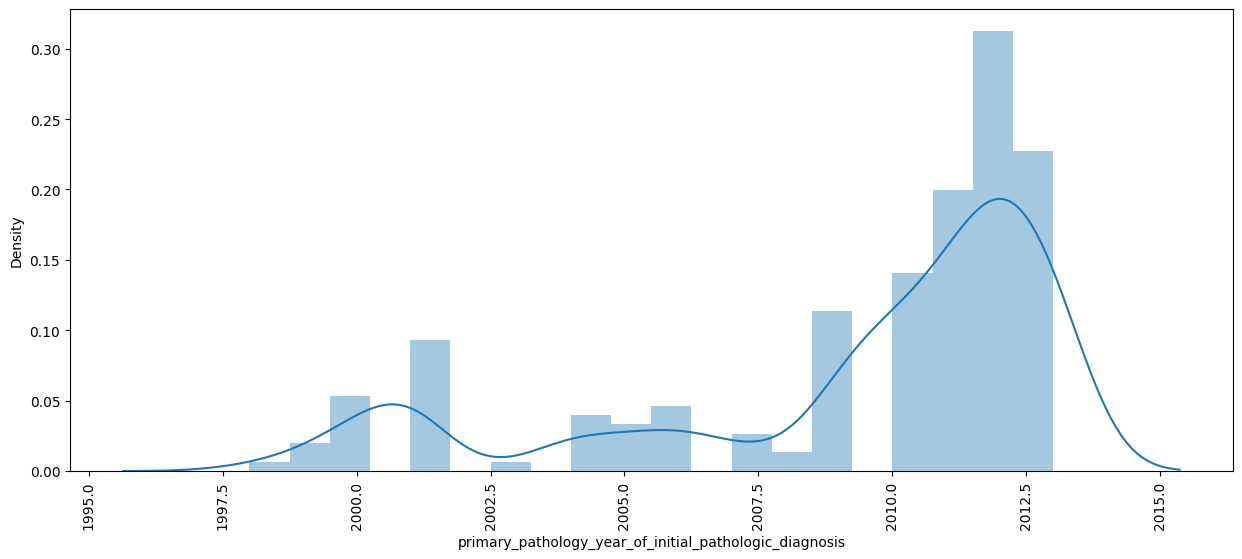

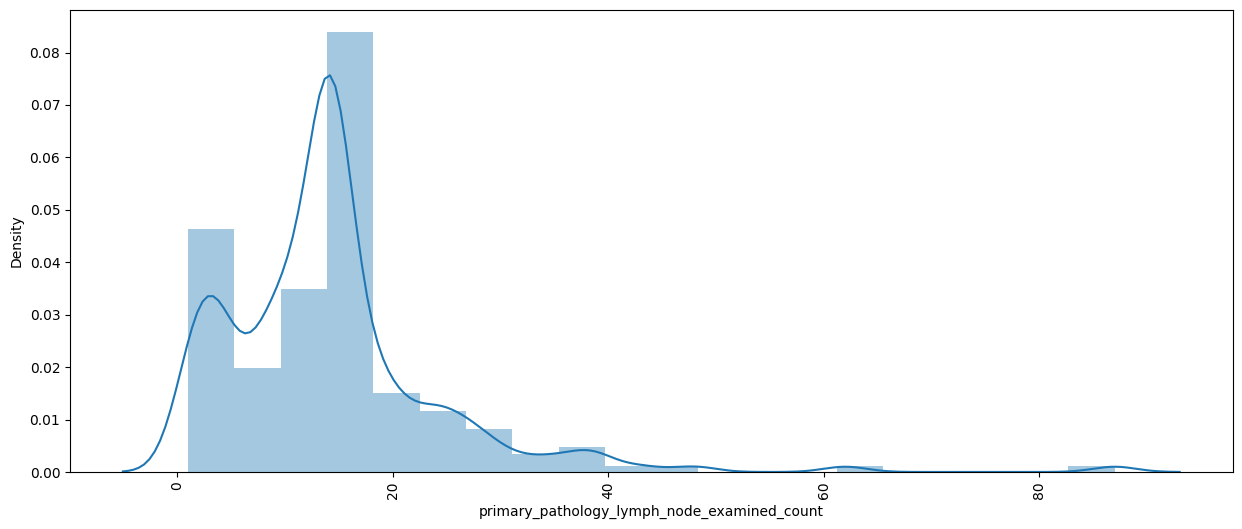

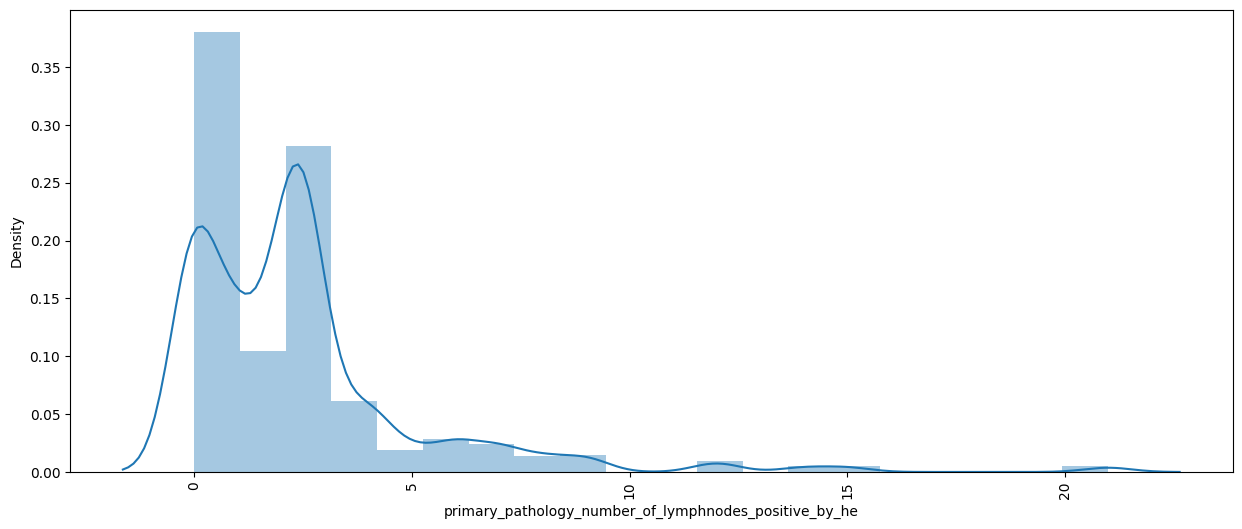

In [26]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

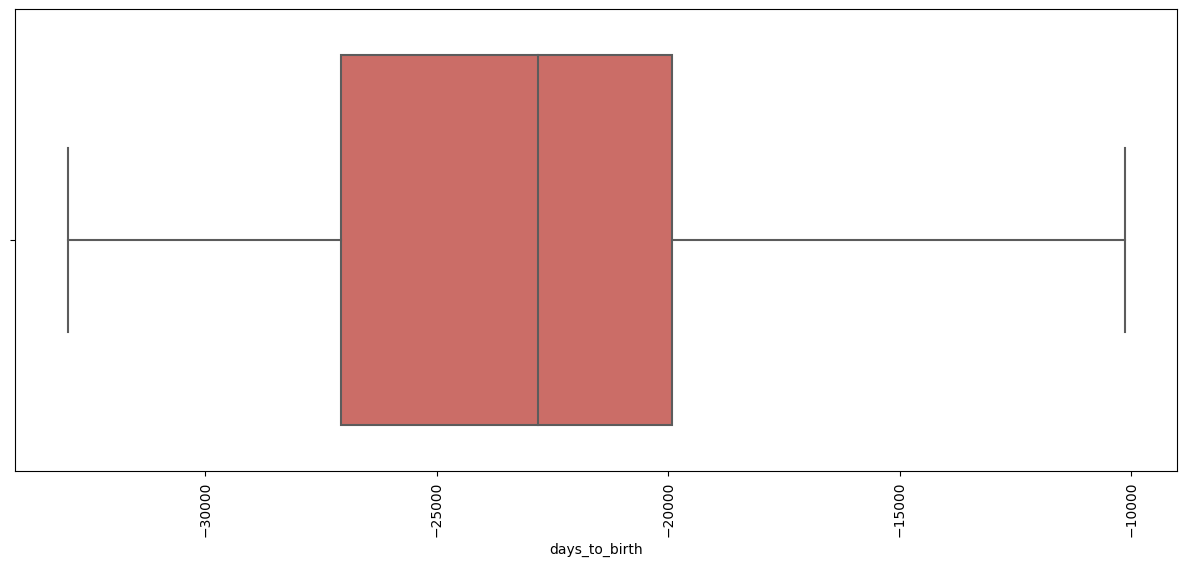

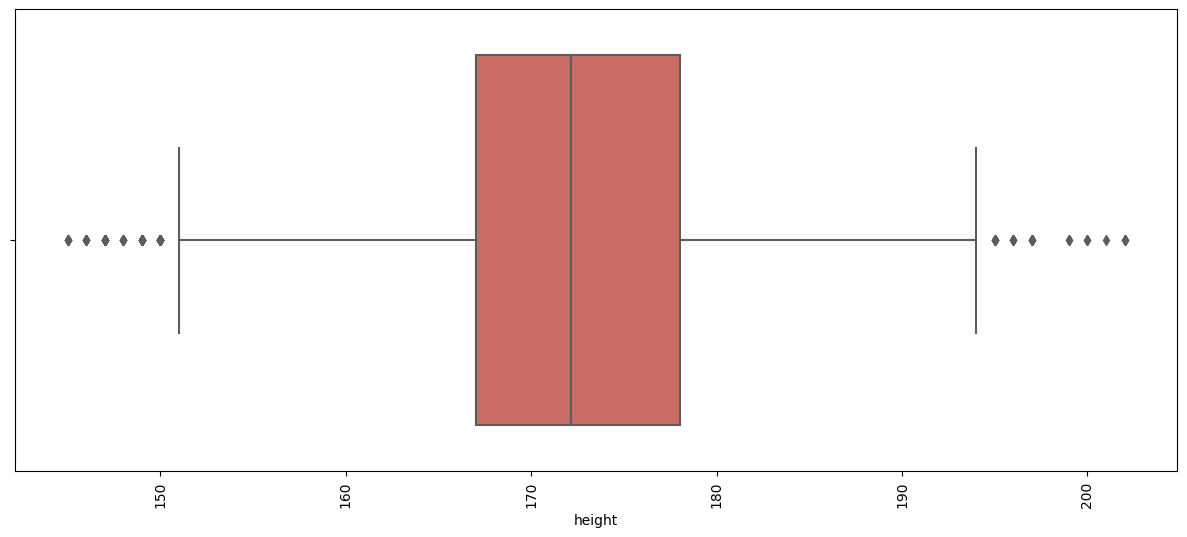

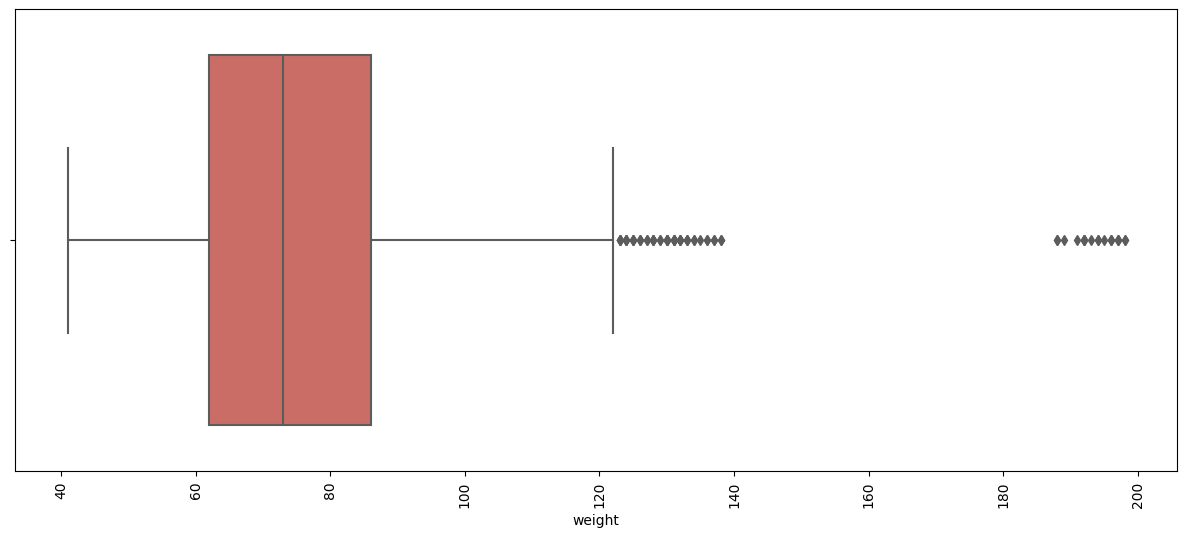

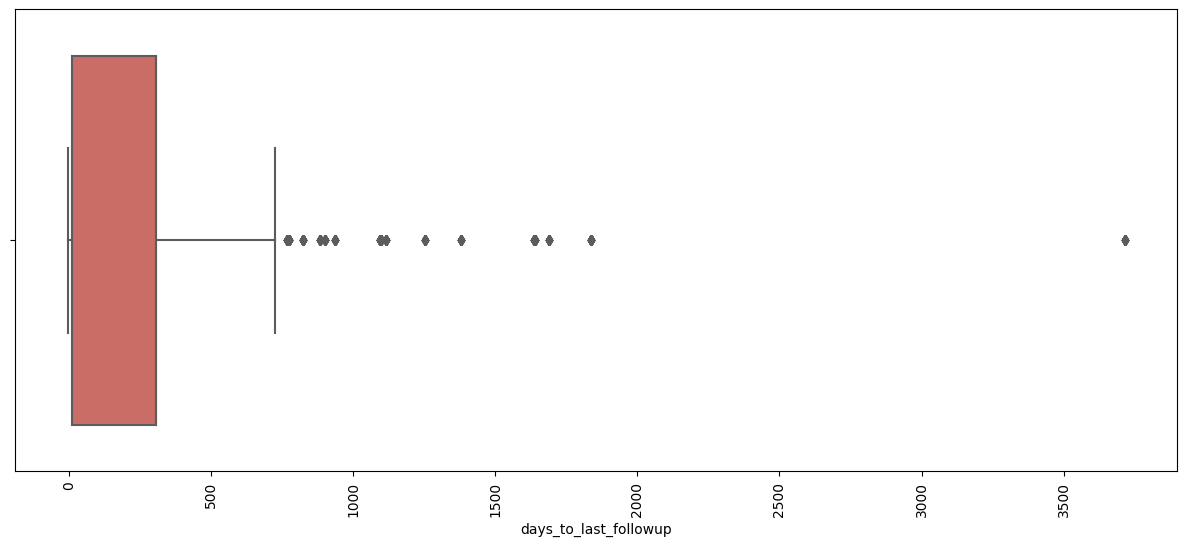

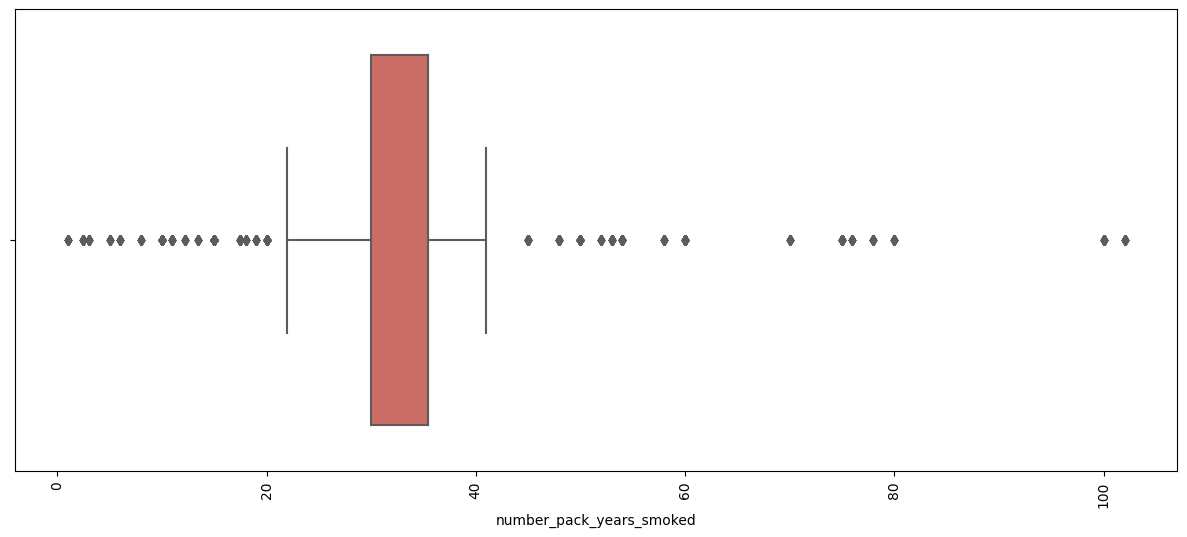

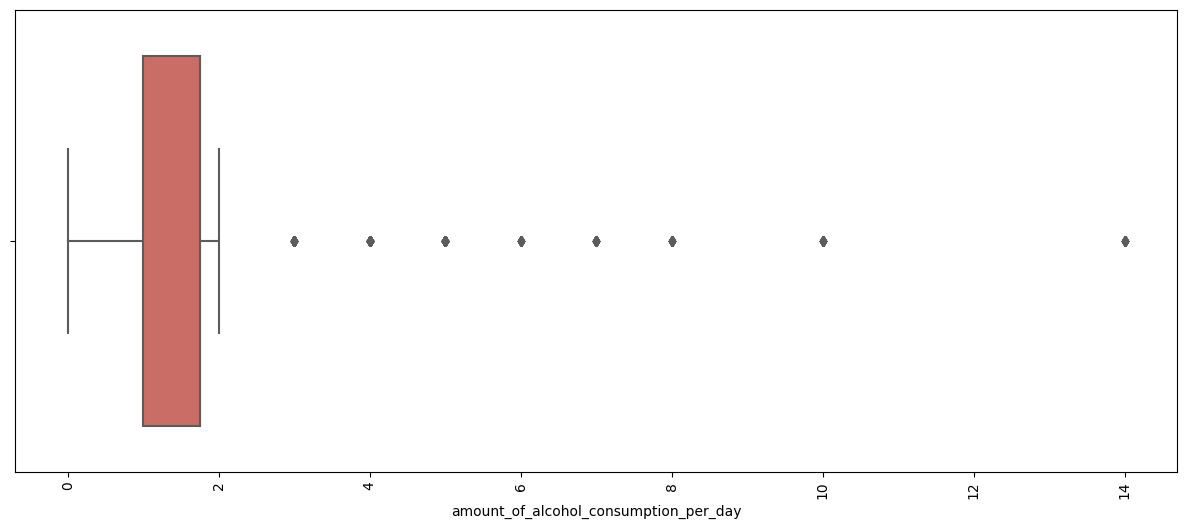

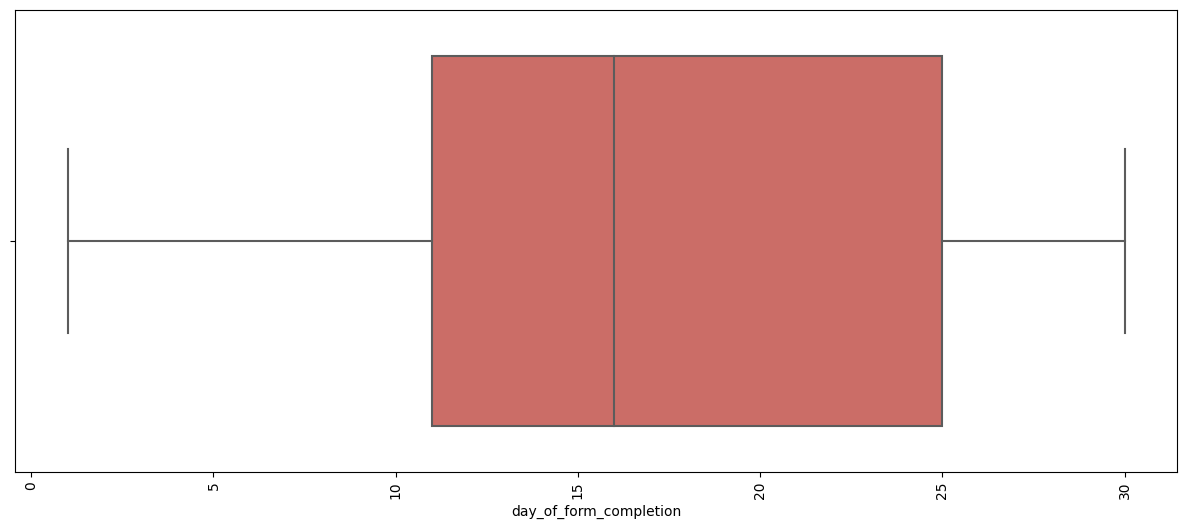

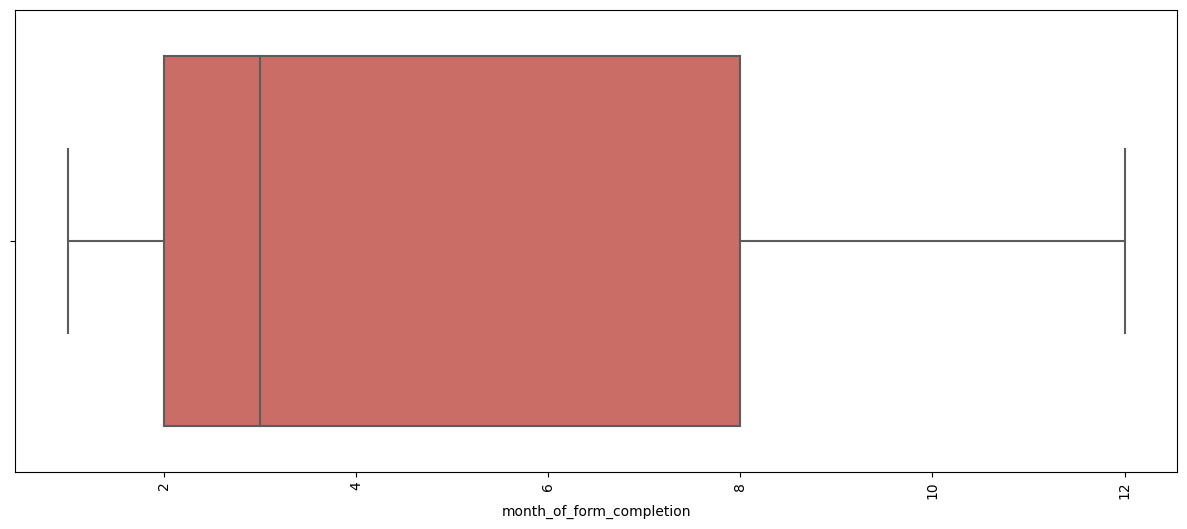

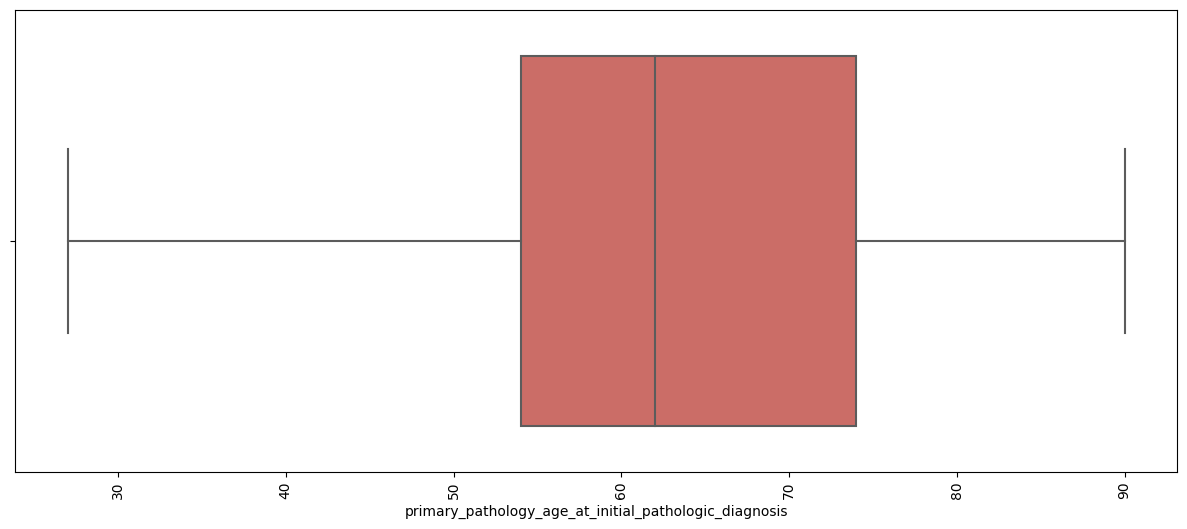

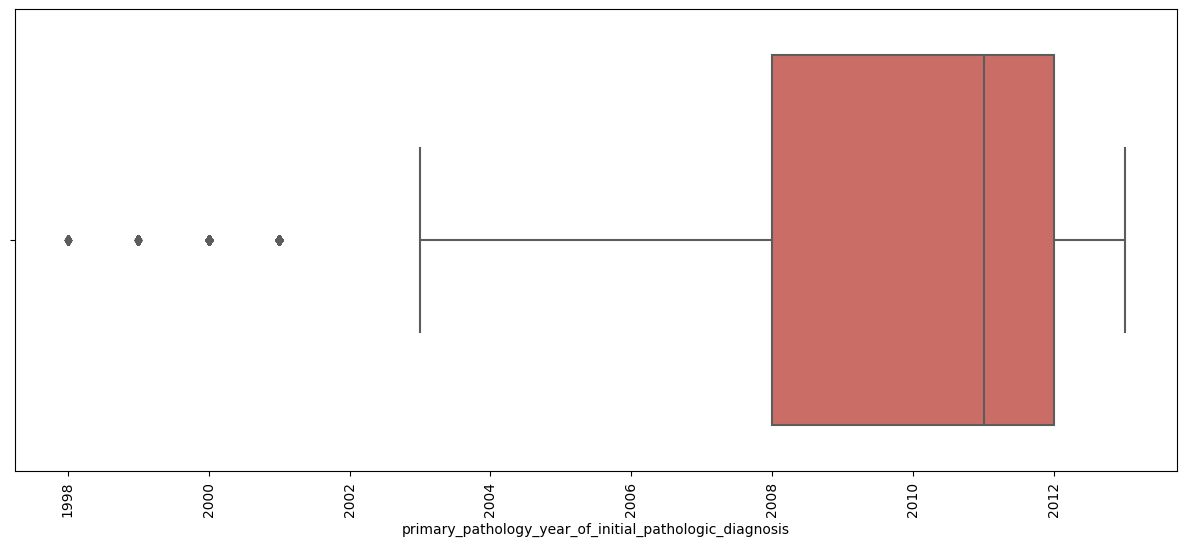

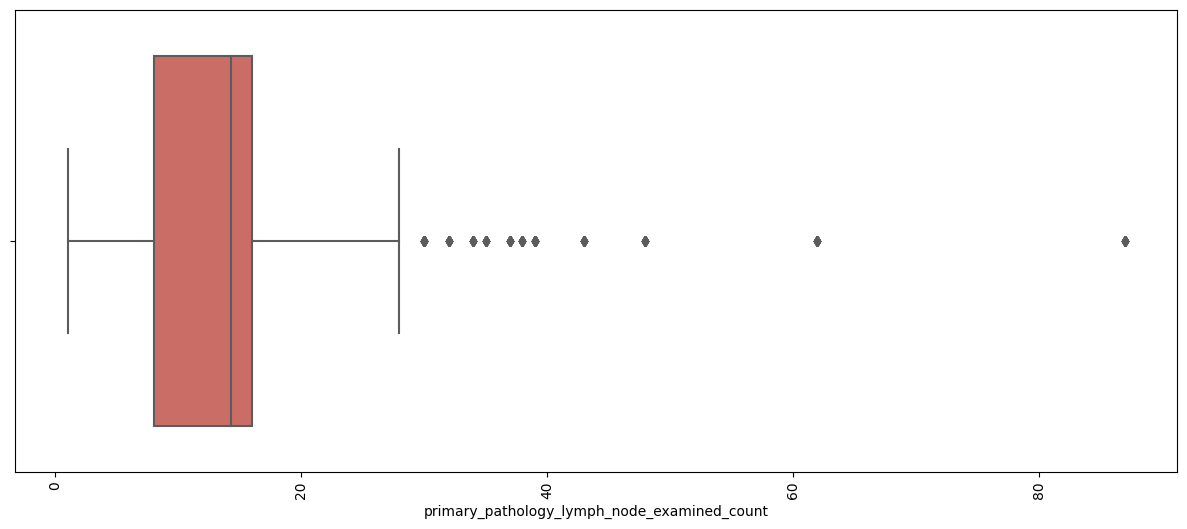

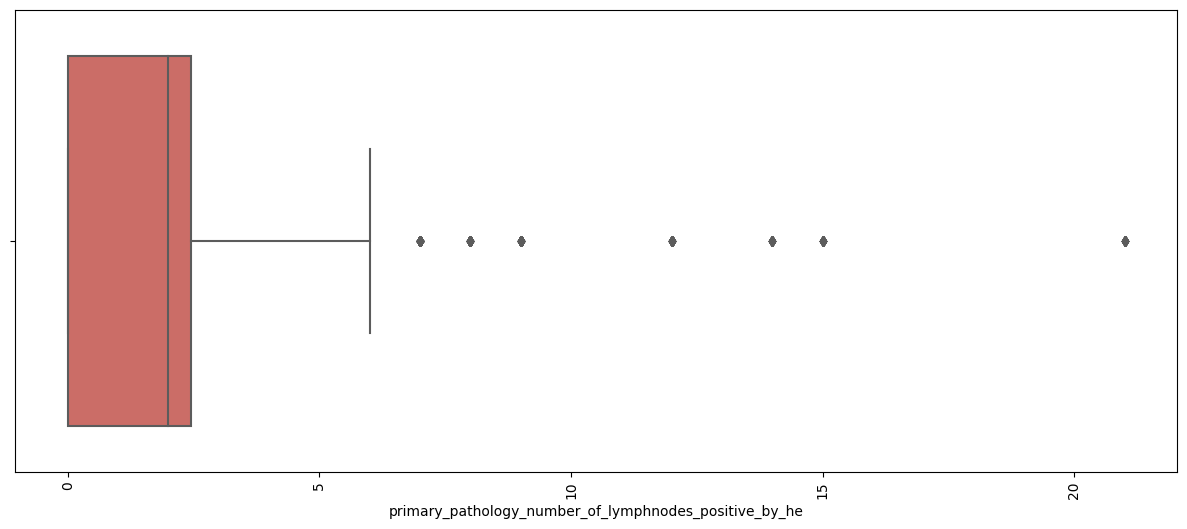

In [27]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [28]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

tobacco_smoking_history
[1. 2. 3. 4.]

frequency_of_alcohol_consumption
[7. 1. 2. 5. 3. 4. 0.]

year_of_form_completion
[2014 2012 2013 2015]

primary_pathology_days_to_initial_pathologic_diagnosis
[0]



In [29]:
for i in discrete:
    print(i)
    print(df[i].value_counts())
    print()

tobacco_smoking_history
tobacco_smoking_history
1.0    1538
3.0     910
4.0     778
2.0     759
Name: count, dtype: int64

frequency_of_alcohol_consumption
frequency_of_alcohol_consumption
7.0    2514
0.0     794
1.0     258
5.0     139
2.0     120
3.0     120
4.0      40
Name: count, dtype: int64

year_of_form_completion
year_of_form_completion
2014    2094
2013    1671
2012     120
2015     100
Name: count, dtype: int64

primary_pathology_days_to_initial_pathologic_diagnosis
primary_pathology_days_to_initial_pathologic_diagnosis
0    3985
Name: count, dtype: int64



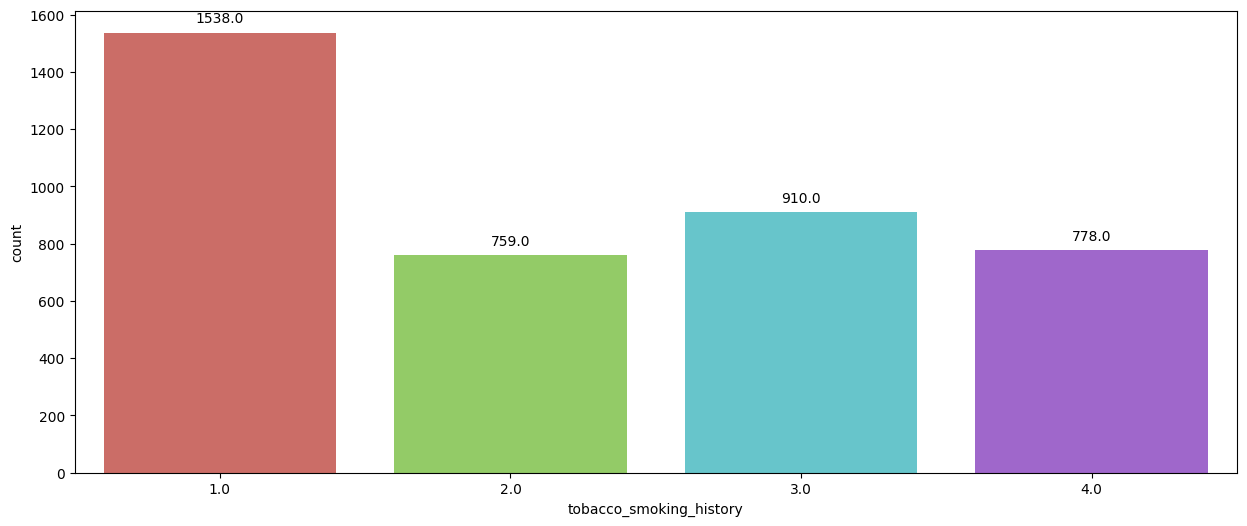

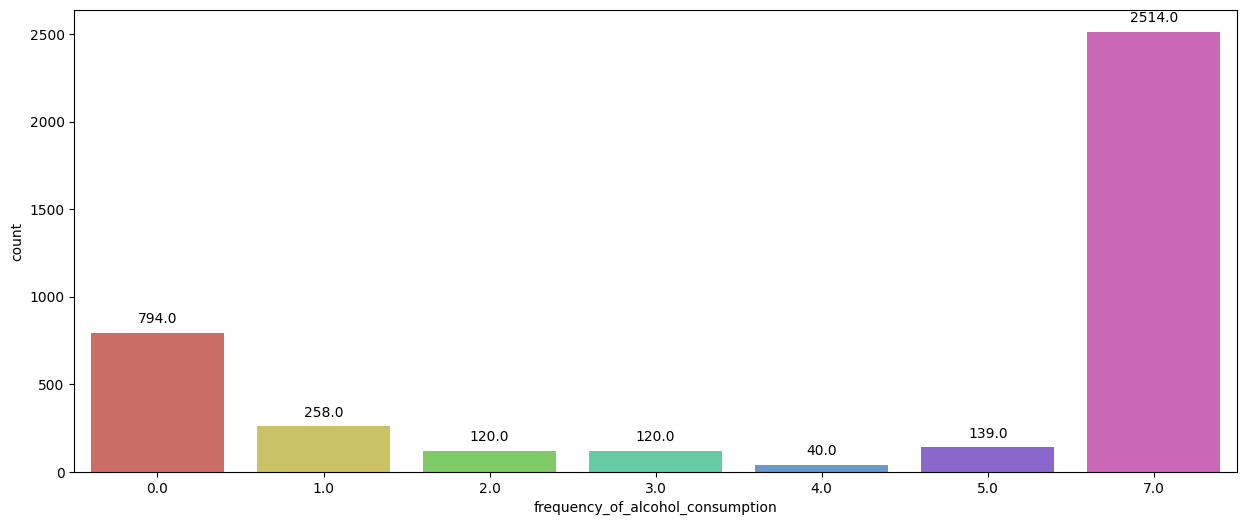

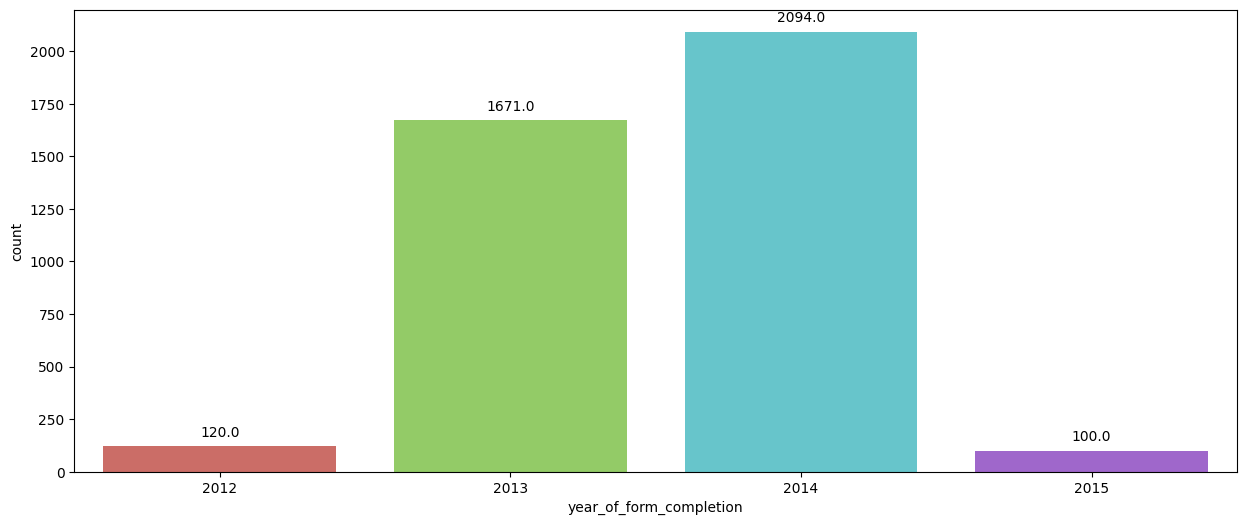

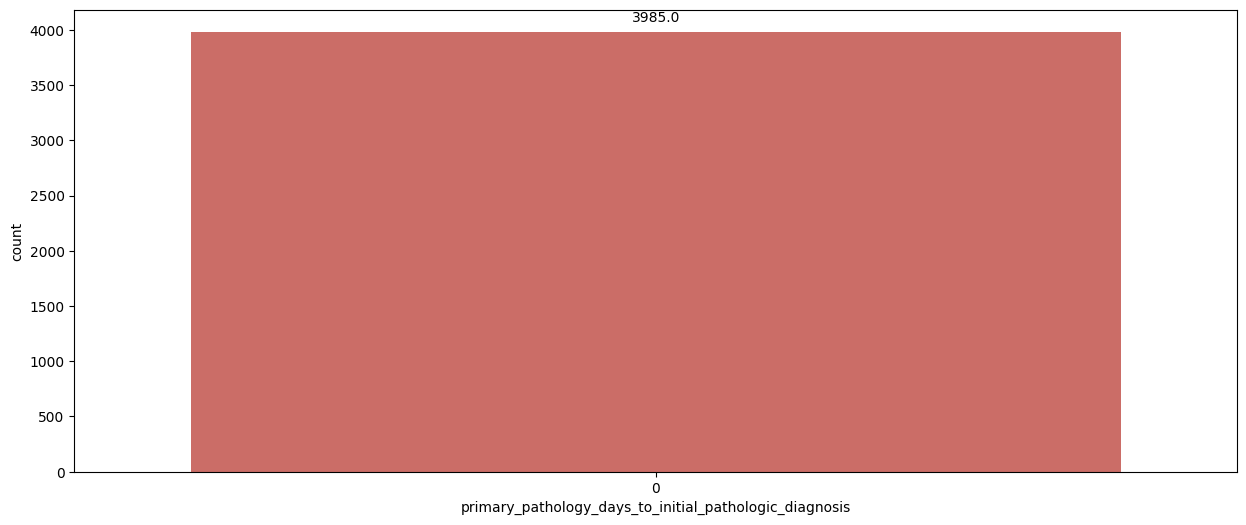

In [30]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [31]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [32]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

informed_consent_verified
['YES']

icd_o_3_site
['C15.5' 'C15.9' 'C15.4' 'C15.1' 'C15.3' 'C16.0']

icd_o_3_histology
['8140/3' '8070/3' '8071/3' '8480/3' '8083/3' '8211/3']

icd_10
['C15.5' 'C15.9' 'C15.4' 'C15.3' 'C16.0']

tissue_prospective_collection_indicator
['NO' 'YES' 'Not Available']

tissue_retrospective_collection_indicator
['YES' 'NO' 'Not Available']

country_of_birth
['Not Available' 'Russia' 'Ukraine' 'Vietnam' 'Bulgaria' 'United States'
 'Australia' 'Brazil' 'United Kingdom']

gender
['MALE' 'FEMALE']

race_list
['Not Available' 'WHITE' 'ASIAN' 'BLACK OR AFRICAN AMERICAN']

other_dx
['No' 'Yes']

history_of_neoadjuvant_treatment
['No']

person_neoplasm_cancer_status
['WITH TUMOR' 'TUMOR FREE' 'Not Available']

vital_status
['Dead' 'Alive']

alcohol_history_documented
['NO' 'YES' 'Not Available']

reflux_history
['Not Available' 'NO' 'YES']

initial_diagnosis_by
['Symptomatic' 'Not Available' 'Screening' 'Surveillance']

barretts_esophagus
['No' 'Yes-UK' 'Yes-USA' 'Not Av

In [33]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

informed_consent_verified
informed_consent_verified
YES    3985
Name: count, dtype: int64

icd_o_3_site
icd_o_3_site
C15.5    2727
C15.4     859
C15.9     200
C15.3     100
C16.0      59
C15.1      40
Name: count, dtype: int64

icd_o_3_histology
icd_o_3_histology
8140/3    1968
8070/3    1857
8071/3     100
8480/3      20
8083/3      20
8211/3      20
Name: count, dtype: int64

icd_10
icd_10
C15.5    2727
C15.4     859
C15.9     240
C15.3     100
C16.0      59
Name: count, dtype: int64

tissue_prospective_collection_indicator
tissue_prospective_collection_indicator
NO               2368
YES              1577
Not Available      40
Name: count, dtype: int64

tissue_retrospective_collection_indicator
tissue_retrospective_collection_indicator
YES              2368
NO               1577
Not Available      40
Name: count, dtype: int64

country_of_birth
country_of_birth
Not Available     1927
Vietnam            840
United States      418
Brazil             380
Russia             240
Ukraine  

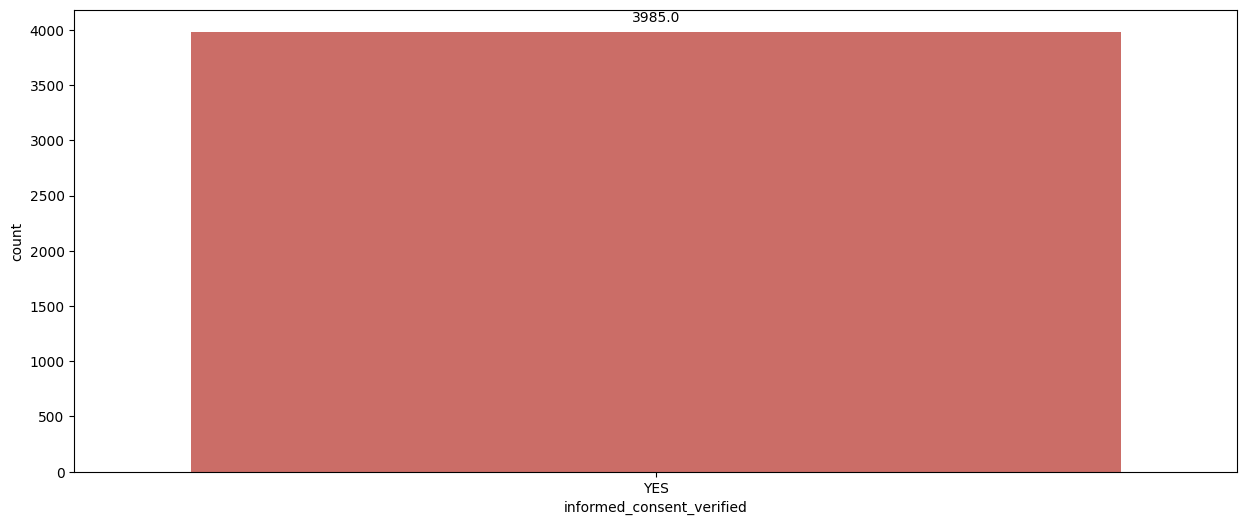

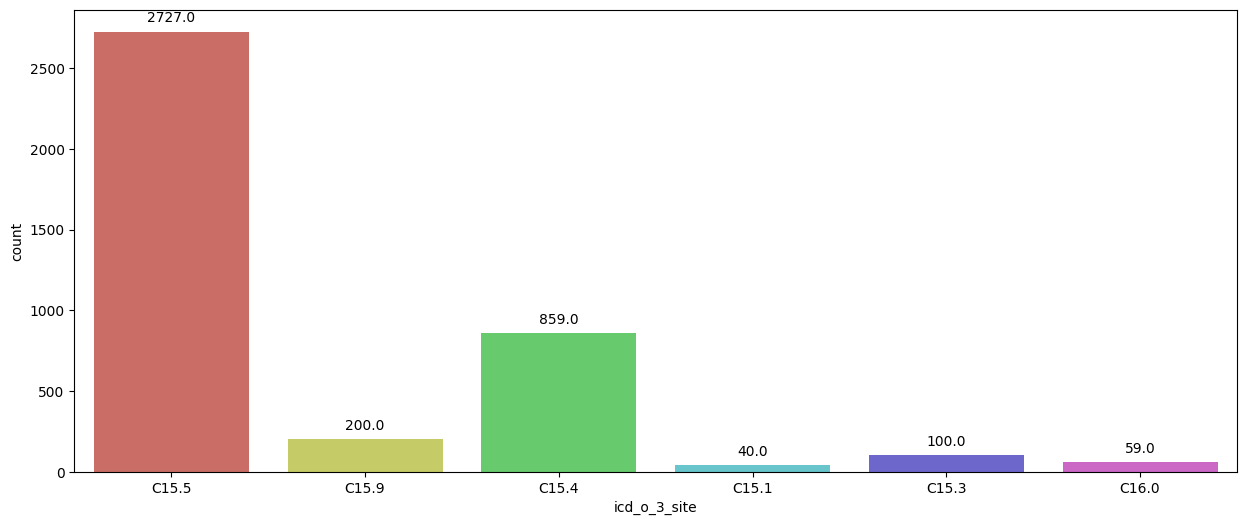

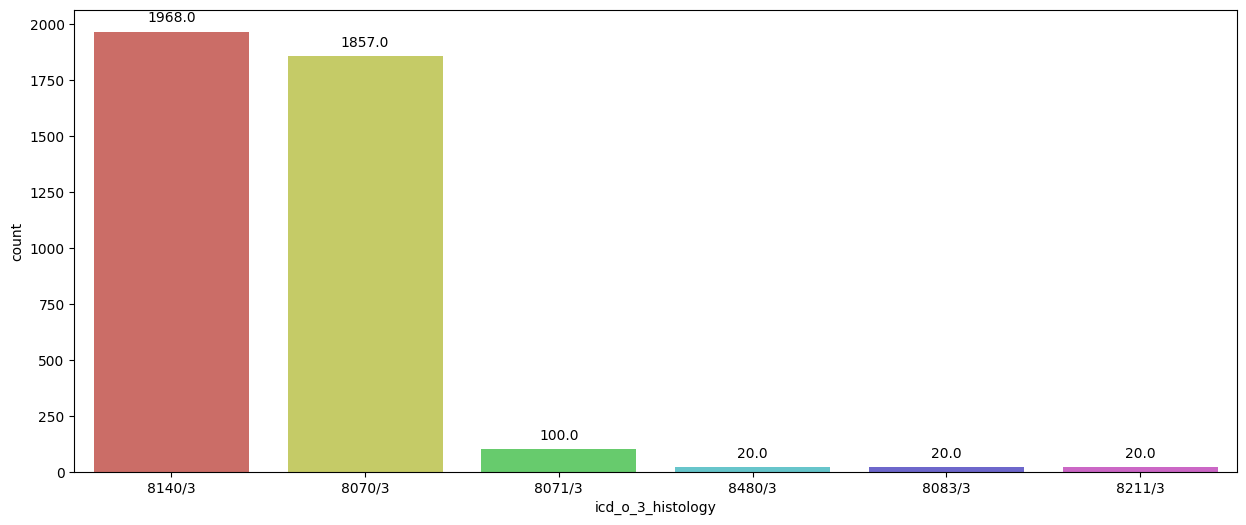

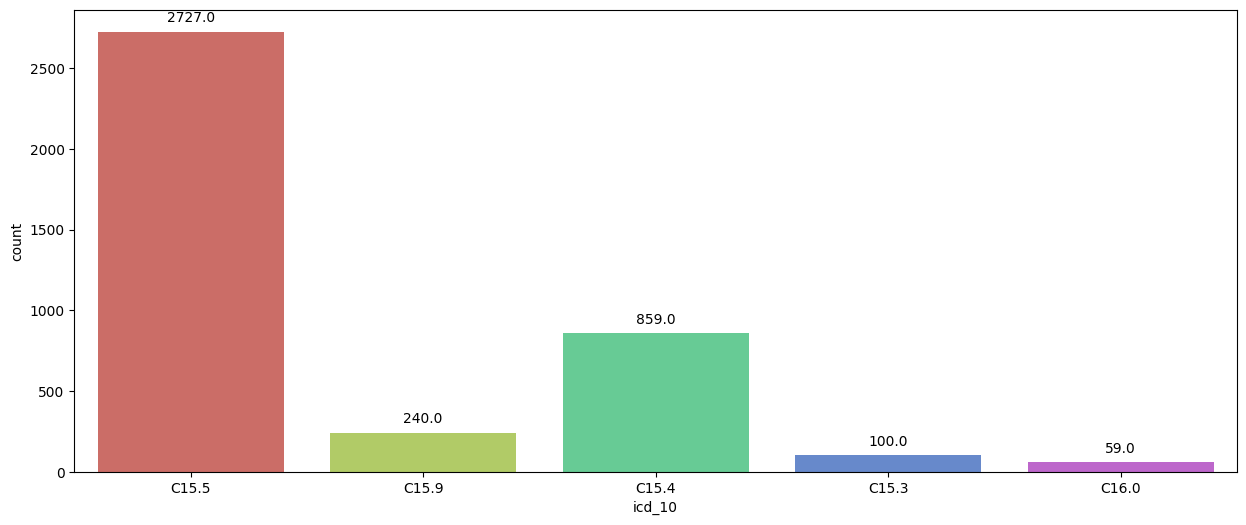

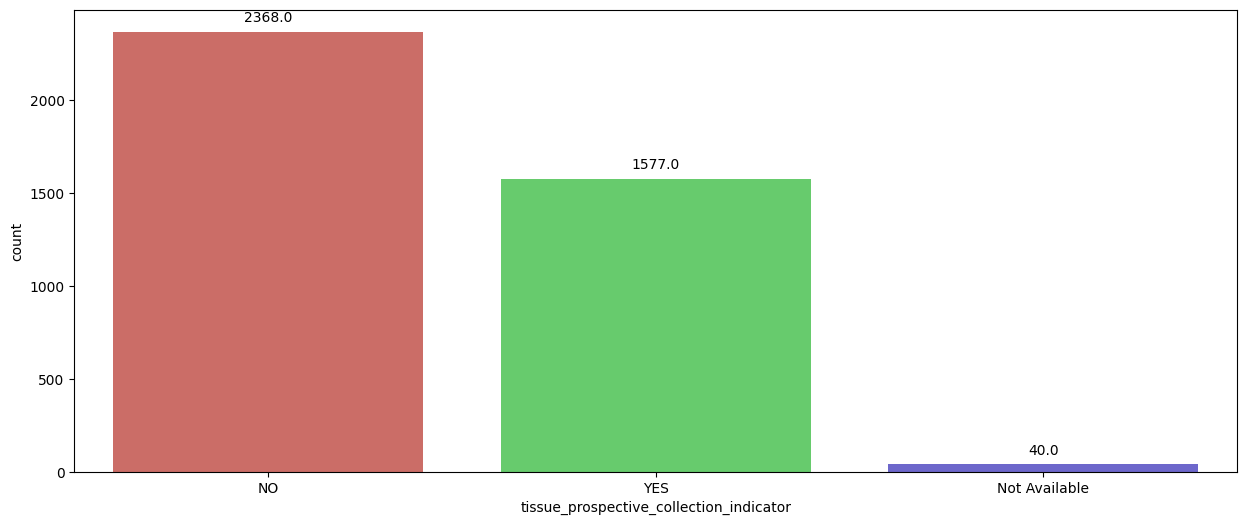

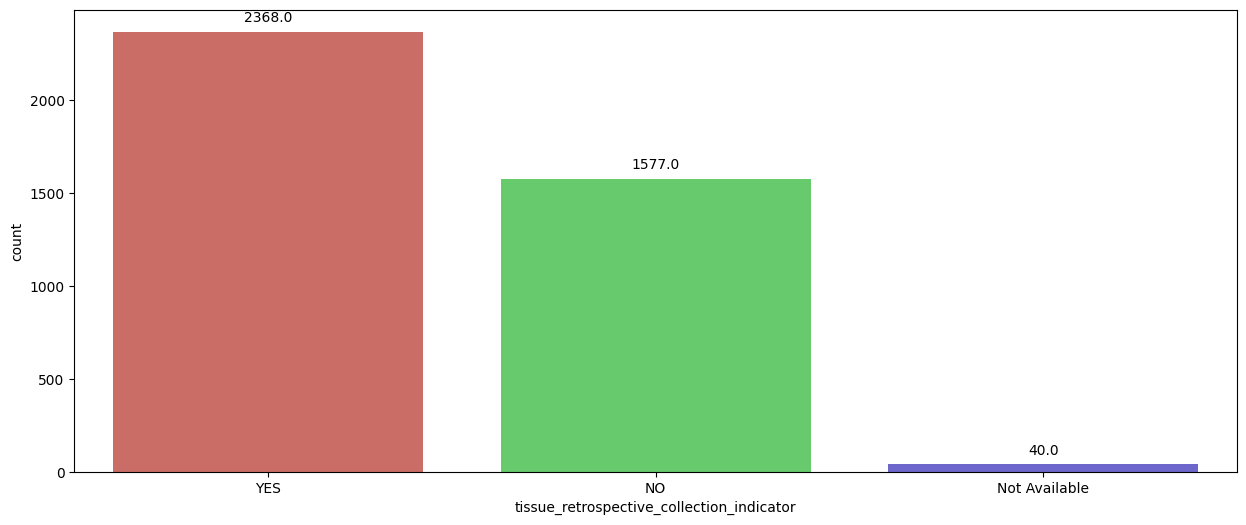

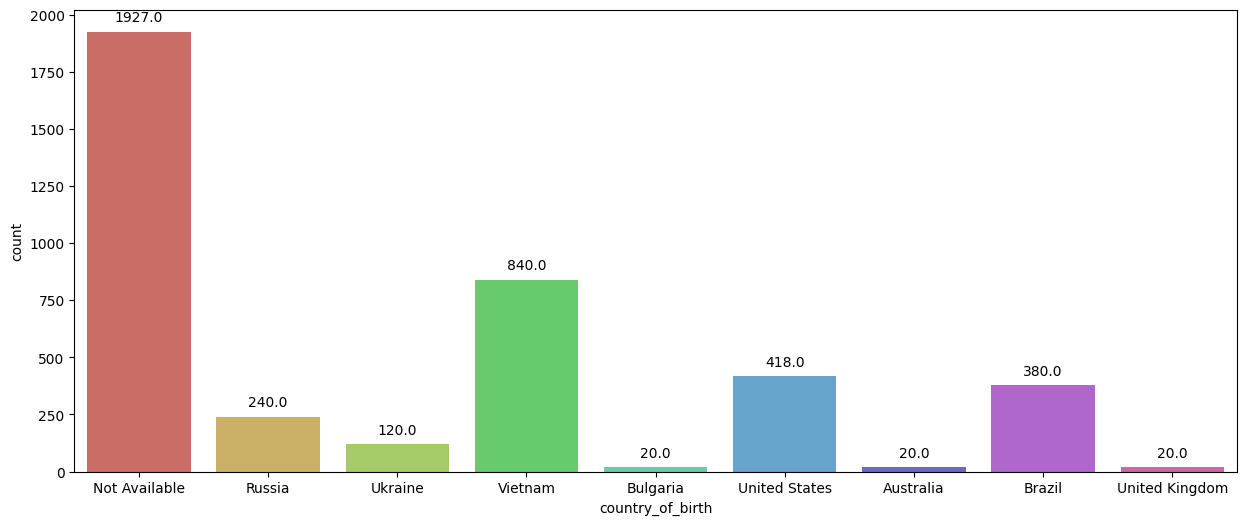

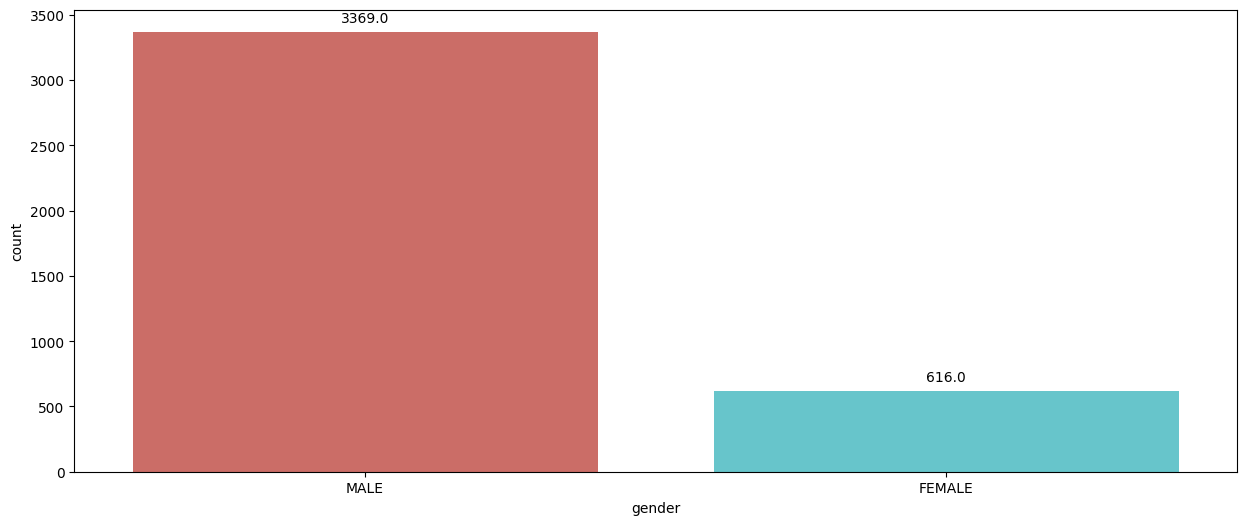

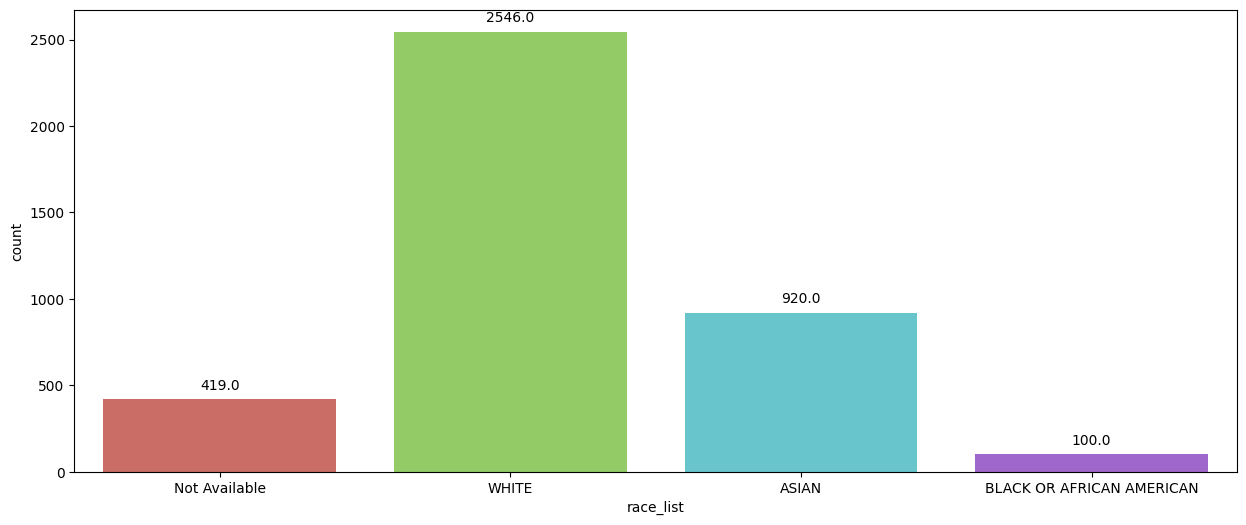

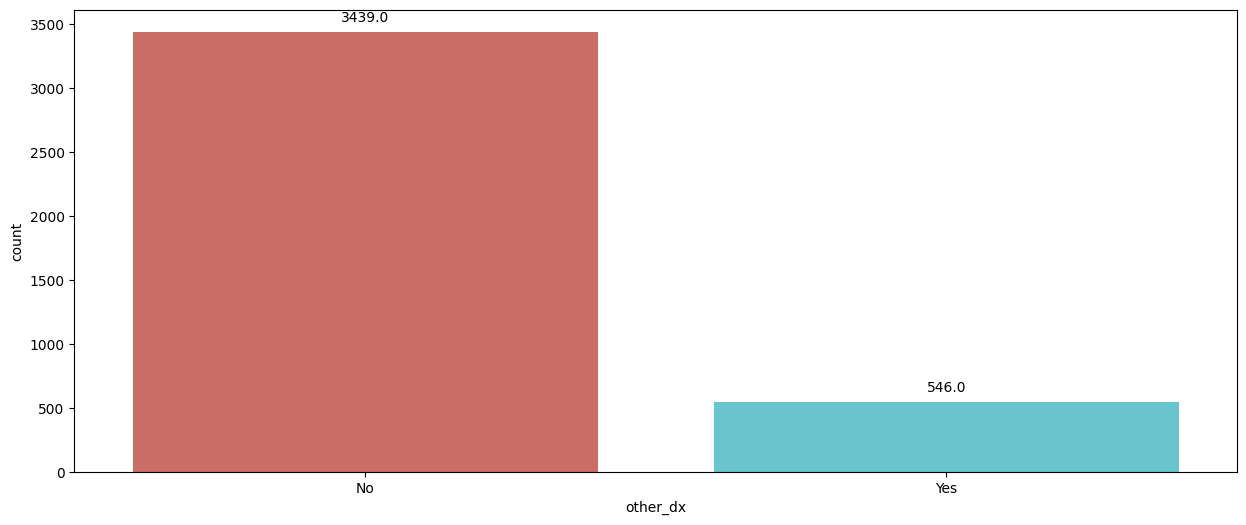

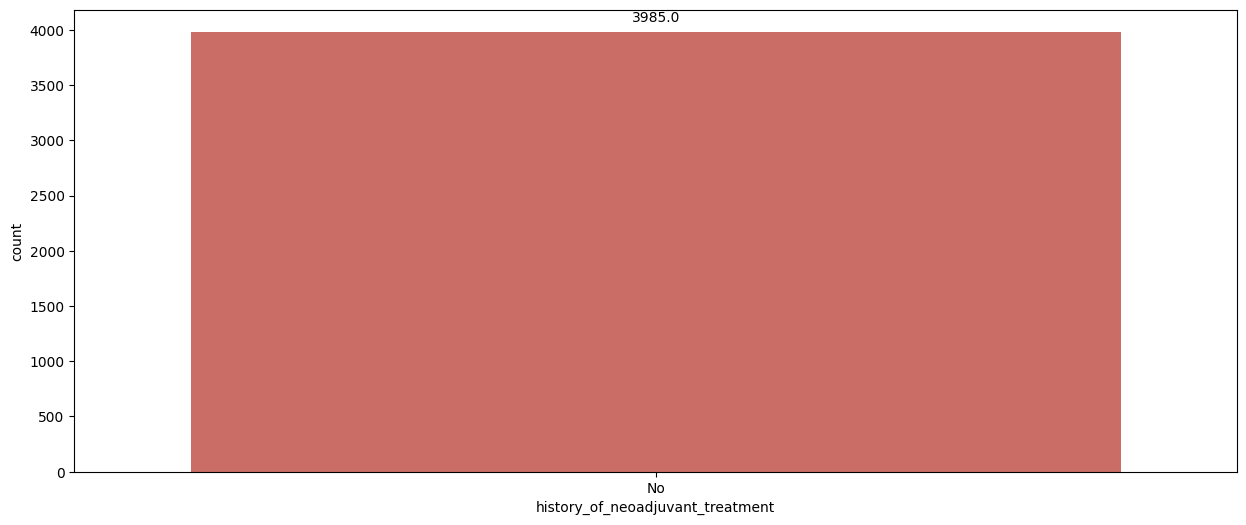

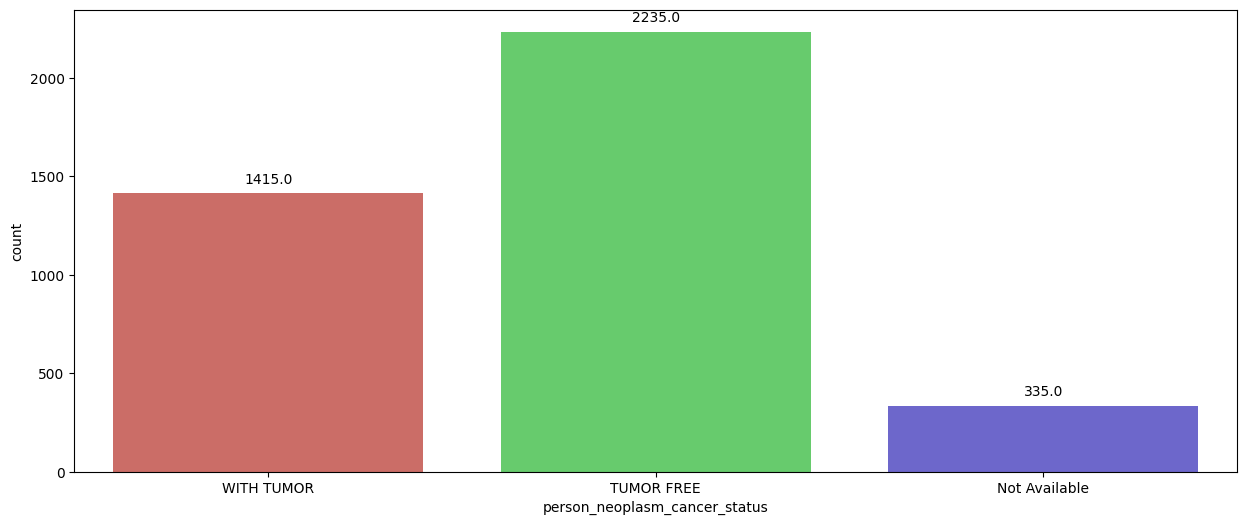

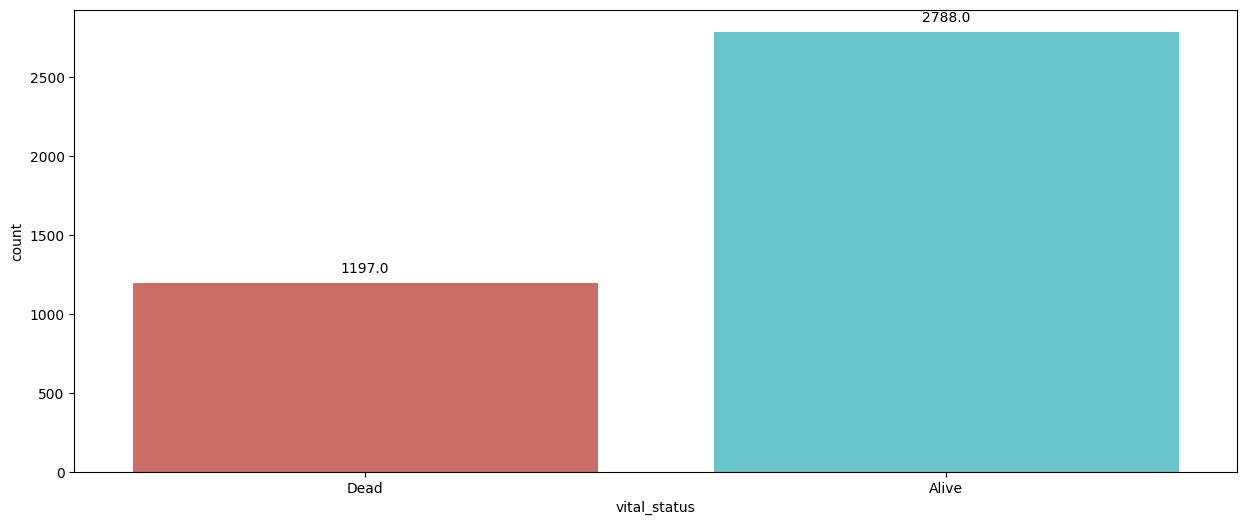

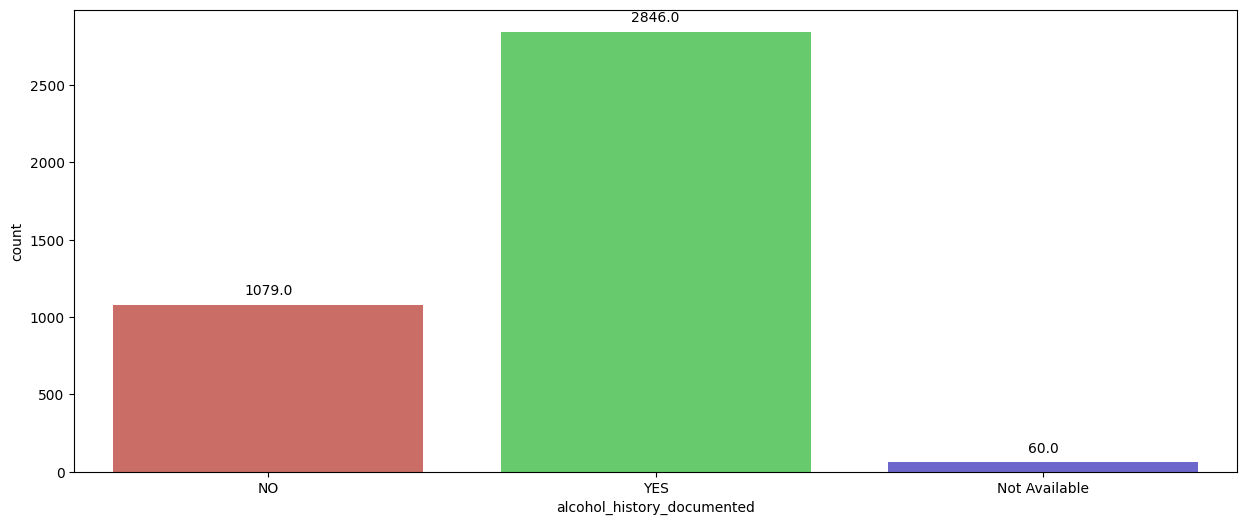

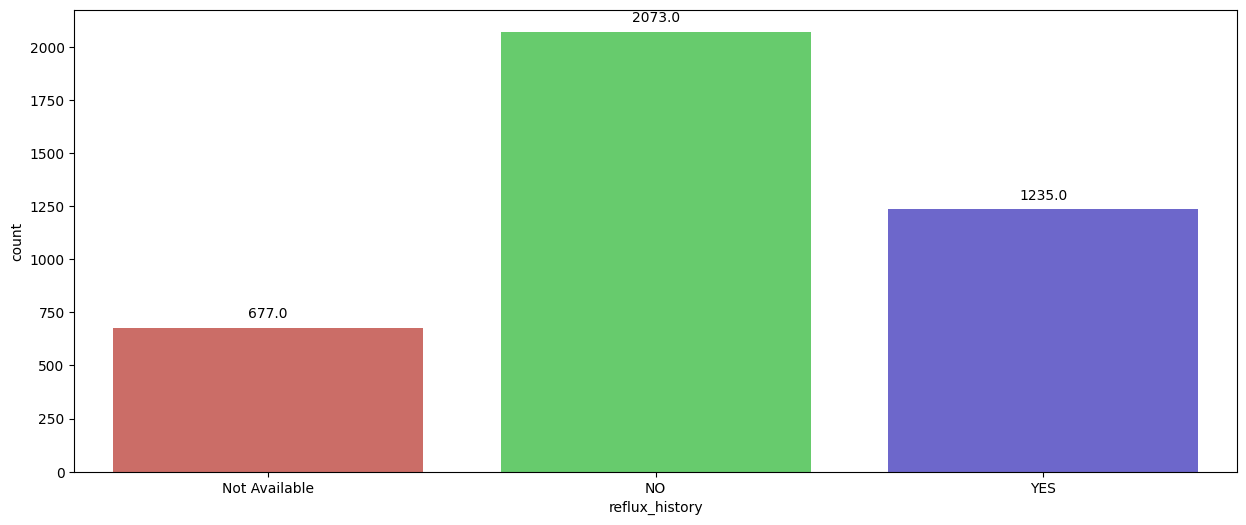

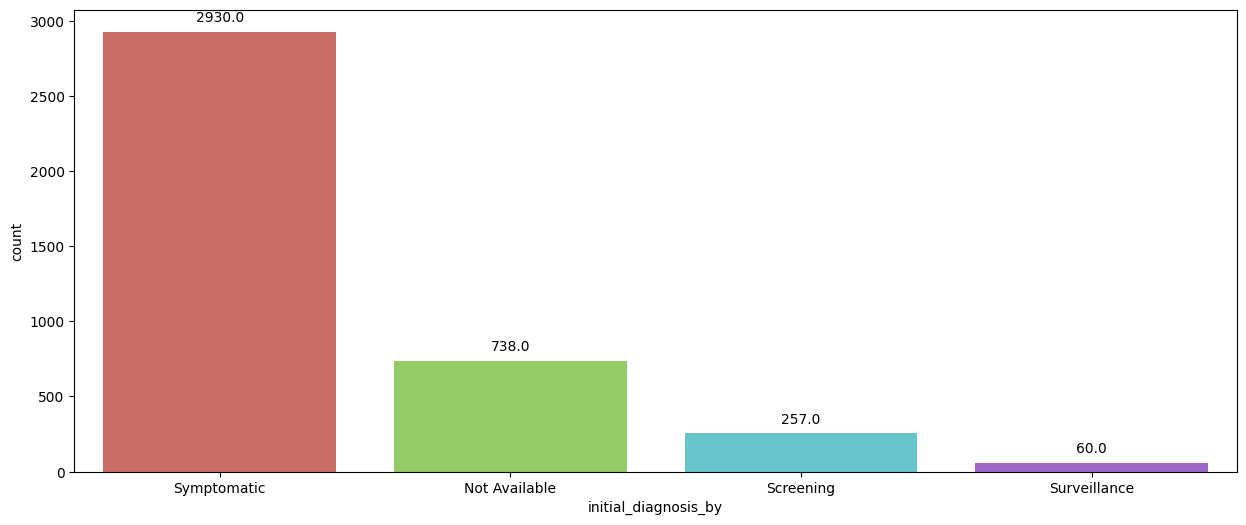

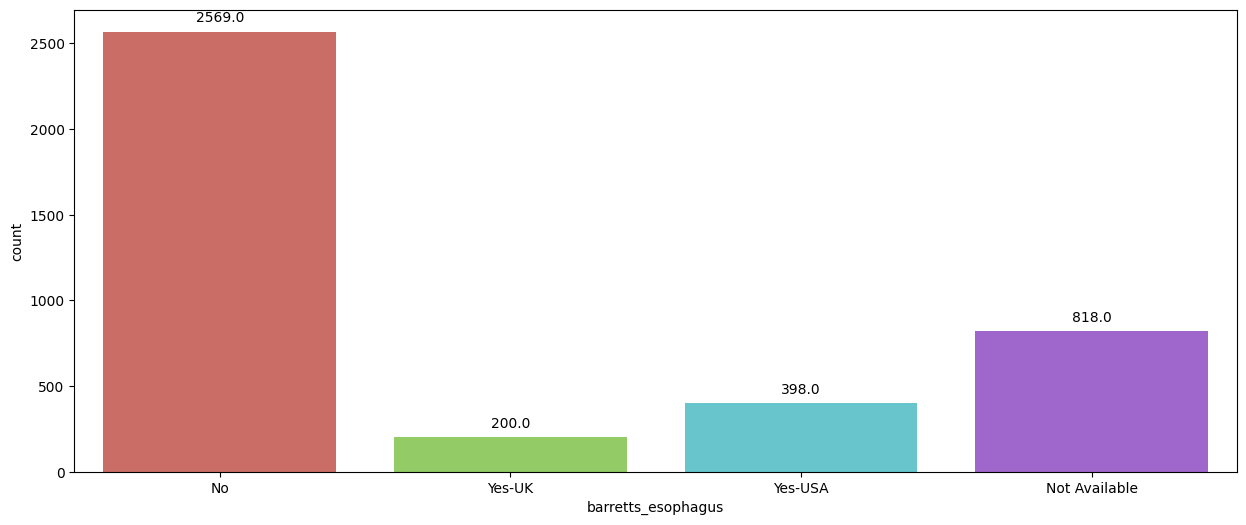

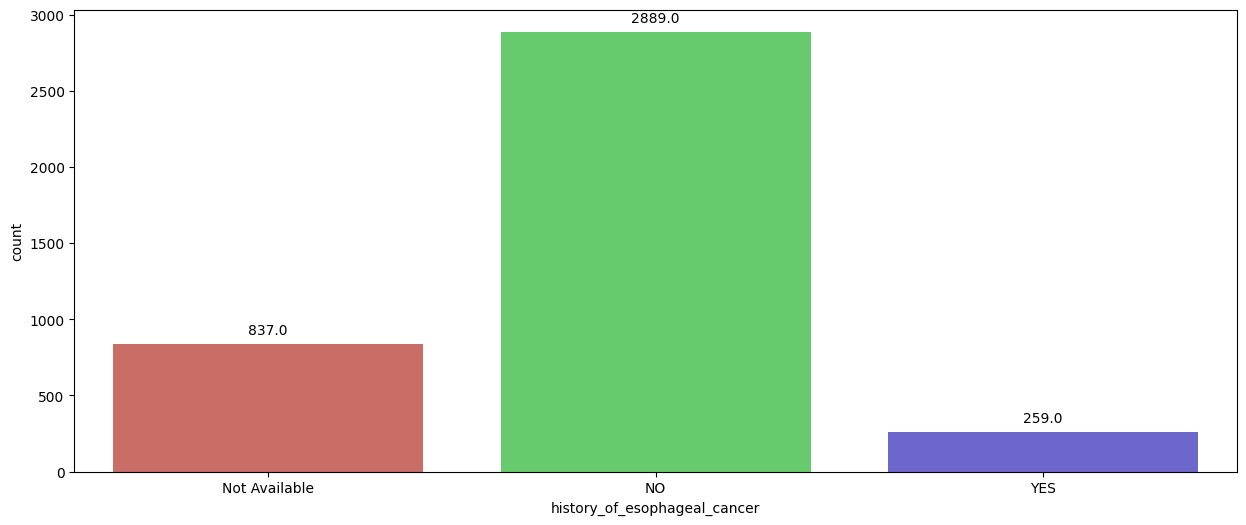

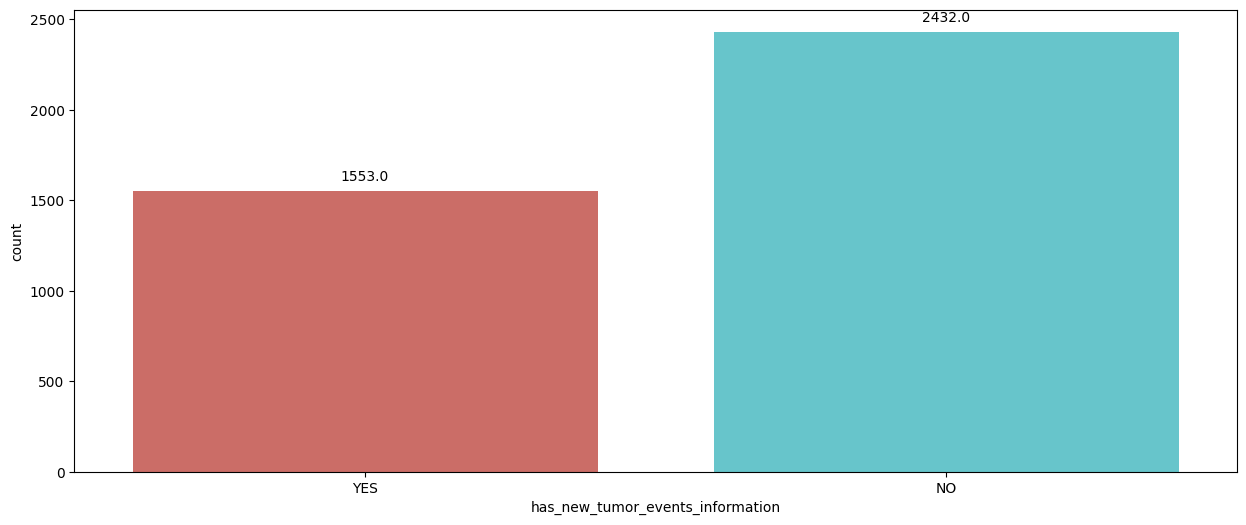

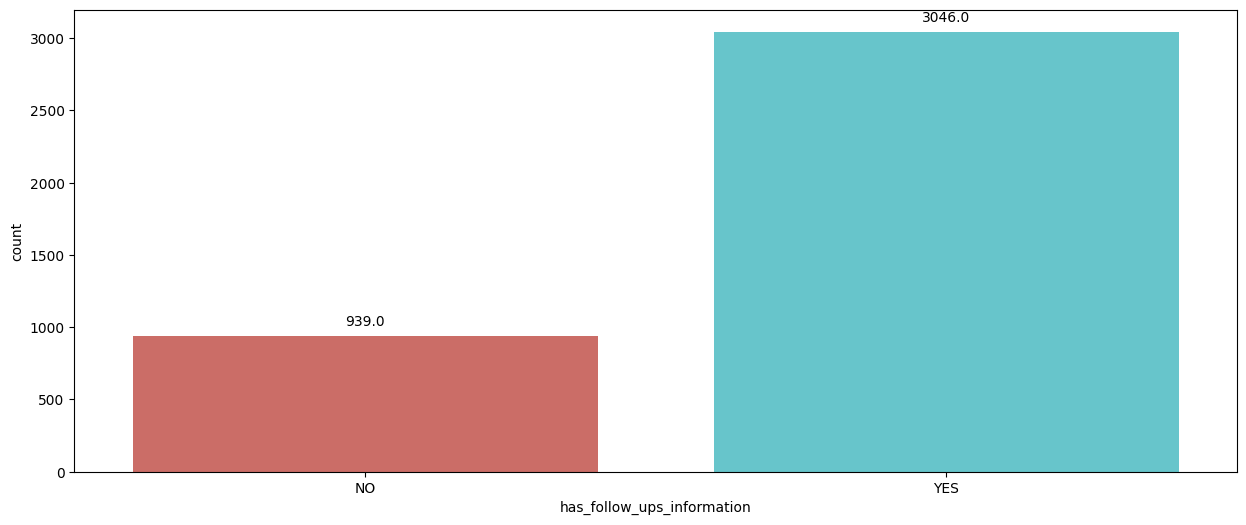

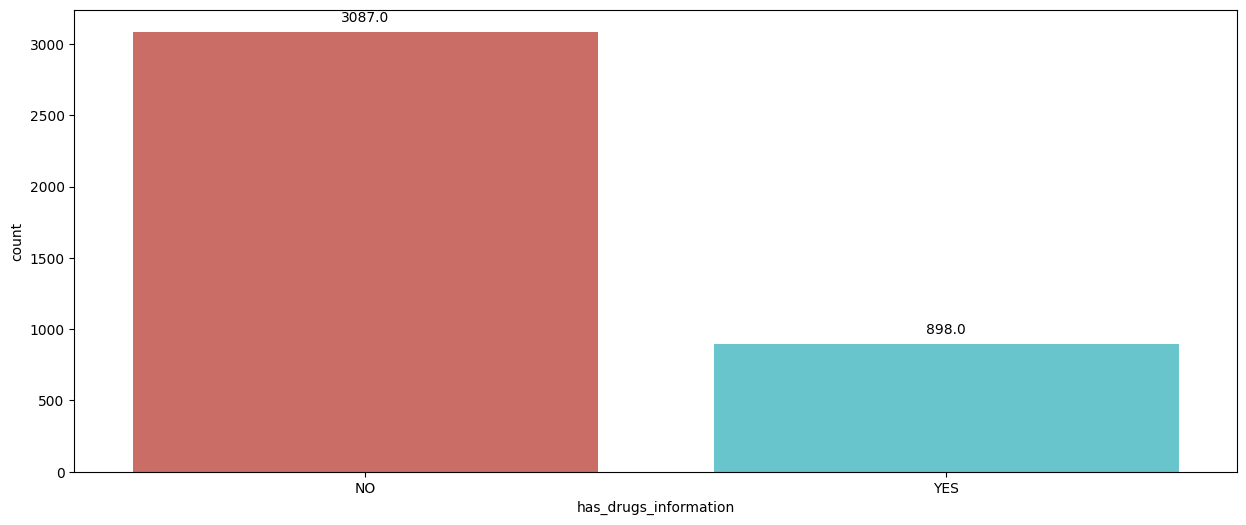

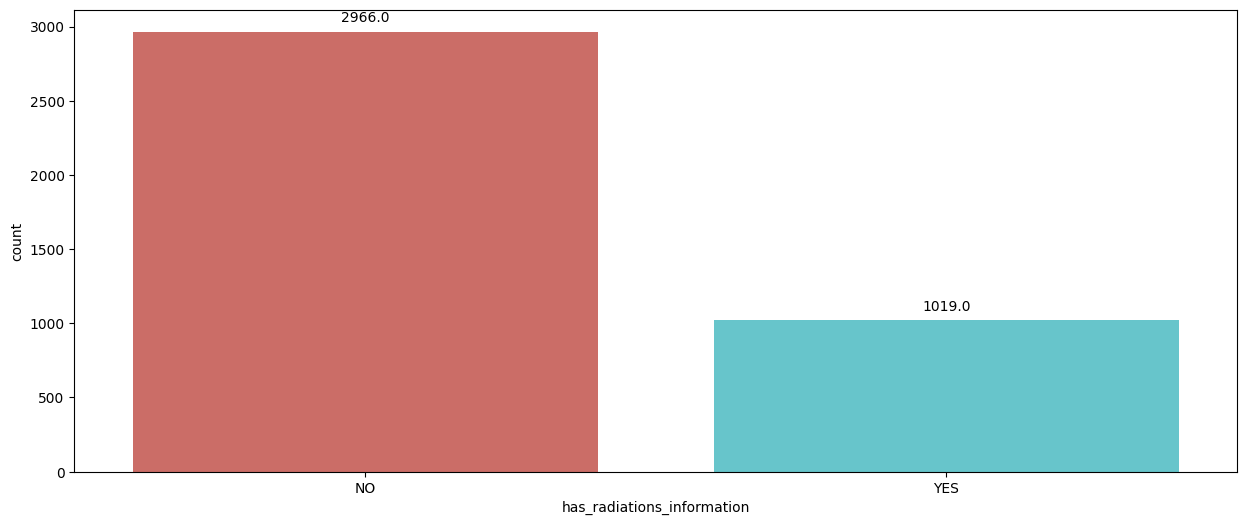

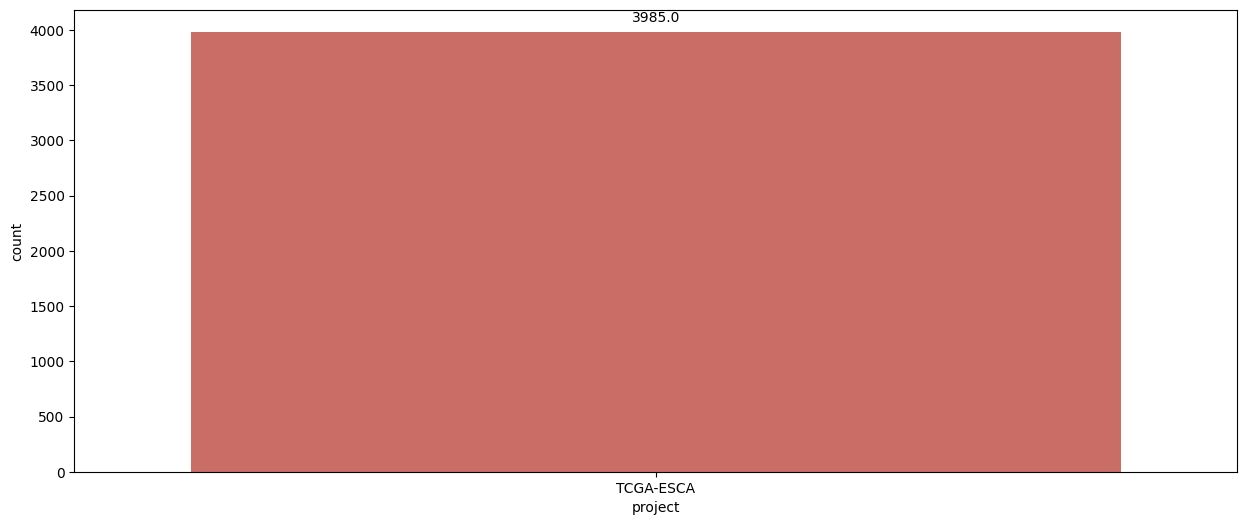

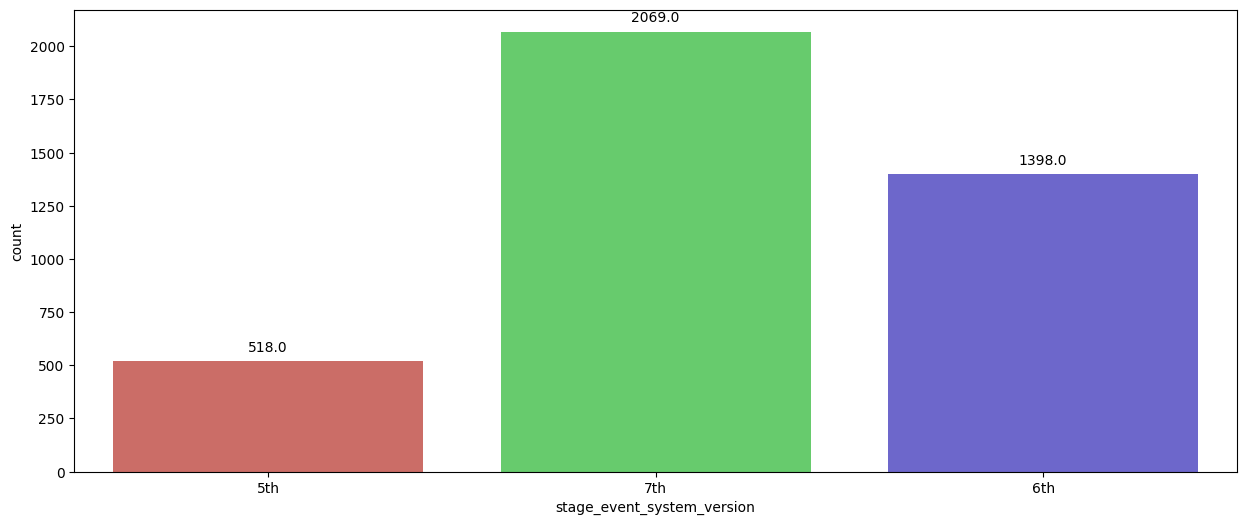

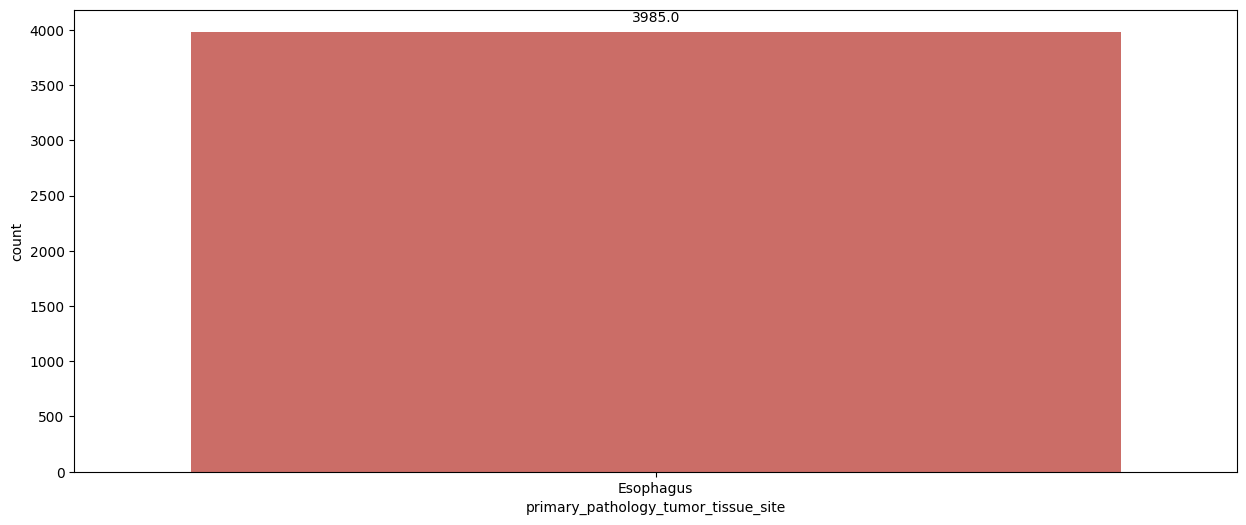

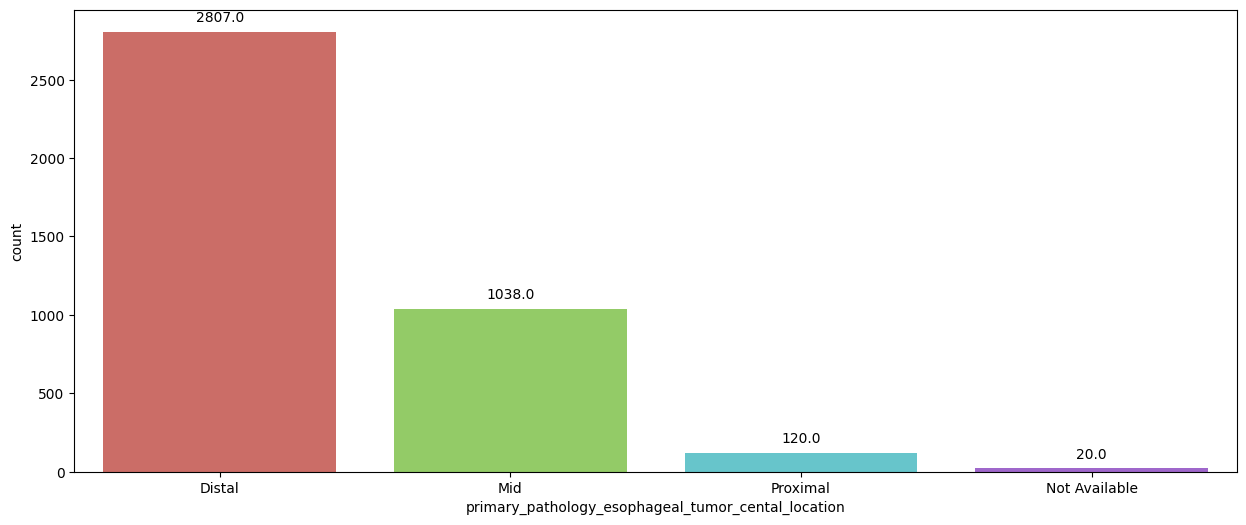

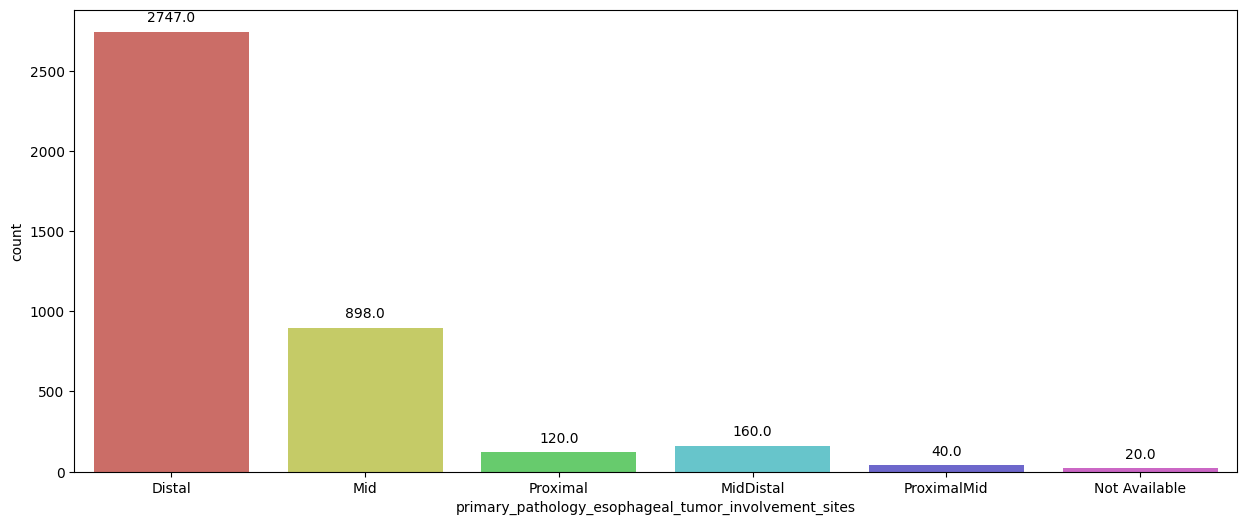

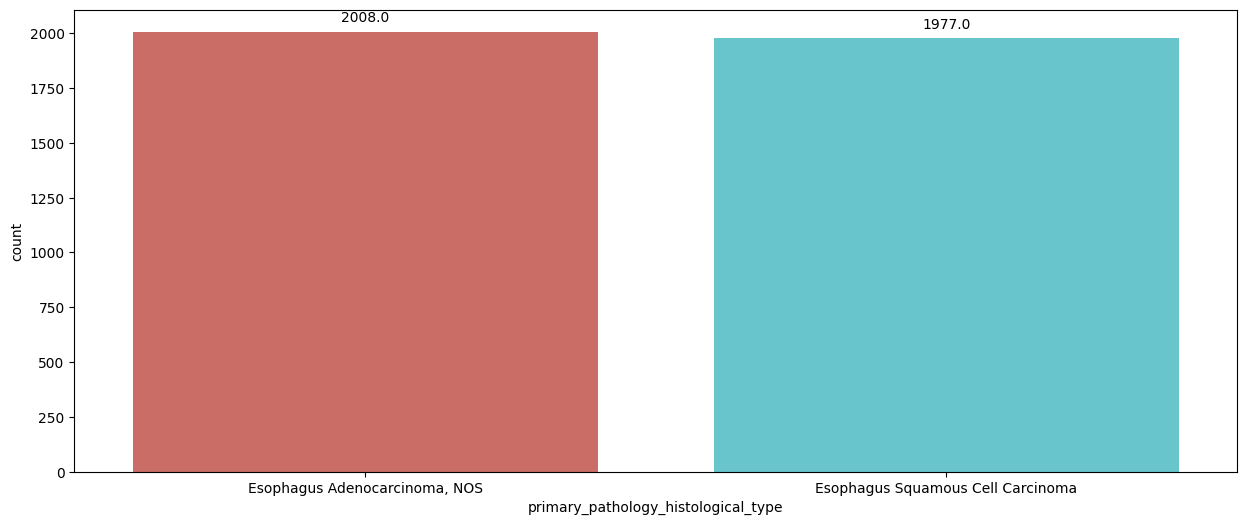

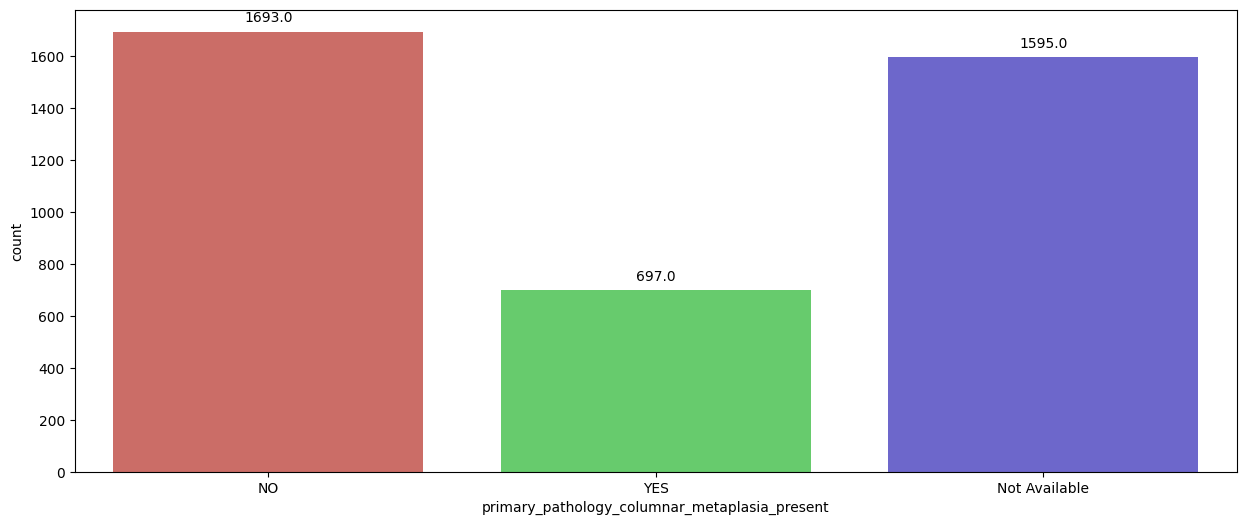

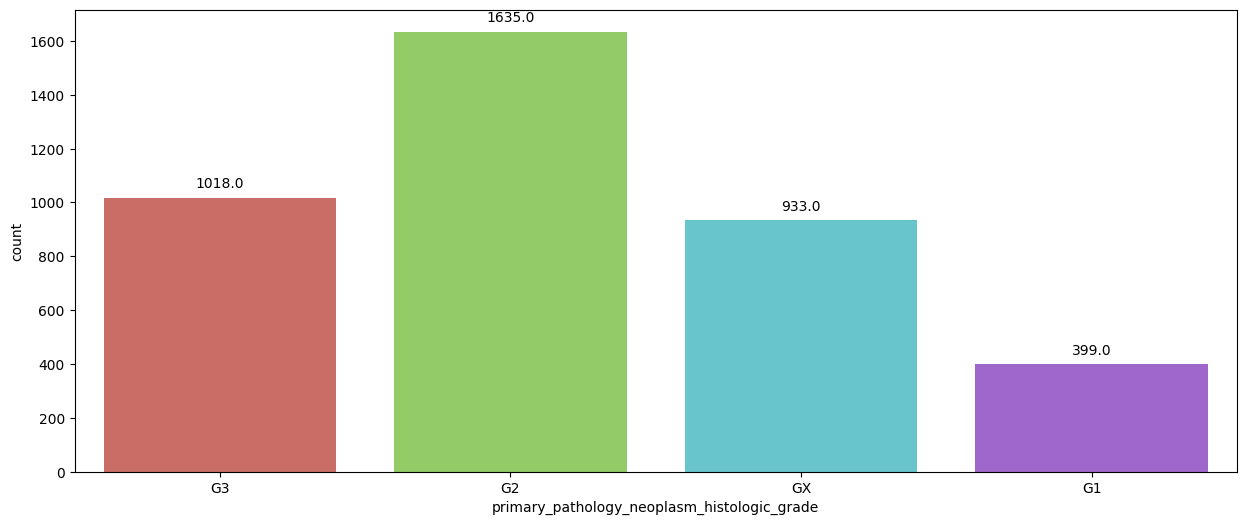

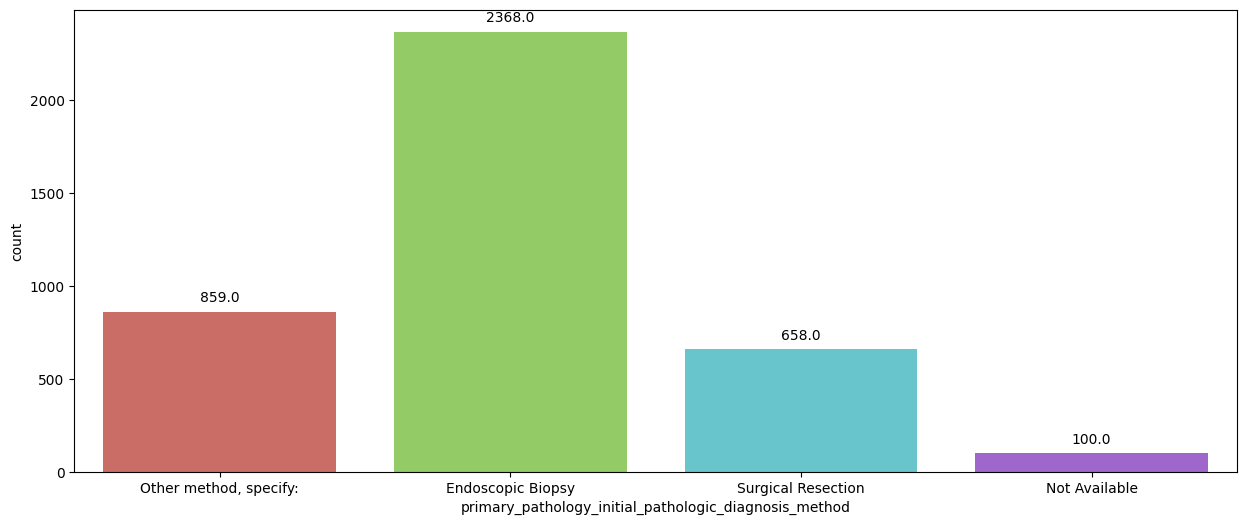

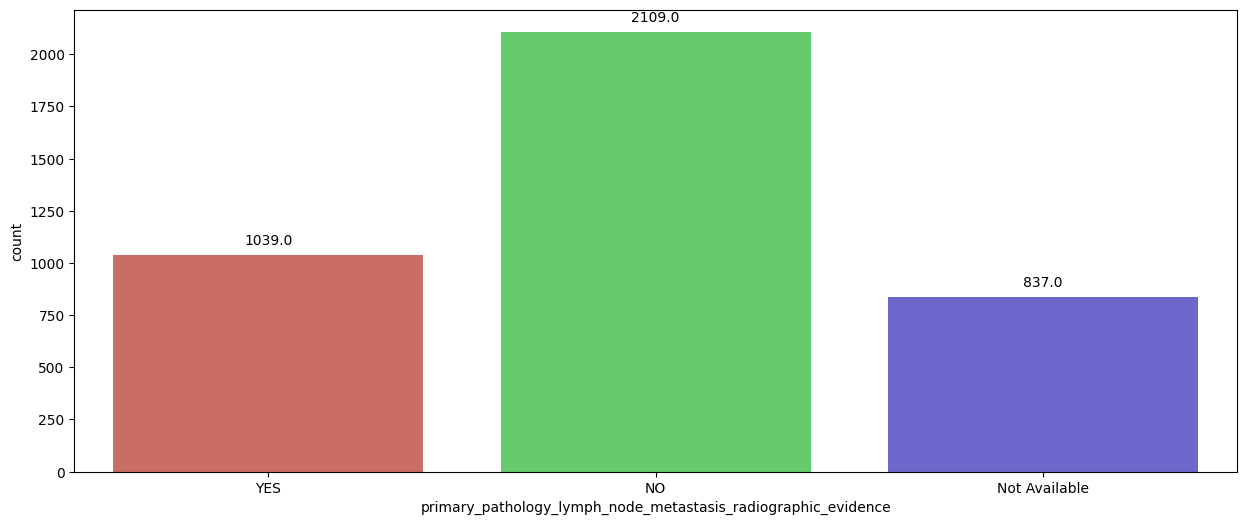

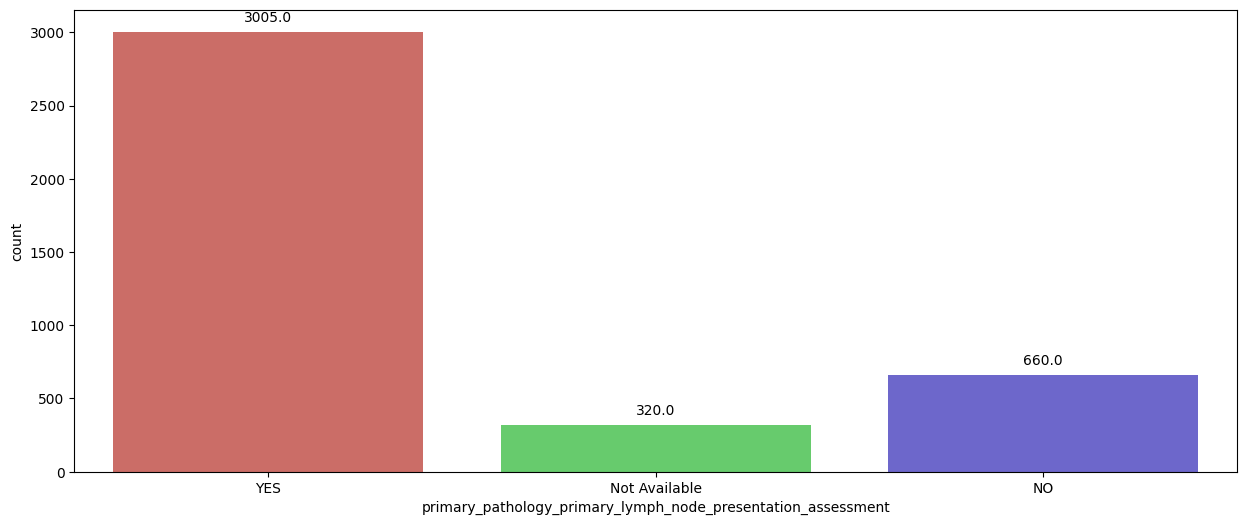

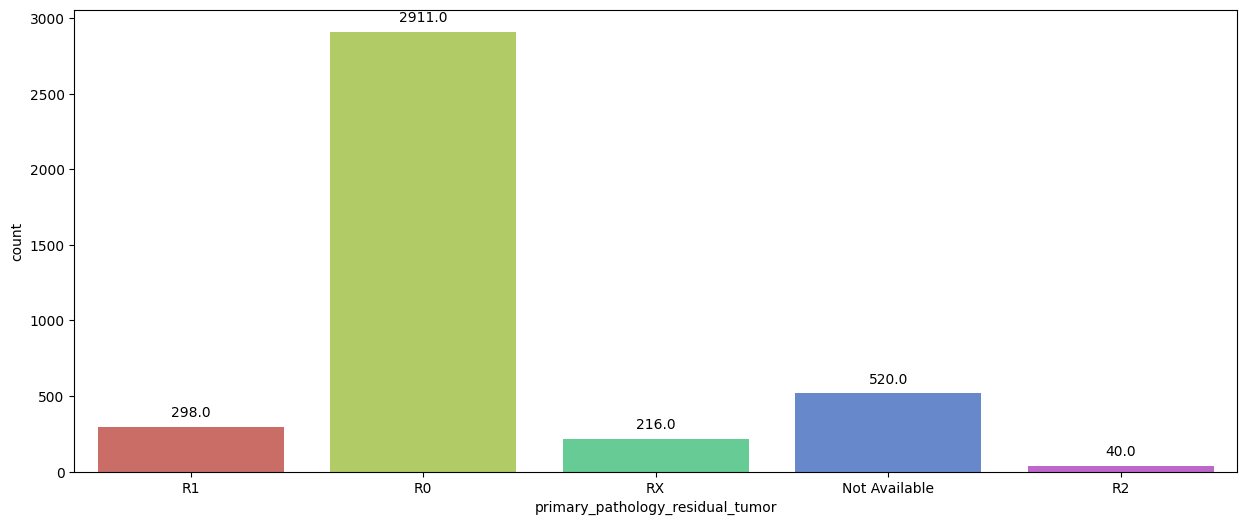

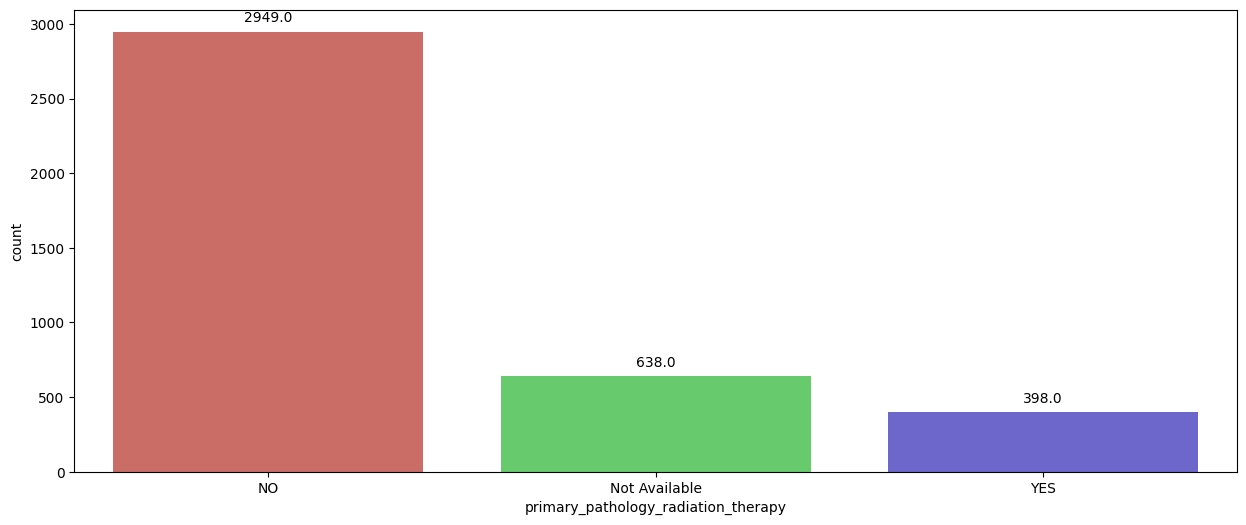

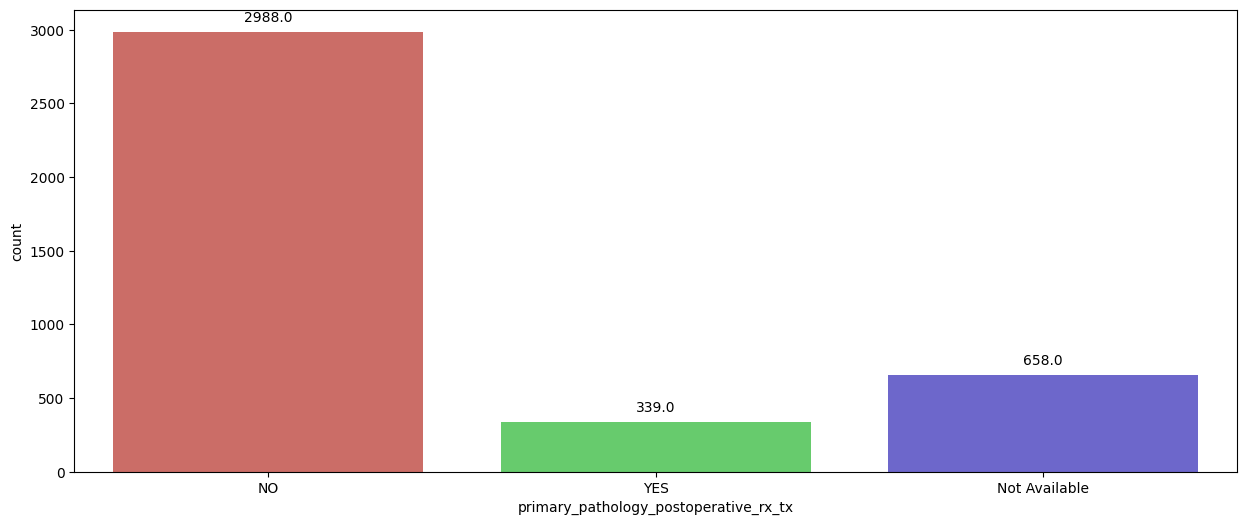

In [34]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [35]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [36]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [37]:
label_enc = LabelEncoder()
df_encoded = df[categorical].apply(lambda x: label_enc.fit_transform(x.astype(str)))

In [38]:
chi_scores = chi2(df_encoded, df['person_neoplasm_cancer_status'])[0]
chi_scores_series = pd.Series(chi_scores, index=categorical).sort_values(ascending=False)
best_categorical_features = chi_scores_series[chi_scores_series > 10].index.tolist()

In [39]:
best_categorical_features

['person_neoplasm_cancer_status',
 'tissue_prospective_collection_indicator',
 'icd_o_3_histology',
 'vital_status',
 'tissue_retrospective_collection_indicator',
 'country_of_birth',
 'has_new_tumor_events_information',
 'primary_pathology_initial_pathologic_diagnosis_method',
 'initial_diagnosis_by',
 'race_list',
 'other_dx',
 'primary_pathology_histological_type',
 'has_follow_ups_information',
 'primary_pathology_esophageal_tumor_involvement_sites',
 'has_radiations_information',
 'primary_pathology_esophageal_tumor_cental_location',
 'reflux_history',
 'primary_pathology_radiation_therapy',
 'has_drugs_information',
 'primary_pathology_residual_tumor',
 'primary_pathology_primary_lymph_node_presentation_assessment',
 'primary_pathology_postoperative_rx_tx',
 'barretts_esophagus',
 'stage_event_system_version',
 'history_of_esophageal_cancer',
 'alcohol_history_documented',
 'primary_pathology_lymph_node_metastasis_radiographic_evidence',
 'primary_pathology_columnar_metaplasia_pr

In [40]:
target_variable = 'person_neoplasm_cancer_status'

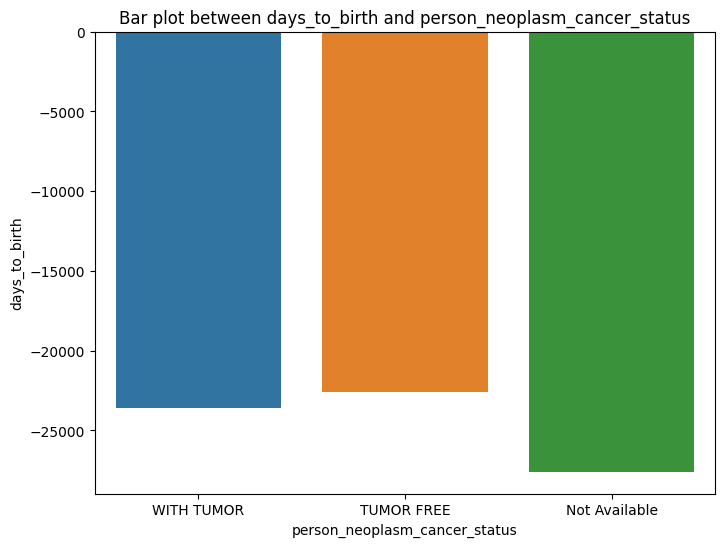

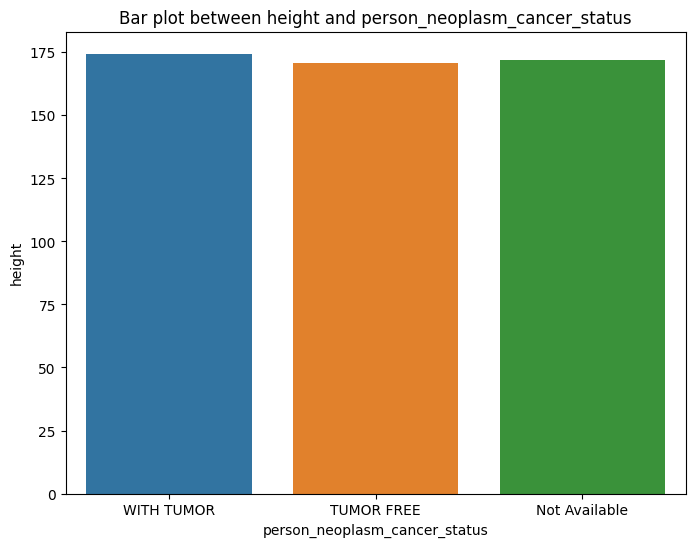

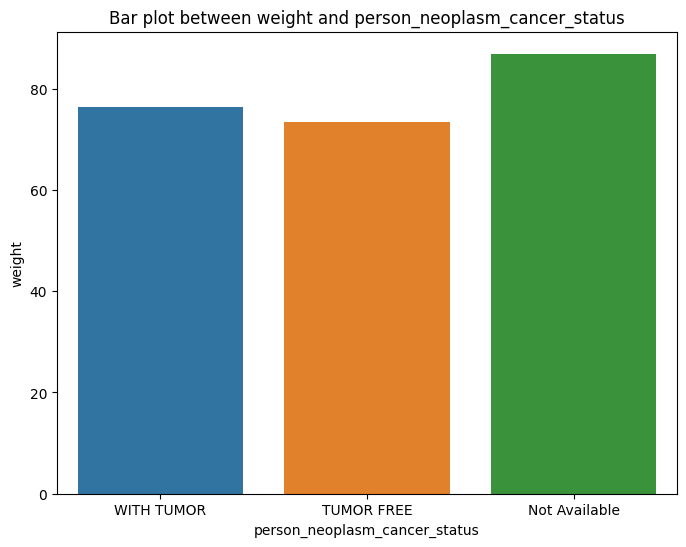

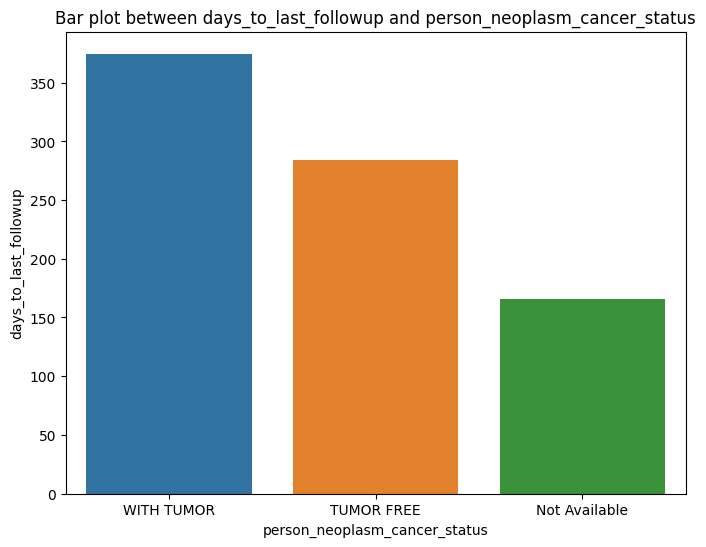

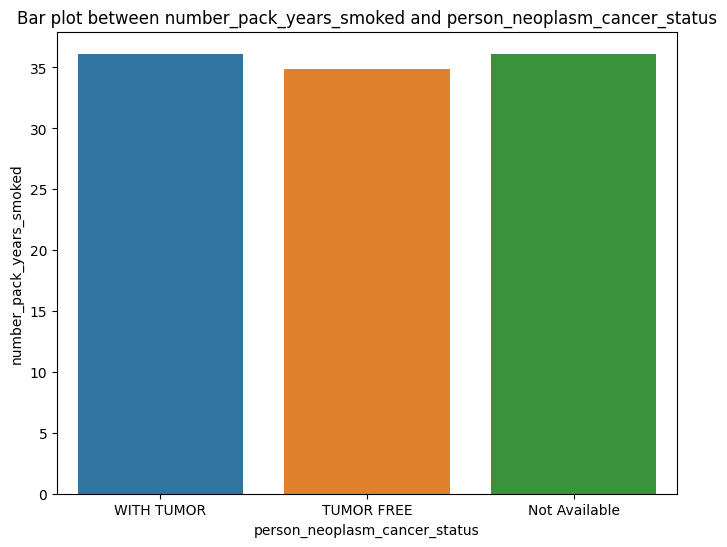

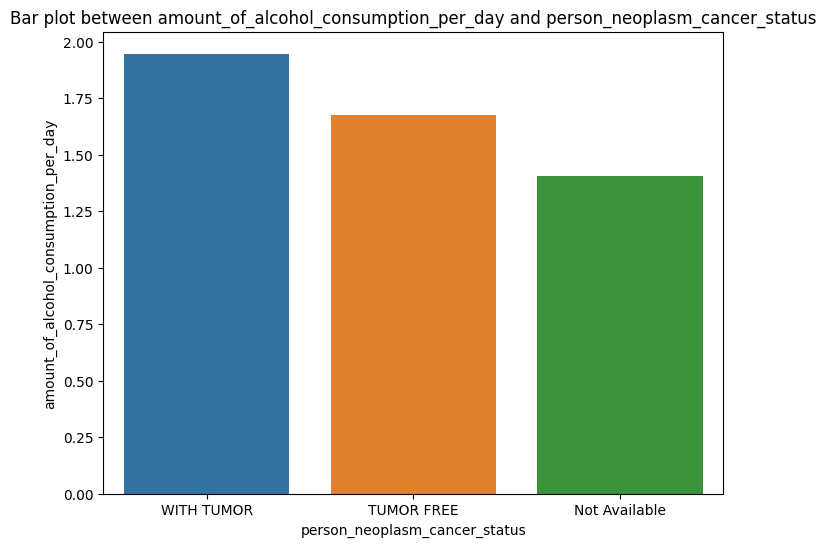

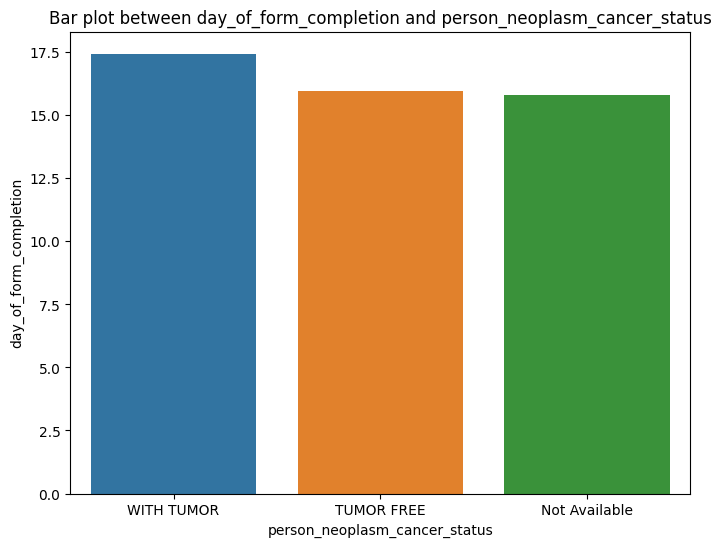

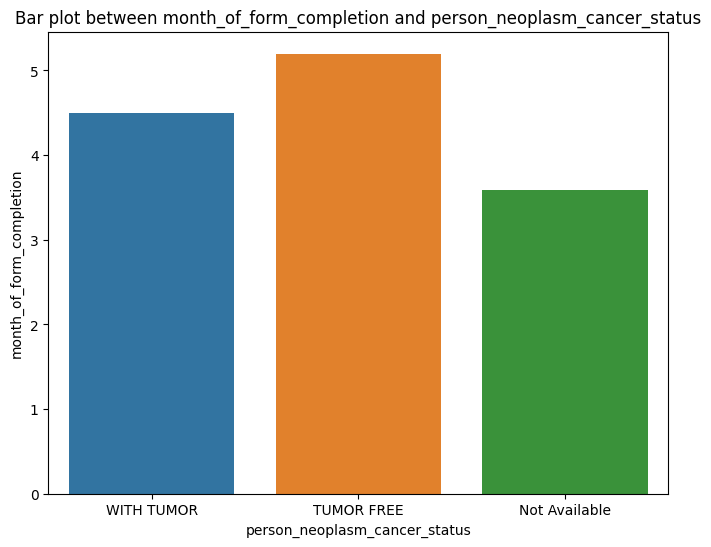

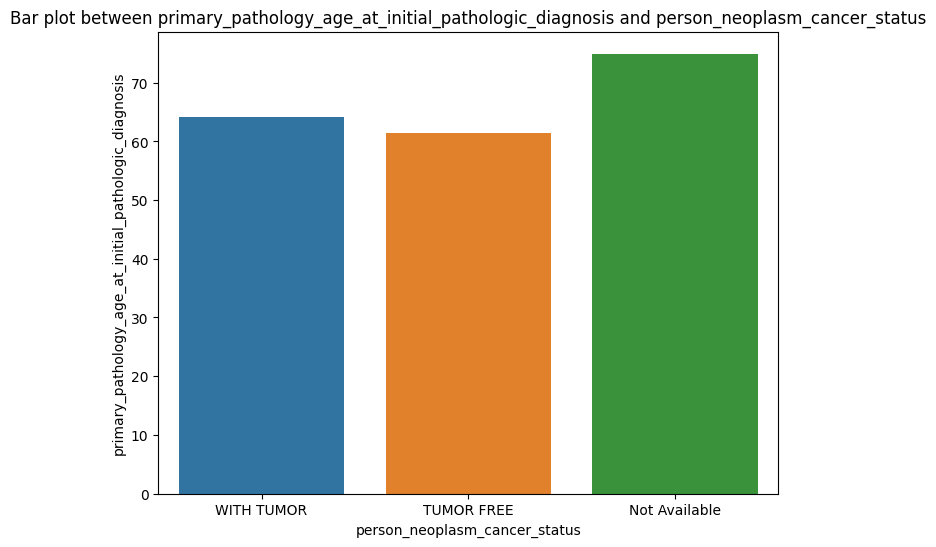

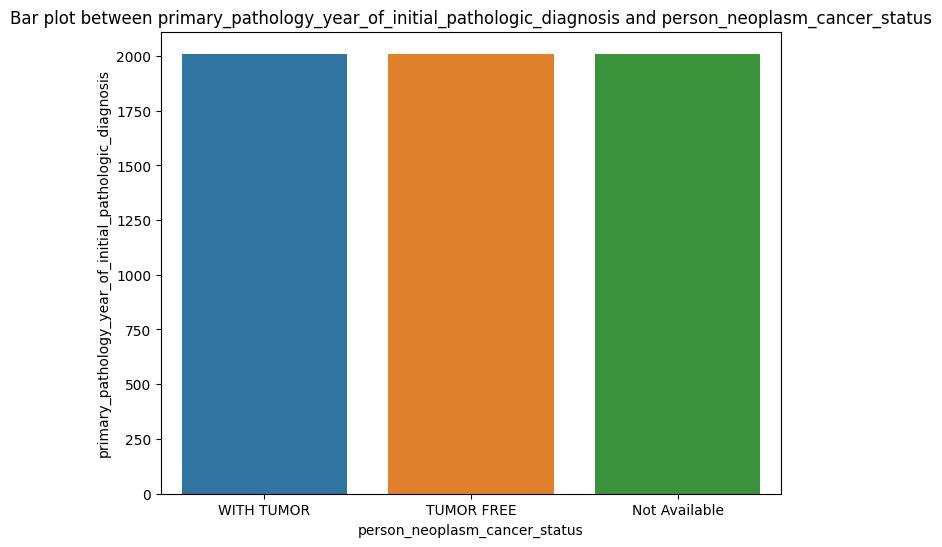

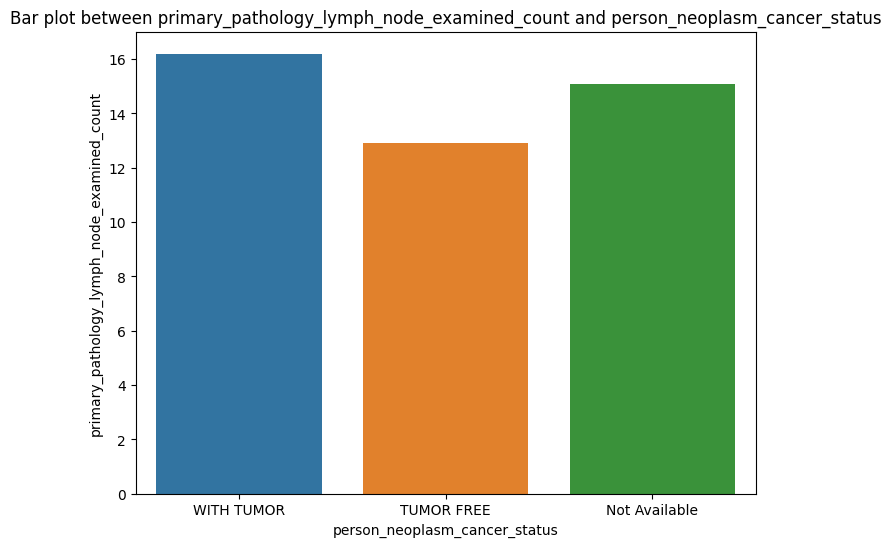

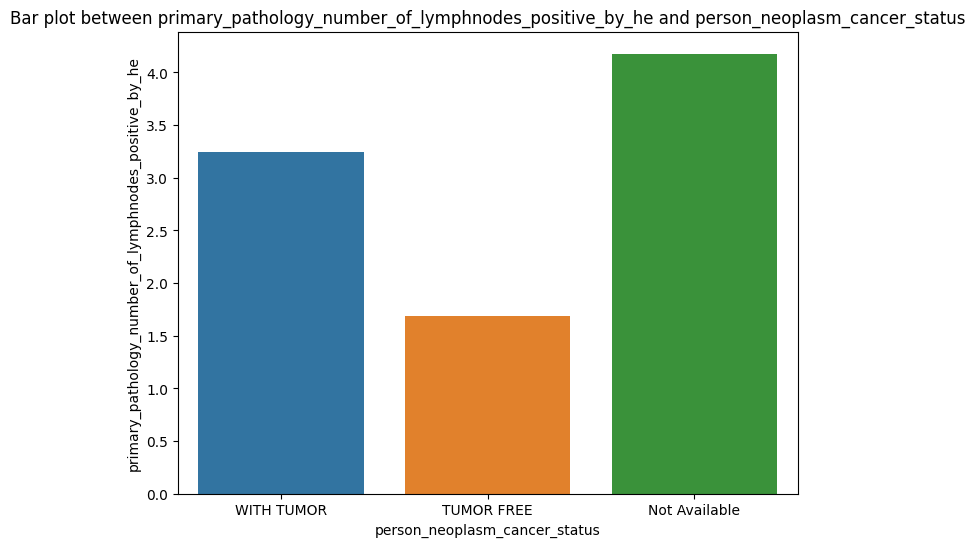

In [44]:
for feature in continuous:
    plt.figure(figsize=(8, 6))
    sns.barplot(y=df[feature], x=df[target_variable], ci = None)
    plt.title(f'Bar plot between {feature} and {target_variable}')
    plt.show()

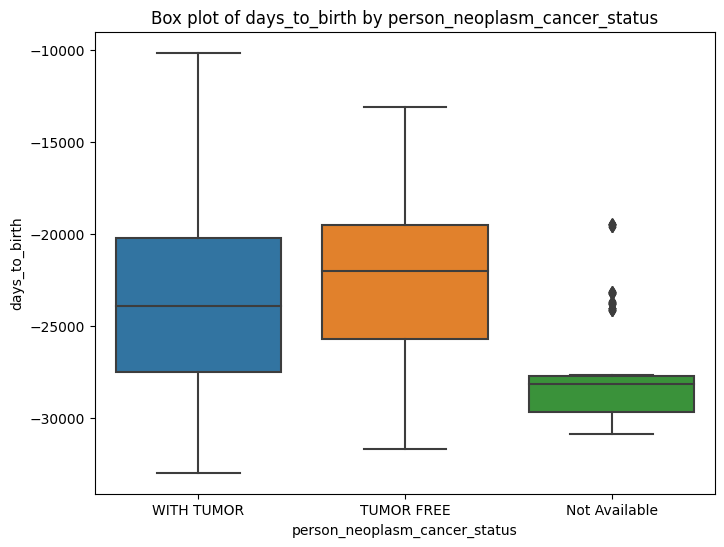

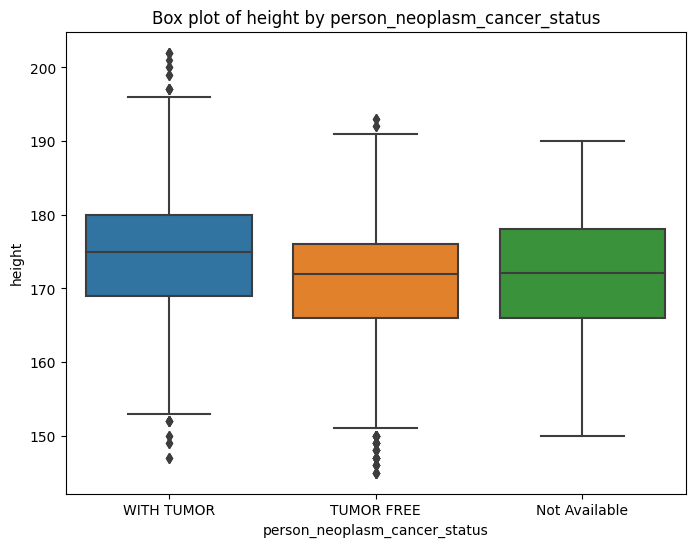

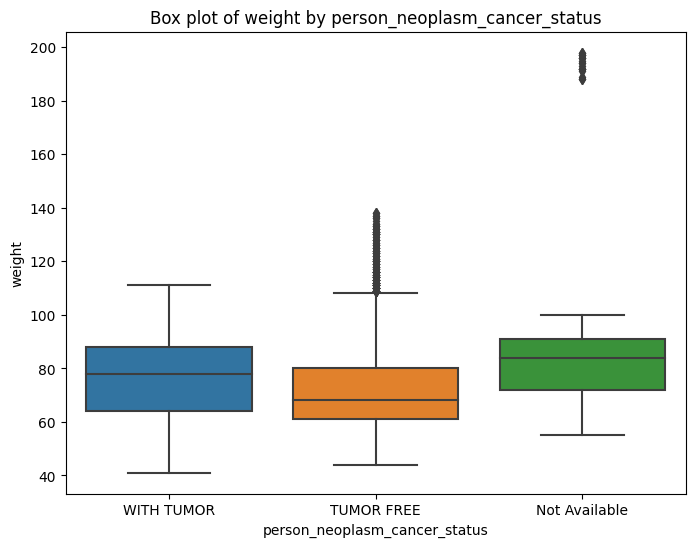

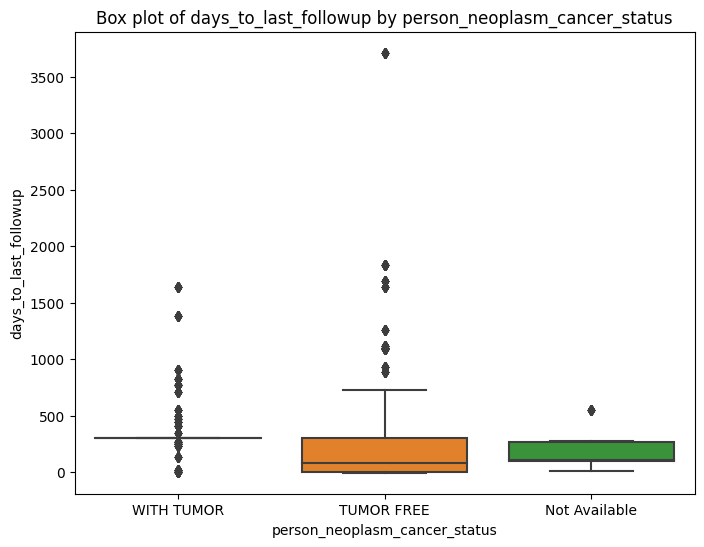

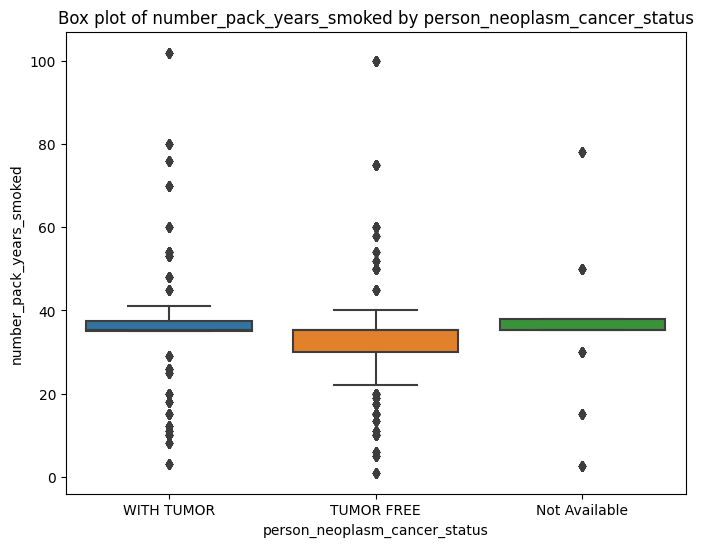

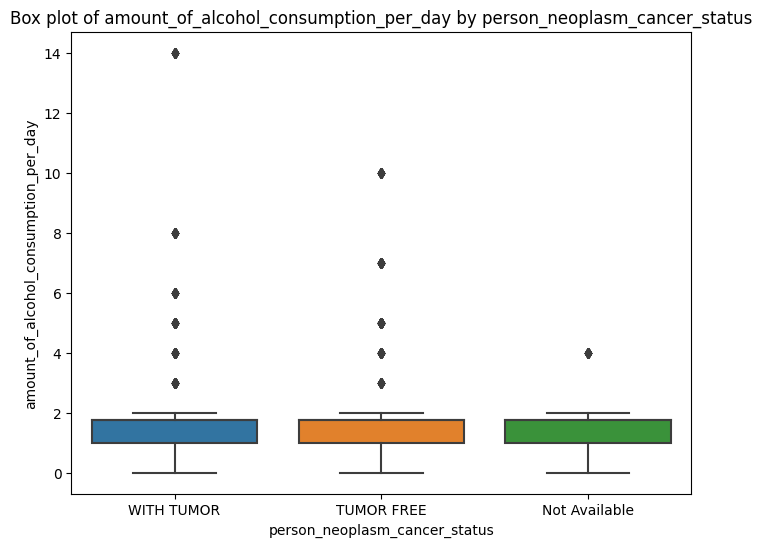

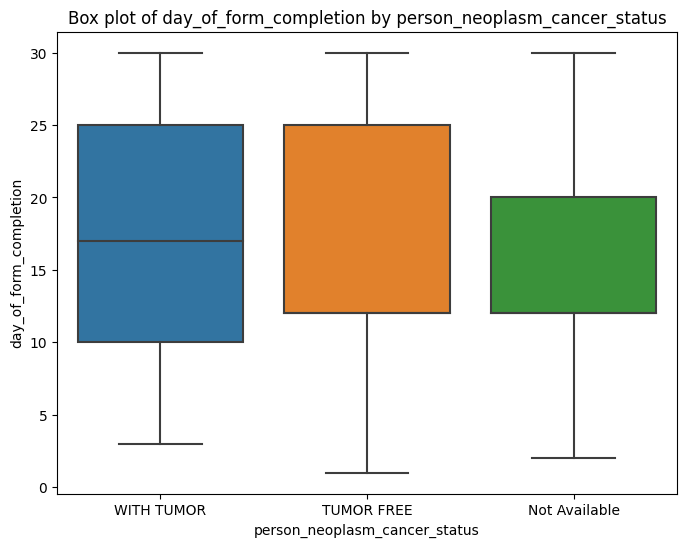

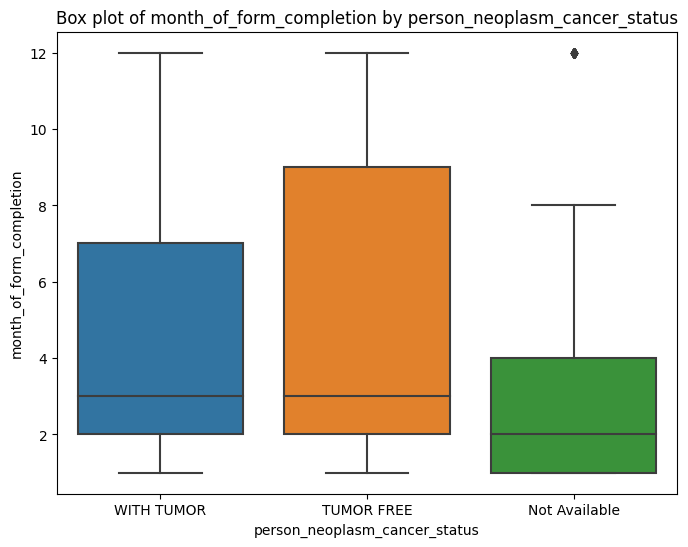

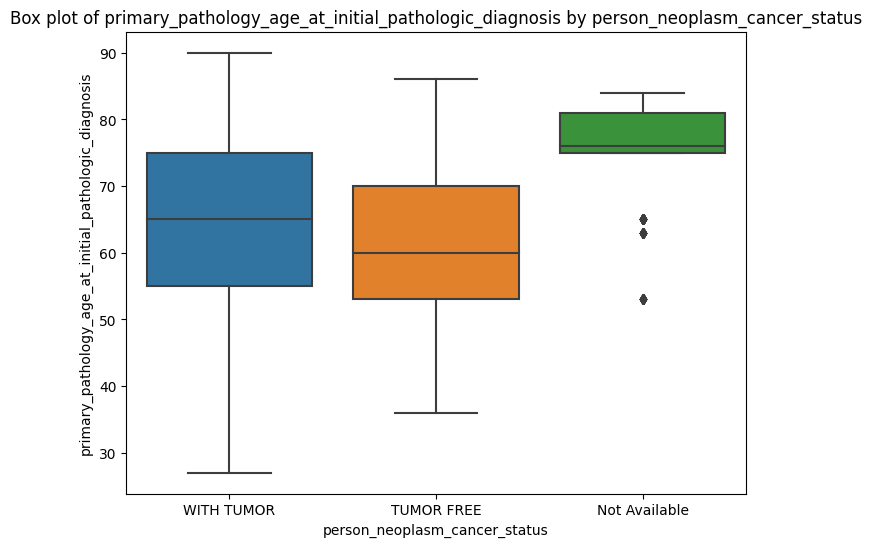

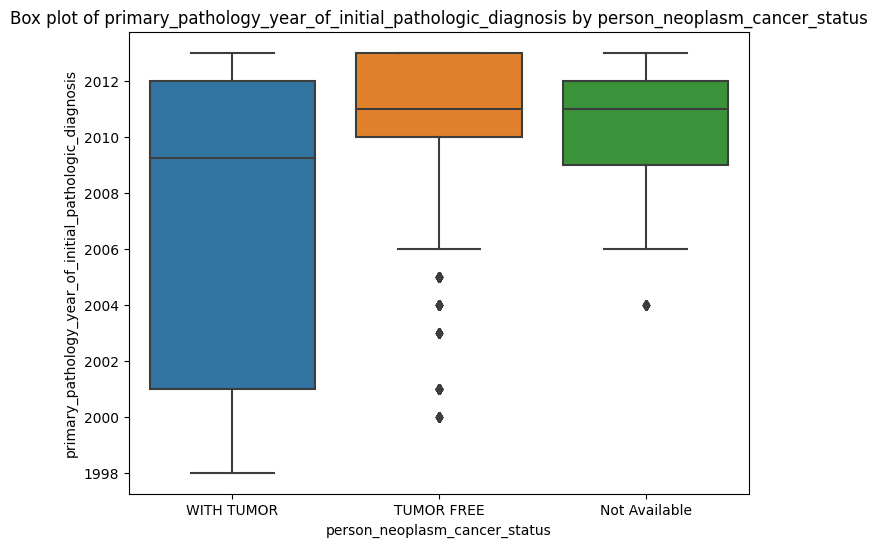

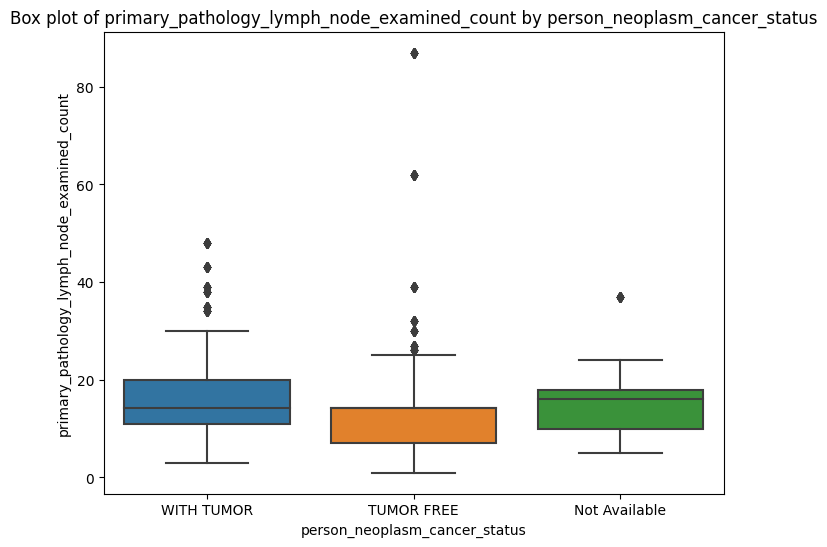

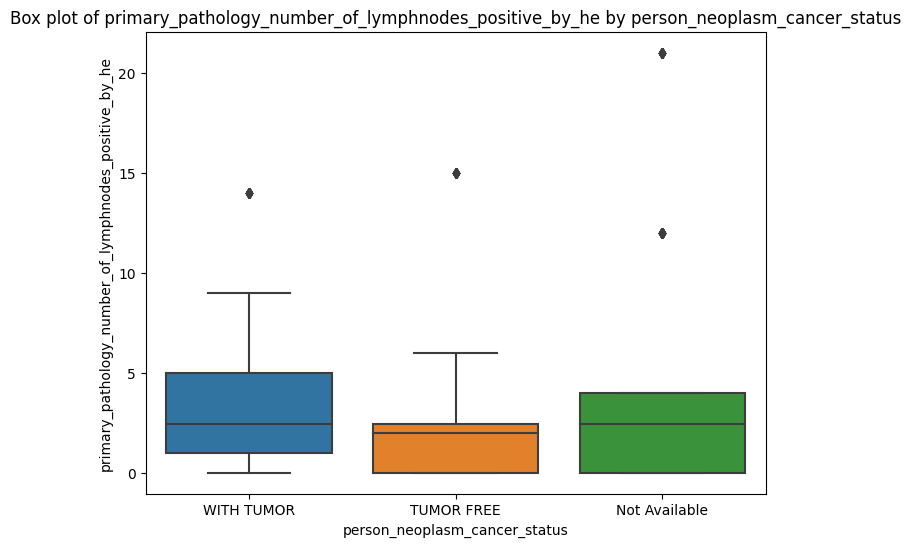

In [45]:
for feature in continuous:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[target_variable], y=df[feature])
    plt.title(f'Box plot of {feature} by {target_variable}')
    plt.show()

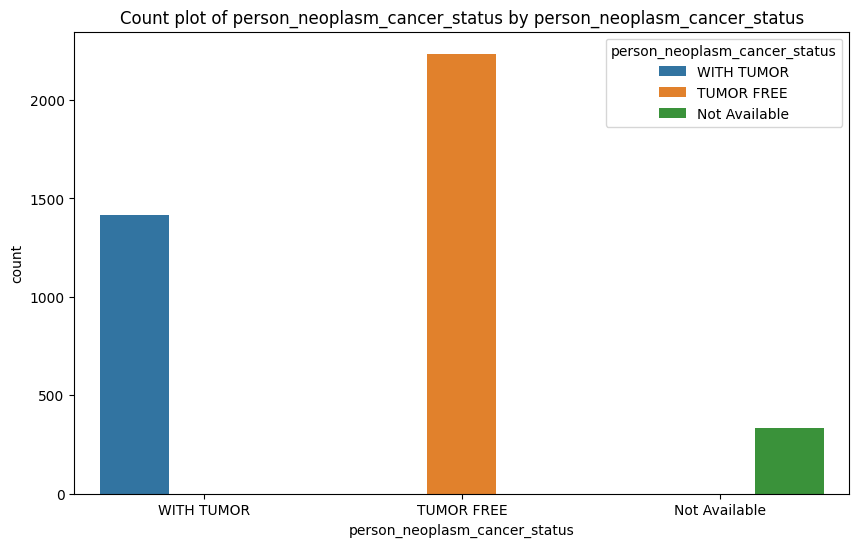

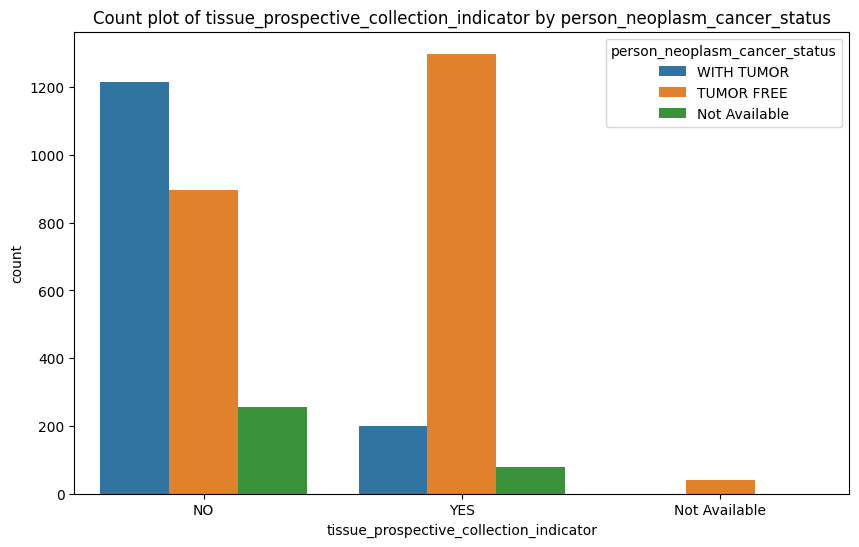

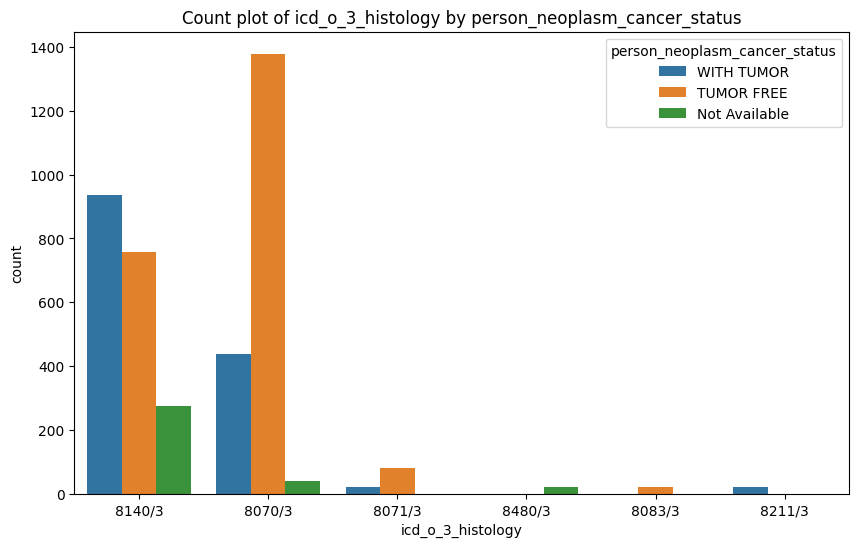

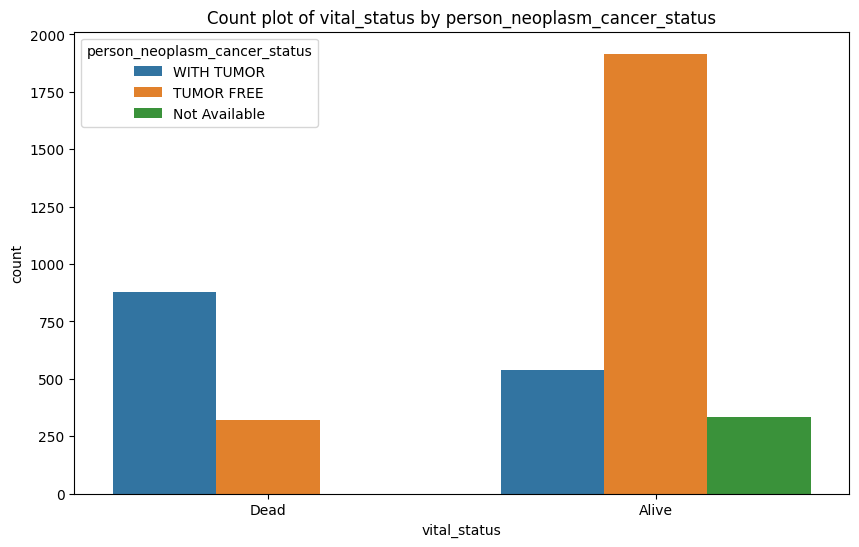

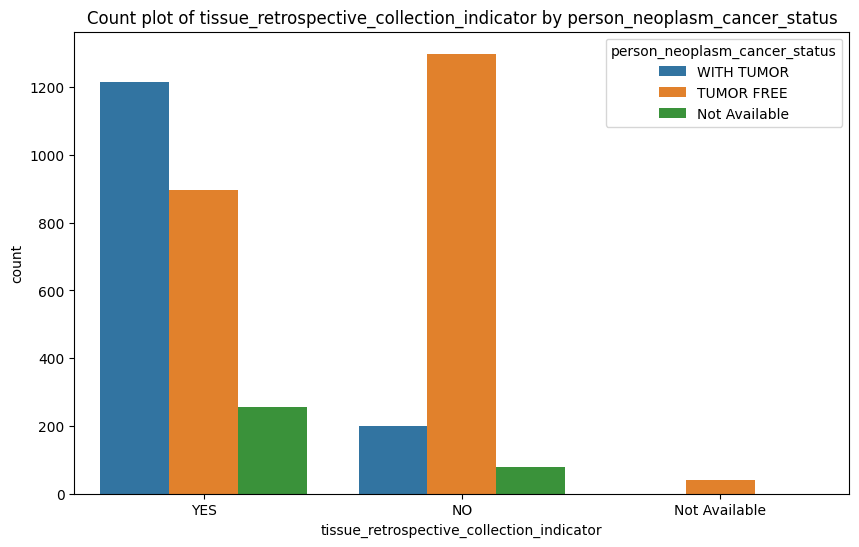

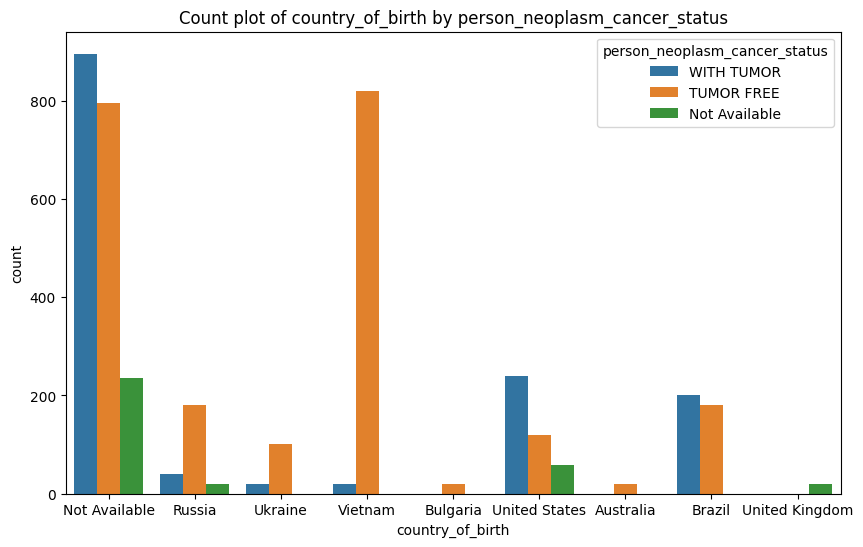

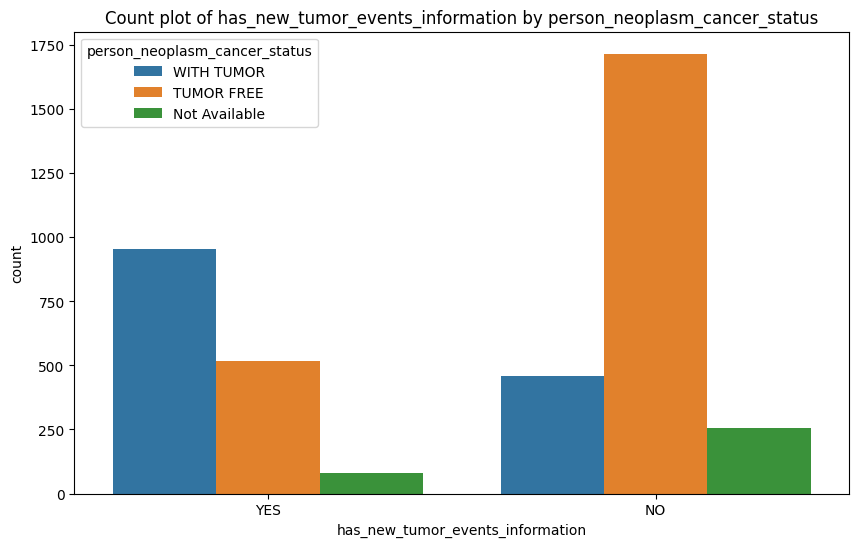

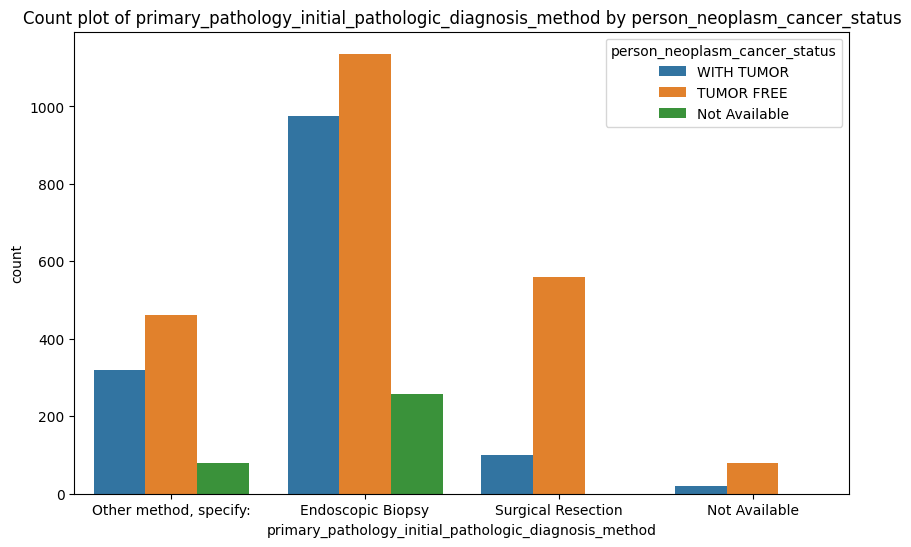

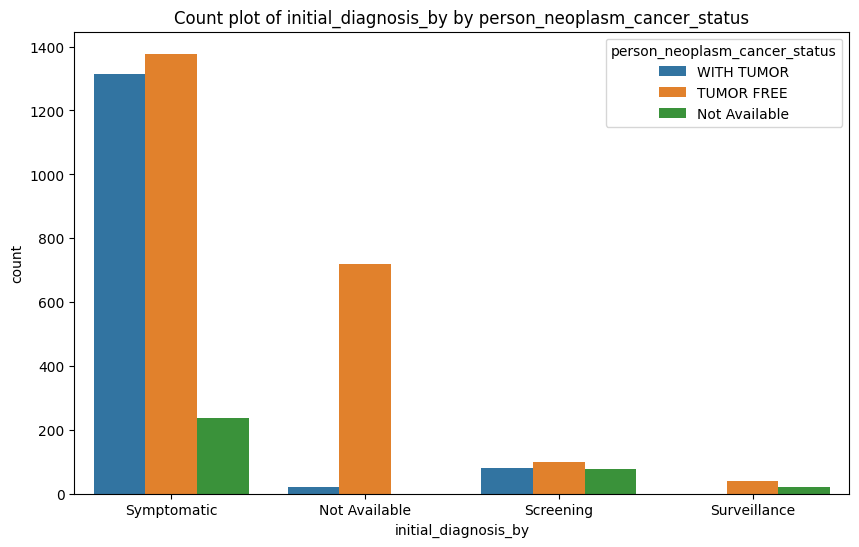

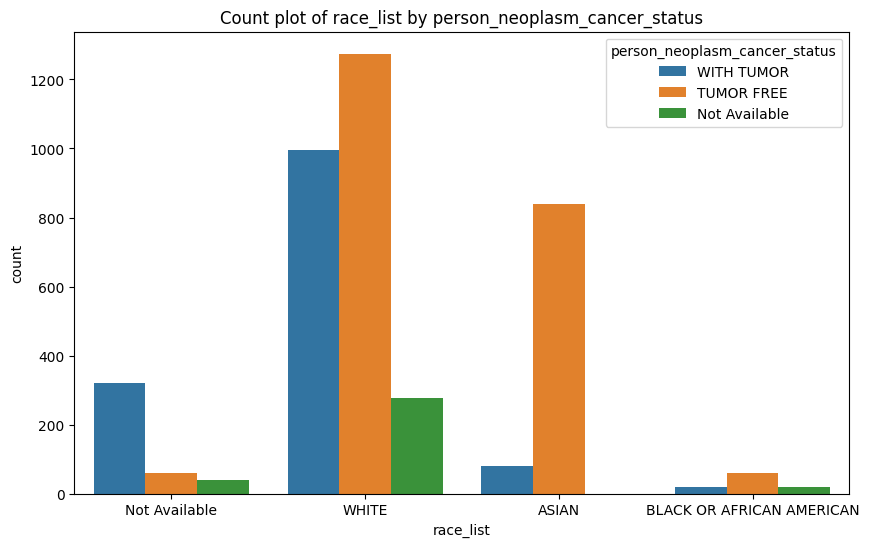

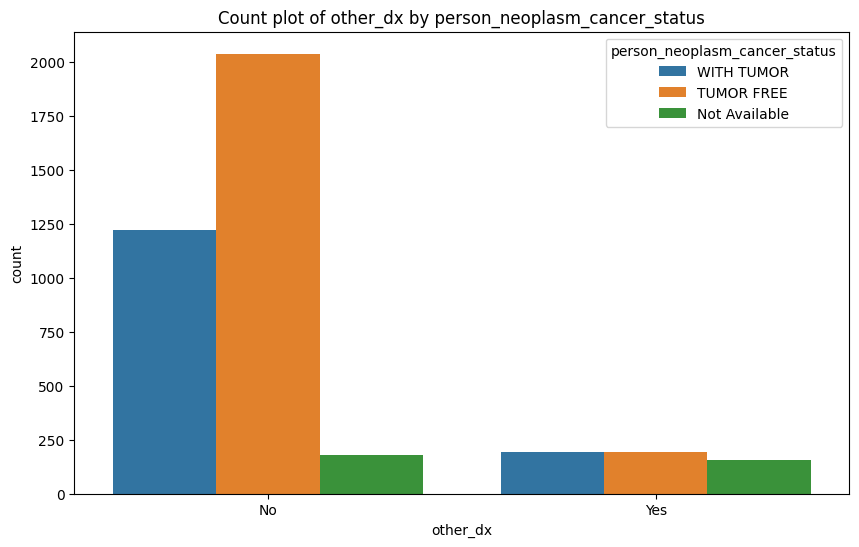

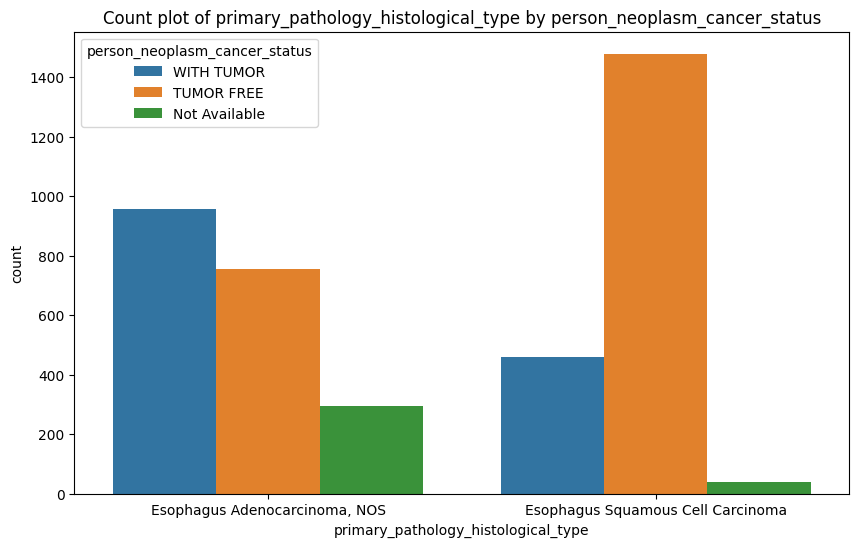

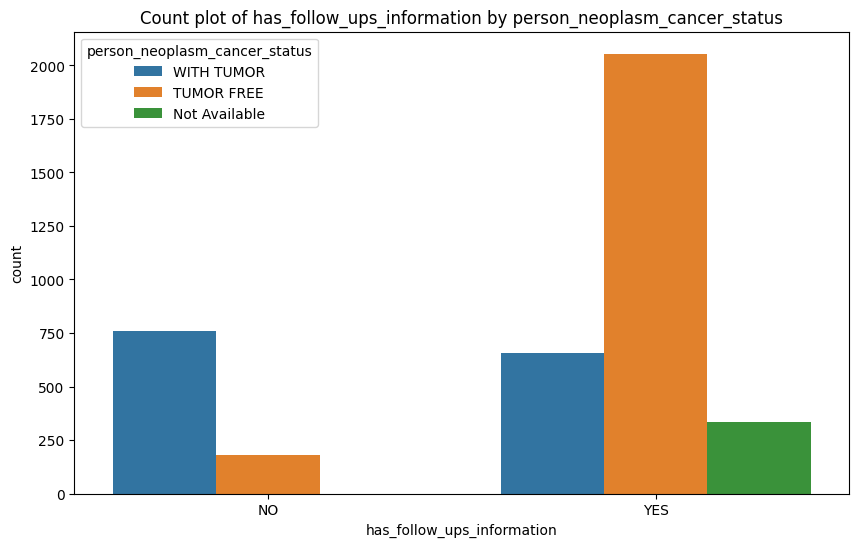

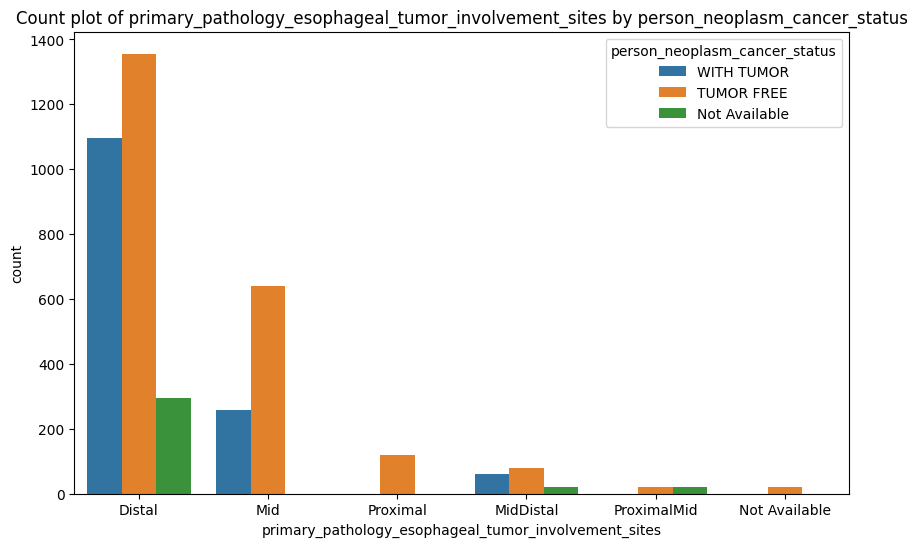

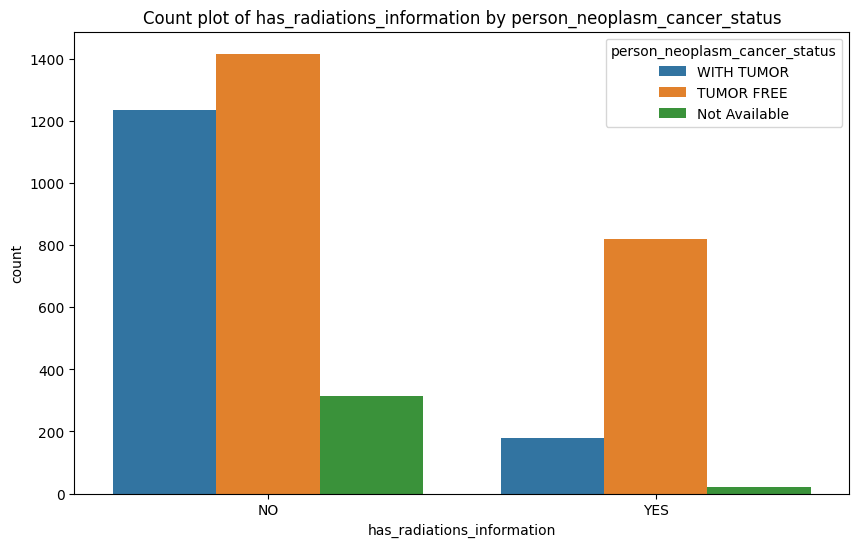

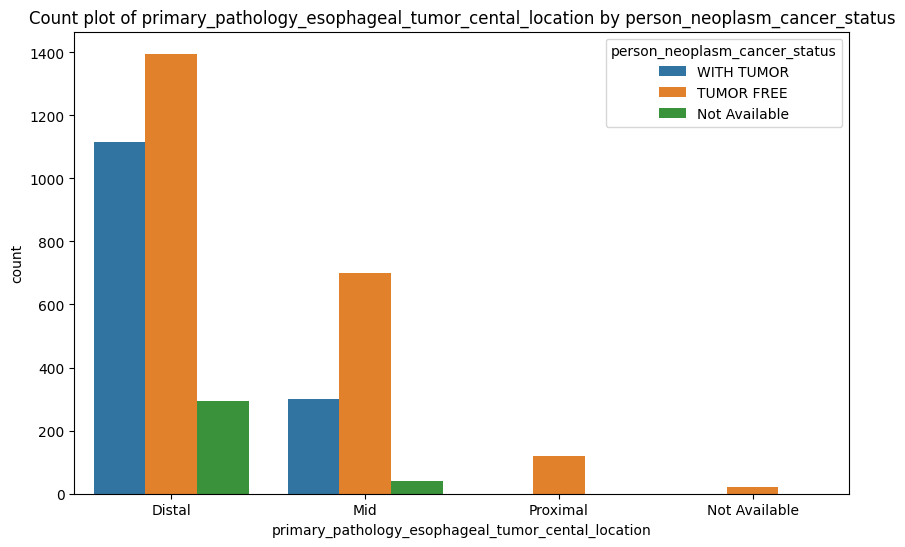

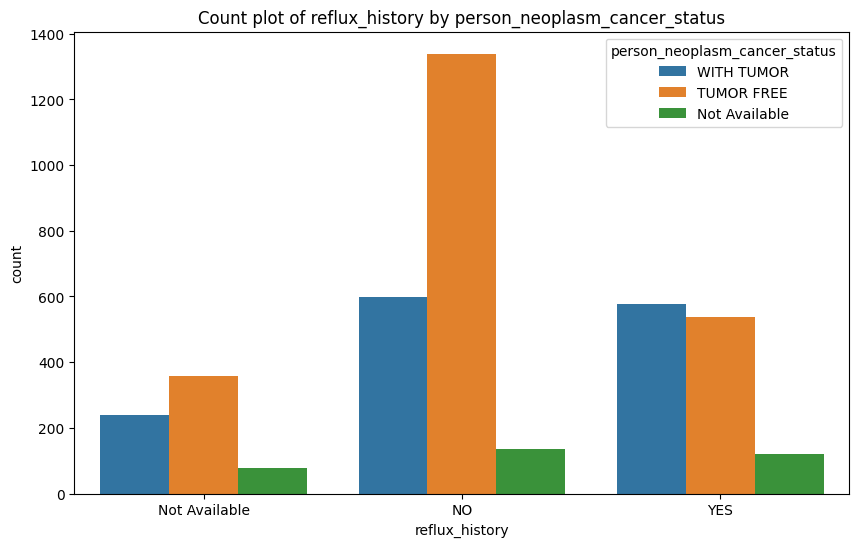

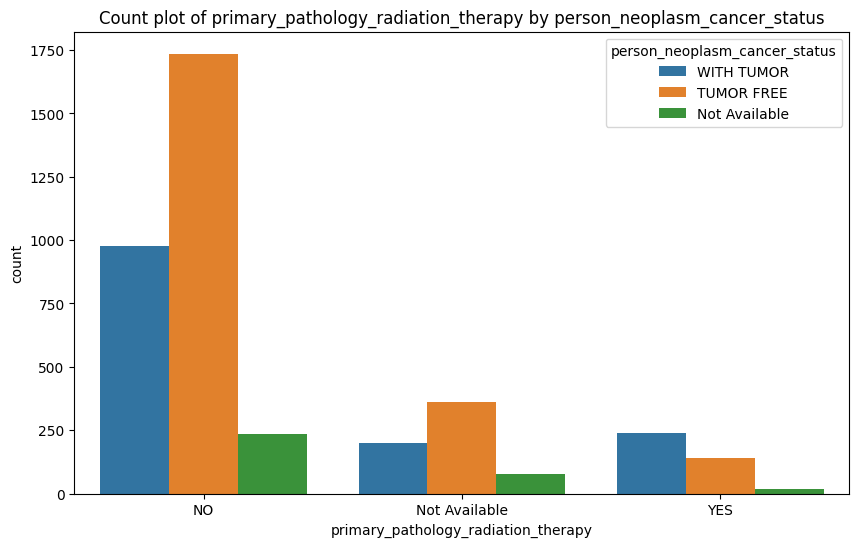

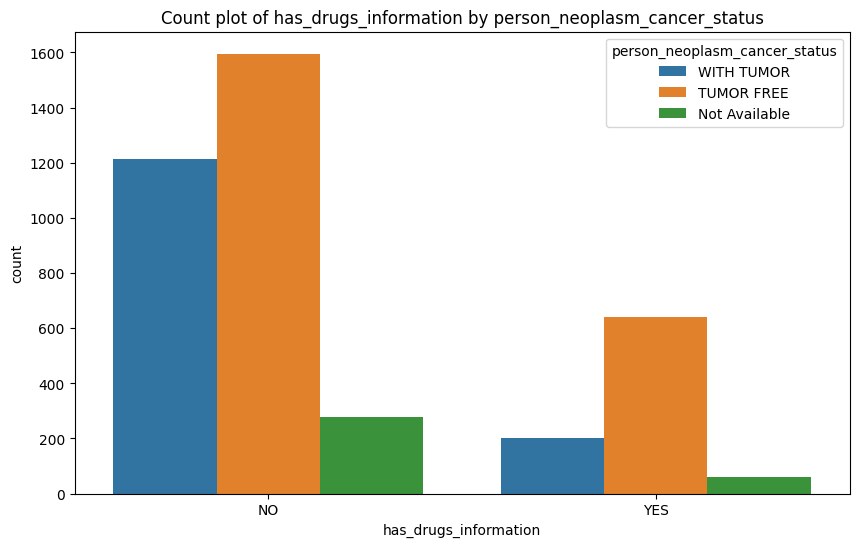

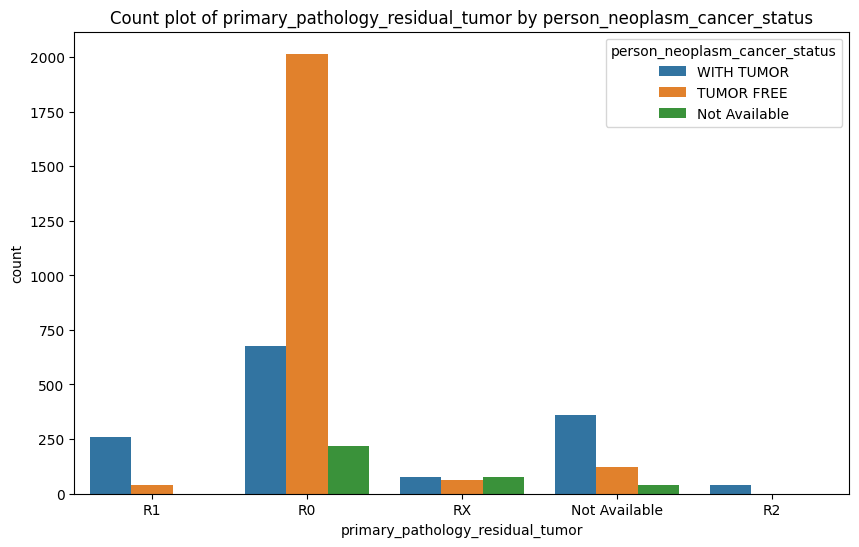

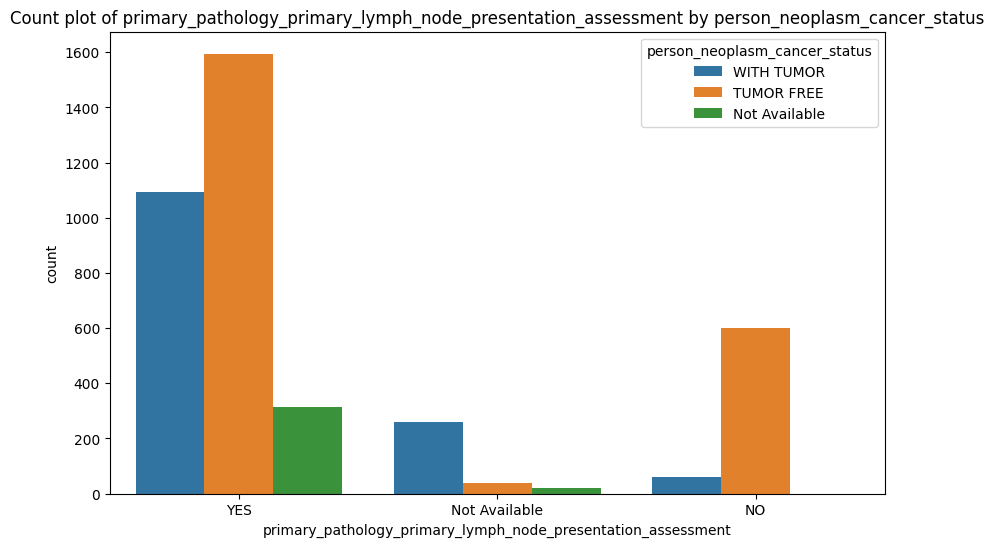

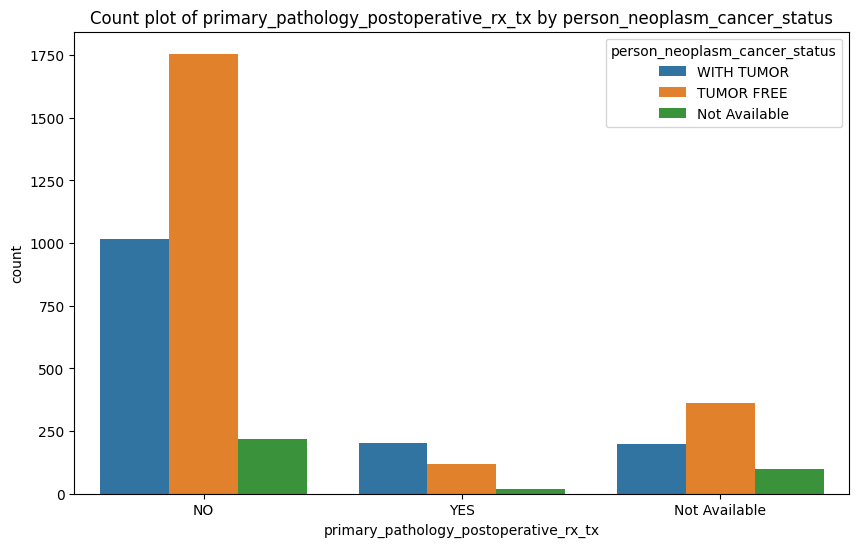

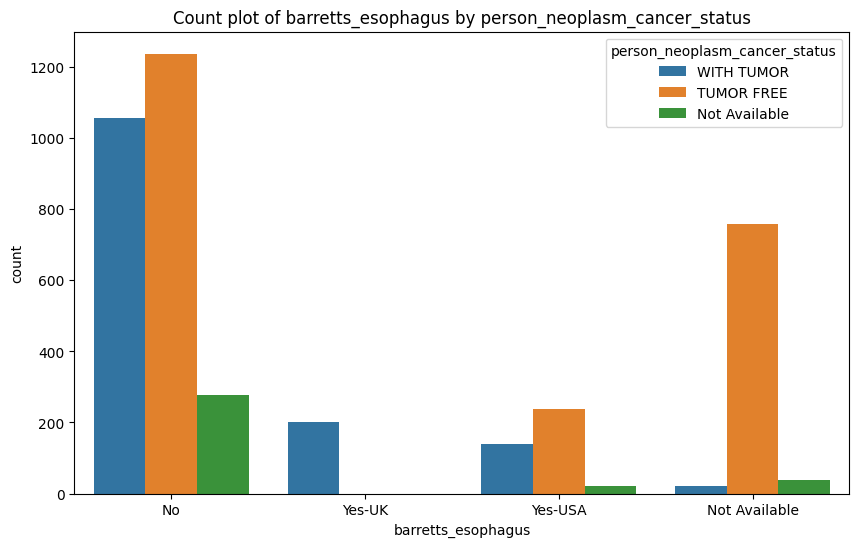

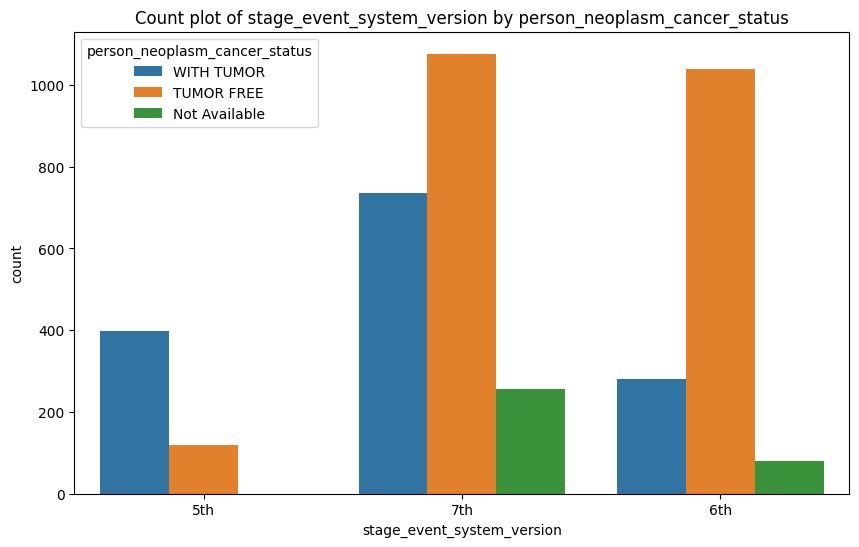

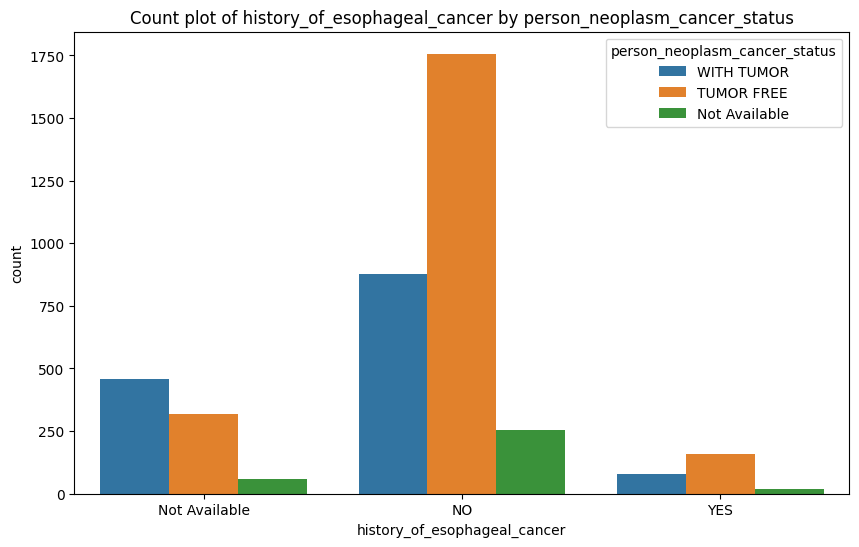

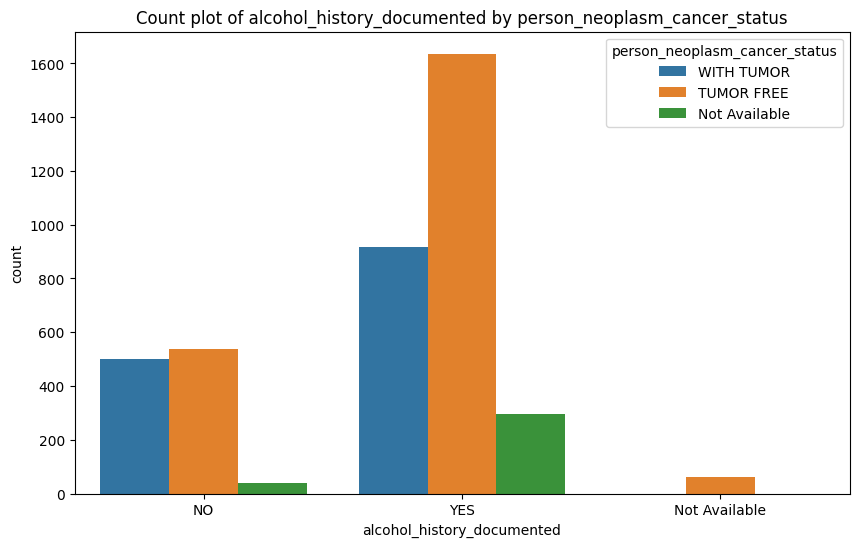

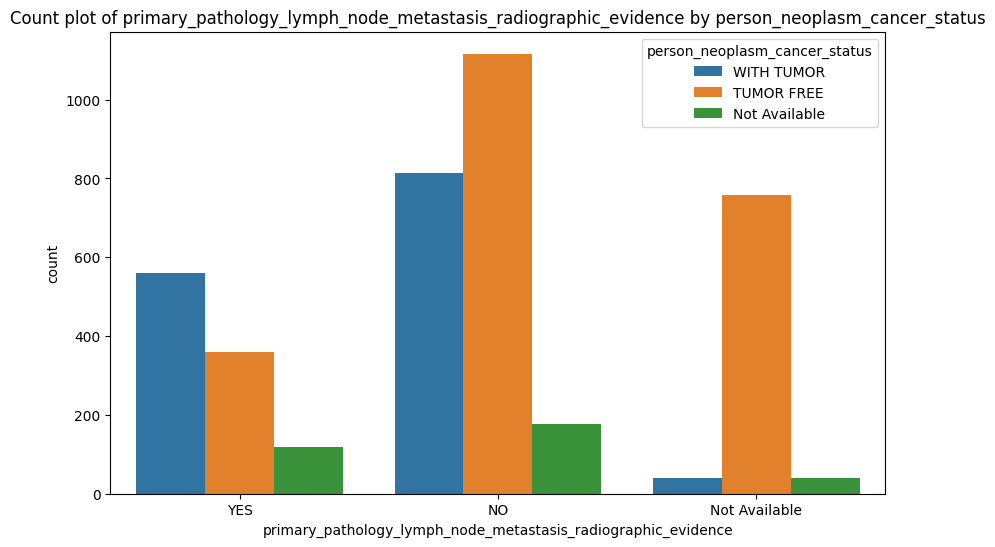

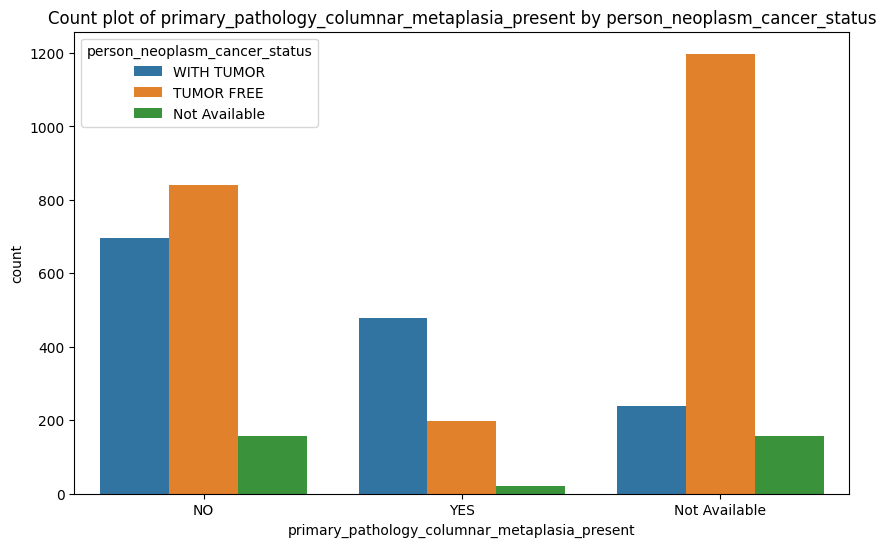

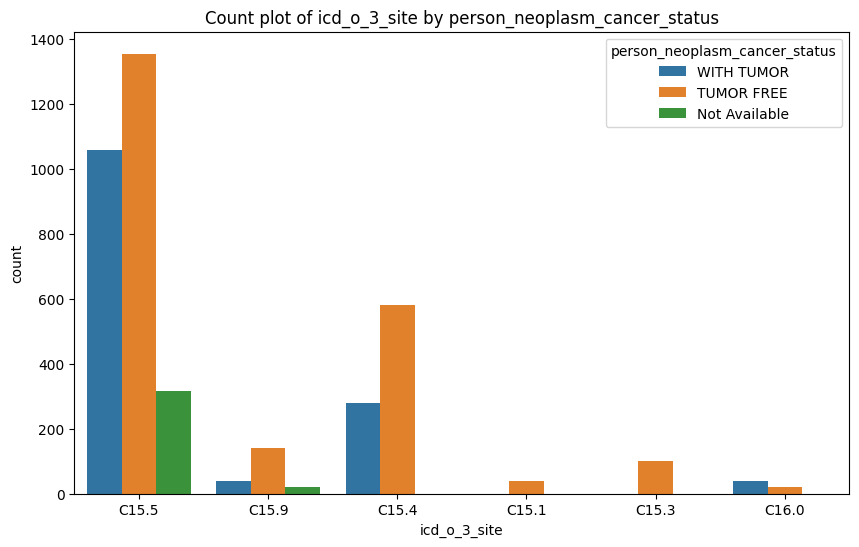

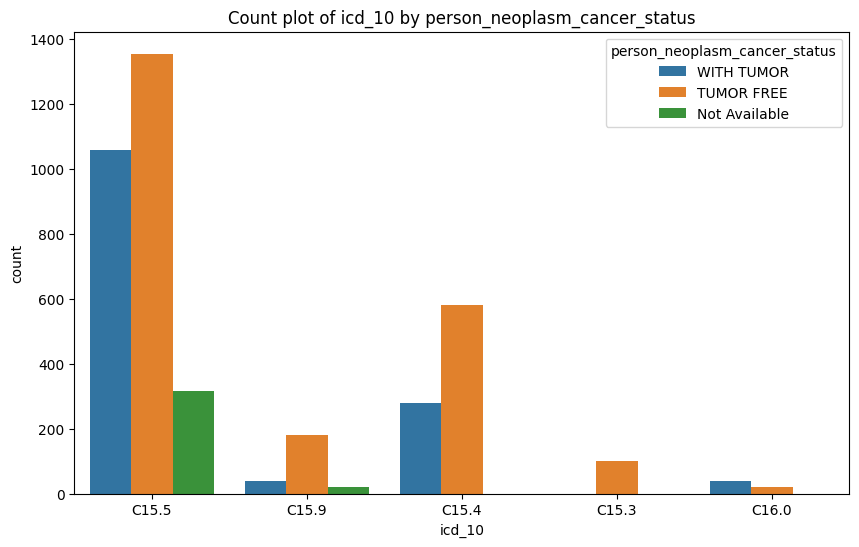

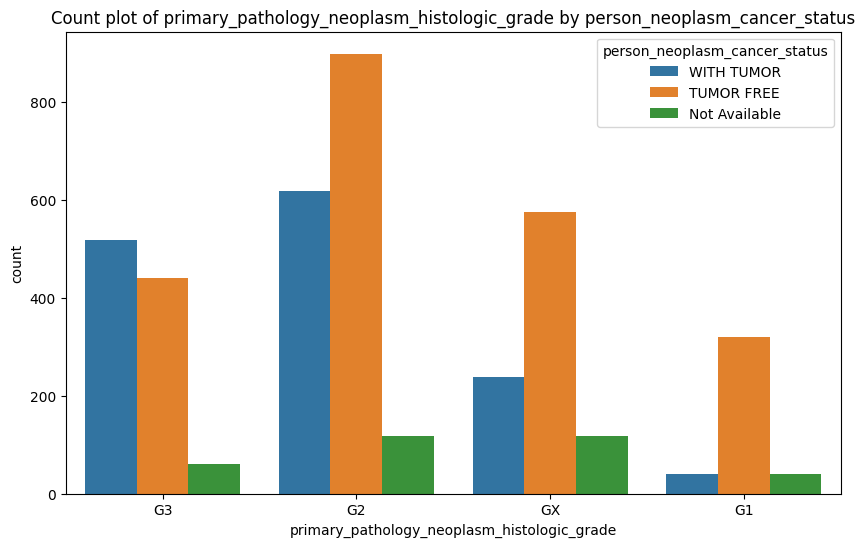

In [46]:
for feature in best_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], hue=df[target_variable])
    plt.title(f'Count plot of {feature} by {target_variable}')
    plt.show()

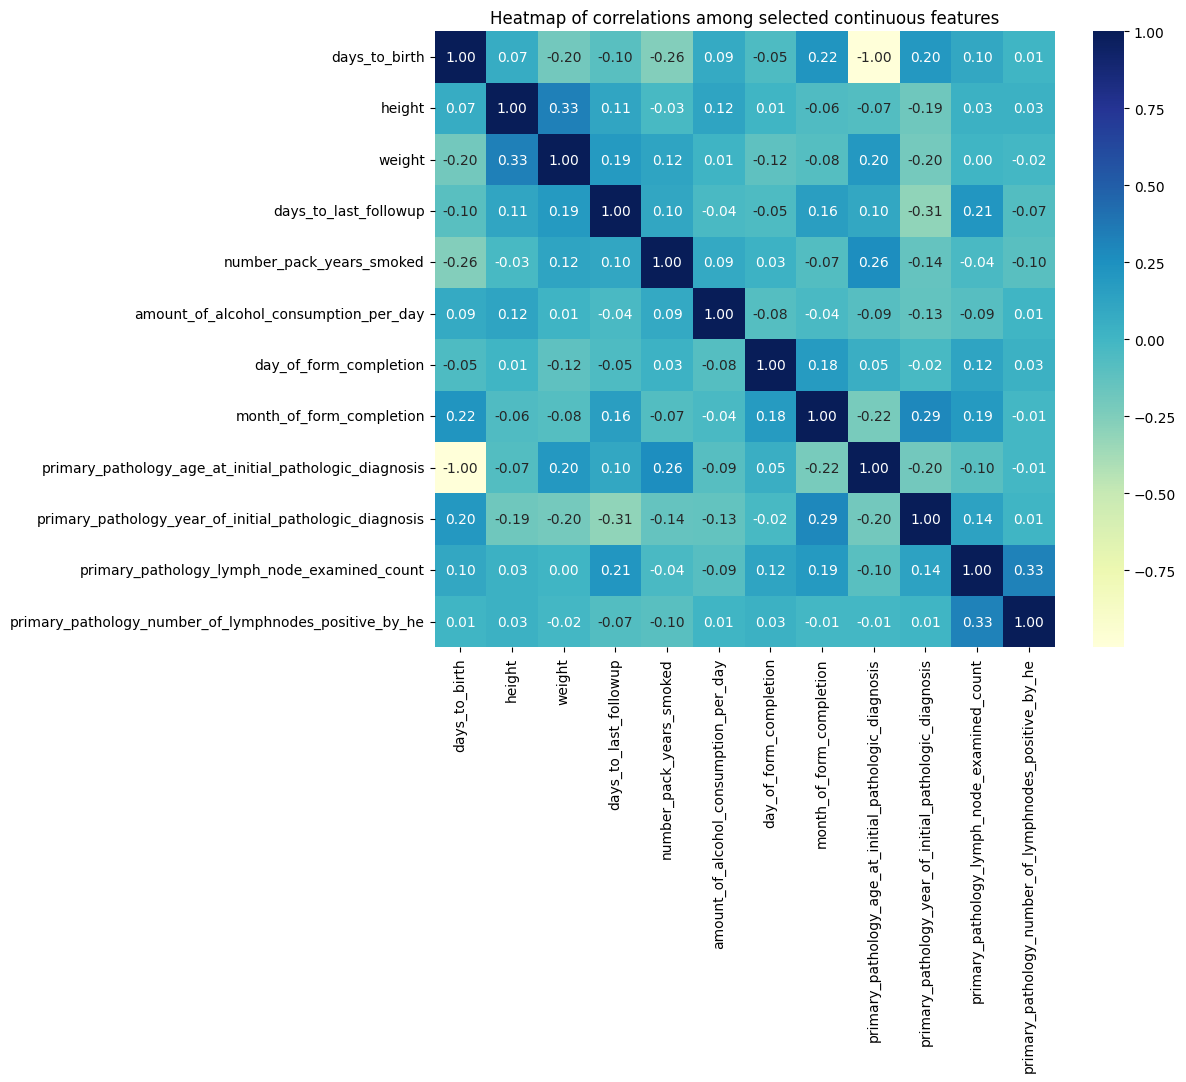

In [49]:
correlation_matrix = df[continuous].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of correlations among selected continuous features")
plt.show()

In [52]:
pivot_table_mean = df.pivot_table(index='gender', columns='race_list', values='days_to_birth', aggfunc='mean')
pivot_table_mean

race_list         ASIAN  BLACK OR AFRICAN AMERICAN  Not Available  \
gender                                                              
FEMALE    -21819.883333                        NaN  -27982.556962   
MALE      -20460.469767                  -21408.26  -22807.420588   

race_list         WHITE  
gender                   
FEMALE    -24438.048218  
MALE      -24384.117931

In [51]:
pivot_table_max_min = df.pivot_table(
    index='gender', 
    columns='person_neoplasm_cancer_status', 
    values='primary_pathology_age_at_initial_pathologic_diagnosis', 
    aggfunc=['max', 'min']
)
pivot_table_max_min

max                        \
person_neoplasm_cancer_status Not Available TUMOR FREE WITH TUMOR   
gender                                                              
FEMALE                                   84         86         84   
MALE                                     81         86         90   

                                        min                        
person_neoplasm_cancer_status Not Available TUMOR FREE WITH TUMOR  
gender                                                             
FEMALE                                   79         44         51  
MALE                                     53         36         27

In [53]:
pivot_table_multi_agg = df.pivot_table(
    index='primary_pathology_histological_type', 
    columns='vital_status', 
    values='days_to_last_followup', 
    aggfunc=['mean', 'median', 'std']
)
pivot_table_multi_agg

mean             median  \
vital_status                              Alive        Dead  Alive   
primary_pathology_histological_type                                  
Esophagus Adenocarcinoma, NOS        530.138324  306.201937  267.0   
Esophagus Squamous Cell Carcinoma    129.667094  306.201937    3.0   

                                                        std       
vital_status                               Dead       Alive Dead  
primary_pathology_histological_type                               
Esophagus Adenocarcinoma, NOS        306.201937  619.523167  0.0  
Esophagus Squamous Cell Carcinoma    306.201937  291.660826  0.0

In [54]:
pivot_table_percentage = df.pivot_table(
    index='gender', 
    columns='person_neoplasm_cancer_status', 
    values='patient_id', 
    aggfunc='count'
)
pivot_table_percentage = pivot_table_percentage.div(pivot_table_percentage.sum(axis=1), axis=0) * 100
pivot_table_percentage

person_neoplasm_cancer_status  Not Available  TUMOR FREE  WITH TUMOR
gender                                                              
FEMALE                             12.662338   64.772727   22.564935
MALE                                7.628376   54.496883   37.874740

In [55]:
pivot_table_totals = df.pivot_table(
    index='tissue_prospective_collection_indicator', 
    columns='country_of_birth', 
    values='primary_pathology_age_at_initial_pathologic_diagnosis', 
    aggfunc='mean', 
    margins=True, 
    margins_name='Total'
)
pivot_table_totals

country_of_birth                         Australia     Brazil  Bulgaria  \
tissue_prospective_collection_indicator                                   
NO                                            72.0  56.411765       NaN   
Not Available                                  NaN  58.500000       NaN   
YES                                            NaN        NaN      50.0   
Total                                         72.0  56.631579      50.0   

country_of_birth                         Not Available  Russia    Ukraine  \
tissue_prospective_collection_indicator                                     
NO                                           69.594156     NaN        NaN   
Not Available                                      NaN     NaN        NaN   
YES                                          64.696203   58.75  59.833333   
Total                                        69.393358   58.75  59.833333   

country_of_birth                         United Kingdom  United States  \
tissue_prospective_collection_indicator                                  
NO                                                 65.0      54.857143   
Not Available                                       NaN            NaN   
YES                                                 NaN      64.053957   
Total                                              65.0      60.973684   

country_of_birth                           Vietnam      Total  
tissue_prospective_collection_indicator                        
NO                                             NaN  66.811655  
Not Available                                  NaN  58.500000  
YES                                      56.214286  58.603678  
Total                                    56.214286  63.480050

In [57]:
correlation_matrix = df[continuous].corr().abs()

In [58]:
threshold = 0.65

features_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[i]
            features_to_drop.add(colname)

df_reduced = df.drop(columns=features_to_drop)

In [59]:
df_reduced.shape

(3985, 60)

In [60]:
df_reduced = df_reduced.drop(columns=non_categorical)

In [61]:
categorical_features = ['informed_consent_verified', 'icd_o_3_site', 'icd_o_3_histology', 'icd_10', 
                        'tissue_prospective_collection_indicator', 'tissue_retrospective_collection_indicator', 
                        'country_of_birth', 'gender', 'race_list', 'other_dx', 
                        'history_of_neoadjuvant_treatment', 
                        'vital_status', 'alcohol_history_documented', 'reflux_history', 
                        'initial_diagnosis_by', 'barretts_esophagus', 'history_of_esophageal_cancer', 
                        'has_new_tumor_events_information', 'has_follow_ups_information', 
                        'has_drugs_information', 'has_radiations_information', 'project', 
                        'stage_event_system_version', 'primary_pathology_tumor_tissue_site', 
                        'primary_pathology_esophageal_tumor_cental_location', 
                        'primary_pathology_esophageal_tumor_involvement_sites', 
                        'primary_pathology_histological_type', 'primary_pathology_columnar_metaplasia_present', 
                        'primary_pathology_neoplasm_histologic_grade', 
                        'primary_pathology_initial_pathologic_diagnosis_method', 
                        'primary_pathology_lymph_node_metastasis_radiographic_evidence', 
                        'primary_pathology_primary_lymph_node_presentation_assessment', 
                        'primary_pathology_residual_tumor', 'primary_pathology_radiation_therapy', 
                        'primary_pathology_postoperative_rx_tx']

In [62]:
df_reduced = pd.get_dummies(df_reduced, columns=categorical_features, drop_first=True)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoder = LabelEncoder()

In [67]:
target_feature = 'person_neoplasm_cancer_status' 
df_reduced[target_feature] = label_encoder.fit_transform(df_reduced[target_feature])

In [68]:
df1 = df_reduced.copy()

In [69]:
df1['person_neoplasm_cancer_status'].value_counts()

person_neoplasm_cancer_status
1    2235
2    1415
0     335
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [76]:
X = df1.drop(columns=['person_neoplasm_cancer_status'])
y = df1['person_neoplasm_cancer_status']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [78]:
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

In [80]:
y_pred = logreg.predict(X_test)

In [81]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 60   4   3]
 [ 84 292  71]
 [ 46  72 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.90      0.47        67
           1       0.79      0.65      0.72       447
           2       0.69      0.58      0.63       283

    accuracy                           0.65       797
   macro avg       0.60      0.71      0.61       797
weighted avg       0.72      0.65      0.67       797


Accuracy Score:
0.6486825595984943


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [83]:
y_pred = dtree.predict(X_test)

In [84]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 66   1   0]
 [  0 446   1]
 [  0   0 283]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       1.00      1.00      1.00       447
           2       1.00      1.00      1.00       283

    accuracy                           1.00       797
   macro avg       1.00      0.99      1.00       797
weighted avg       1.00      1.00      1.00       797


Accuracy Score:
0.9974905897114178


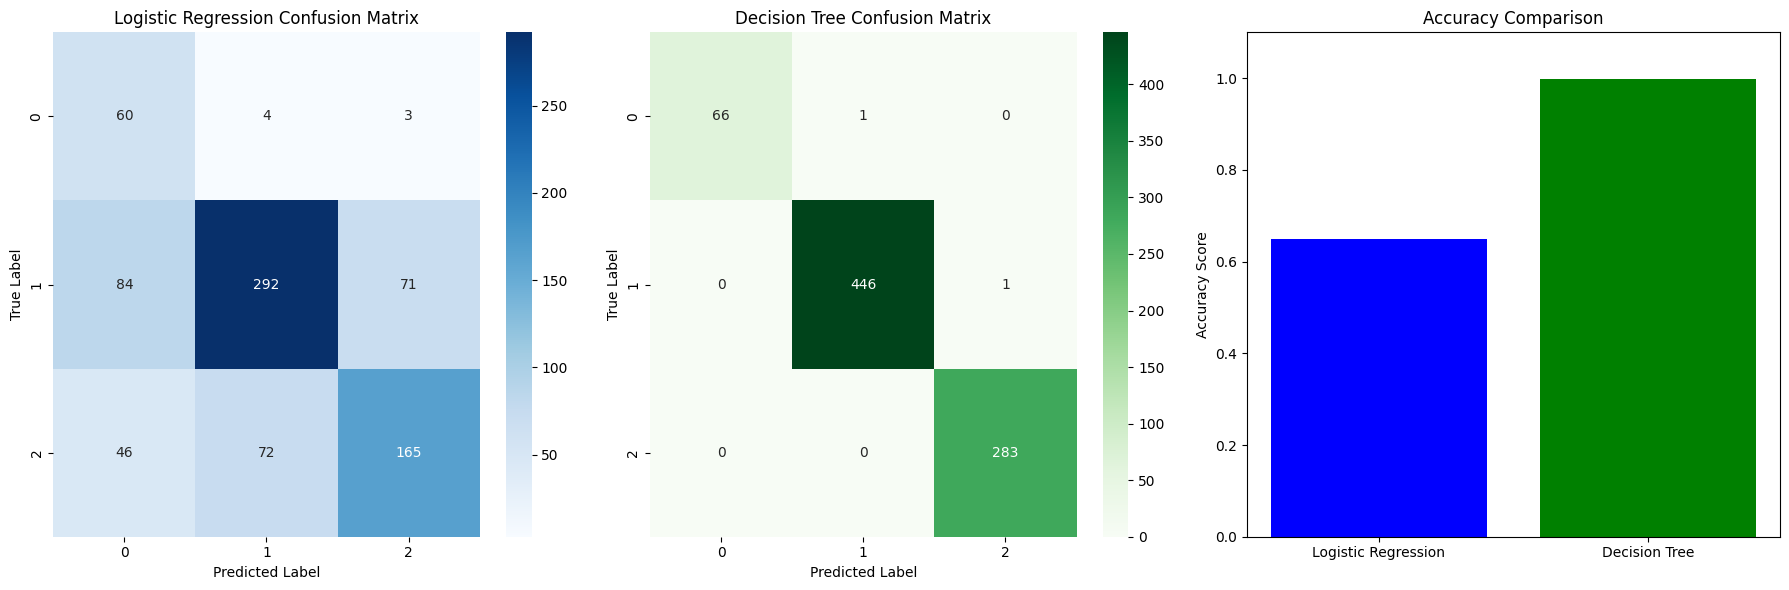

In [85]:
confusion_matrix_logreg = np.array([[60, 4, 3], [84, 292, 71], [46, 72, 165]])
confusion_matrix_dtree = np.array([[66, 1, 0], [0, 446, 1], [0, 0, 283]])

accuracy_logreg = 0.6487
accuracy_dtree = 0.9975

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(confusion_matrix_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix_dtree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

model_names = ["Logistic Regression", "Decision Tree"]
accuracy_scores = [accuracy_logreg, accuracy_dtree]
axes[2].bar(model_names, accuracy_scores, color=['blue', 'green'])
axes[2].set_ylim(0, 1.1)
axes[2].set_title("Accuracy Comparison")
axes[2].set_ylabel("Accuracy Score")

plt.tight_layout()
plt.show()

# Thanks !!!